## Letter Model: Mallet

## Resources

In [1]:
import pickle
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = 'mallet-2.0.8/bin/mallet' # update this path

In [3]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, iterations=400, random_seed=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

## Get Data

In [4]:
# Get it back
with open("20240405_PhD_LtrLem-N.txt", "rb") as fp:   # Unpickling
    data_lemmatizedNouns = pickle.load(fp)

In [5]:
len(data_lemmatizedNouns[0])

273

In [6]:
# Get it back
with open("20240405_PhD_LtrLem-NV.txt", "rb") as fp:   # Unpickling
    data_lemmatized = pickle.load(fp)

In [7]:
len(data_lemmatized[0])

461

This code adapted from https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

## LDA Mallet (Nouns Only)

In [29]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatizedNouns)

# Create Corpus
texts = data_lemmatizedNouns

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [16]:
# To see word associated with id, use this code.
print(id2word)

Dictionary(6739 unique tokens: ['abide', 'accompany', 'angel', 'annoyance', 'answer']...)


In [17]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatizedNouns, 
                                                        start=5, 
                                                        limit=25, 
                                                        step=1)

Mallet LDA: 5 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 2972
total tokens: 61787
<10> LL/token: -8.7419
<20> LL/token: -8.33963
<30> LL/token: -8.18622
<40> LL/token: -8.11501

0	10	time man school room place work day town church number case hospital people law company fact interest order patient gentleman 
1	10	land country people money farm year family pound wood tree horse price person house foot ship body government tea acre 
2	10	day life work boy mind night girl eye woman hand head child hour time bed teacher table word world leave 
3	10	dollar year country acre place house work summer cent month city board business day water wheat boat kind employment state 
4	10	letter child friend week time book wife family kind day year husband trouble heart evening thing visit health paper weather 

<50> LL/token: -8.07259
<60> LL/token: -8.05198
<70> LL/token: -8.03705
<80> LL/token: -8.02044
<90> LL/token: -8.0146

0	10	time school man place room number work day town ge

<160> LL/token: -8.00266
<170> LL/token: -7.99792
<180> LL/token: -8.0001
<190> LL/token: -7.98364

0	8.33333	day room time morning child man bed church door hospital night life hour doctor boy baby eye woman patient visit 
1	8.33333	people dollar person country year cent board world state government law land boat man office employment business expense spring wage 
2	8.33333	school work family year time mind man hand interest money number case fact answer daughter call pay service head teacher 
3	8.33333	letter child friend week book heart kind wife life death husband trouble weather spirit girl paper pleasure night account time 
4	8.33333	country land year acre farm winter month pound summer money health wood price wheat family kind dollar body crop tea 
5	8.33333	day place time house work town week city water side road people girl company building river mine hour table life 

<200> LL/token: -7.9759
<210> LL/token: -7.97768
<220> LL/token: -7.97126
<230> LL/token: -7.9637
<240> LL/to

<210> LL/token: -7.98656
<220> LL/token: -7.98156
<230> LL/token: -7.9862
<240> LL/token: -7.98143

0	7.14286	time year month letter winter family health summer friend account kind foot spring tree mine people country day money pay 
1	7.14286	school man time people number hour money life hospital mind case patient church teacher interest reason service attention doctor question 
2	7.14286	letter friend life book heart paper husband trouble wife year hand death work kind daughter flower copy girl nature age 
3	7.14286	country land dollar acre farm place year house money cent people pound wood price wheat person boat farmer board crop 
4	7.14286	child week day night boy bed evening morning weather thing spirit baby town tea store return today church clock yesterday 
5	7.14286	day city world state government year water business work man law office ship body air village inhabitant food house side 
6	7.14286	room day work place time girl visit house door woman gentleman family table pleasur

<210> LL/token: -8.04351
<220> LL/token: -8.03315
<230> LL/token: -8.02859
<240> LL/token: -8.0244

0	6.25	child week letter day year family health evening morning winter weather trouble boy night kind house today wife yesterday friend 
1	6.25	day water river boat foot town tea store winter horse pork captain week deal lot vessel cost road month provision 
2	6.25	school year people number church man law family service house teacher government state interest table pupil meeting member territory population 
3	6.25	country land dollar year acre farm place money cent house pound price wheat person farmer wood crop tree wage summer 
4	6.25	time place room day man work door hospital hour money patient mine train mind case attention order doctor question gentleman 
5	6.25	people city world man work day office business ship company body mind money air life person food character power journey 
6	6.25	time letter work girl month friend place thing account spirit change servant difficulty island 

<160> LL/token: -8.05212
<170> LL/token: -8.06985
<180> LL/token: -8.05969
<190> LL/token: -8.05096

0	5.55556	letter week time child friend health month kind year day winter family girl weather baby summer account thing snow change 
1	5.55556	school church family mind number town year woman gentleman house service interest teacher answer case condition door place eye stage 
2	5.55556	child boy night day bed ship mind today air evening clock body captain island sea return life week morning doctor 
3	5.55556	book friend heart letter life husband work paper wife hand death flower copy daughter care spirit trouble anxiety trial story 
4	5.55556	people year city state law business government world man country company employment person village labour property inhabitant money character idea 
5	5.55556	time day room morning girl visit pleasure table call companion week end pupil meeting head window judge thing man rest 
6	5.55556	man work time place day money room hand life hour hospital ord

<60> LL/token: -8.1658
<70> LL/token: -8.13676
<80> LL/token: -8.119
<90> LL/token: -8.10435

0	5	work year life gentleman copy interest people woman opinion difficulty respect judge duty party call story idea rest history success 
1	5	country land acre farm year dollar pound money price wheat winter wood farmer summer crop spring bushel pork month tree 
2	5	place dollar house day cent town work water river boat road horse board land business employment city village market inhabitant 
3	5	letter friend book kind year wife family child husband health paper return winter flower house weather news account summer term 
4	5	man time room hospital money work friend town answer case patient mind condition fact sight lady question native interest soul 
5	5	school place church number house door teacher train attention clock family meeting pupil station member purpose mail territory voice service 
6	5	people world man country year state government money person law body mind time company office p

<360> LL/token: -8.02313
<370> LL/token: -8.02
<380> LL/token: -8.02838
<390> LL/token: -8.03012

0	5	year work life difficulty interest paper copy idea opinion expense term capital story manner debt history notice son success truth 
1	5	country land acre year farm pound winter money price dollar wheat summer family crop person spring bushel tree market farmer 
2	5	place house dollar day work cent town water river boat employment board city business wage village inhabitant road flour steam 
3	5	letter friend kind book family wife health husband child thing return flower mail account write winter paper news house summer 
4	5	man time day room work money town hospital order place patient fact case answer mine sight mind gold condition native 
5	5	school number place family door teacher gentleman train church house hand meeting pupil station stage territory eye lady member service 
6	5	people year country world man government state law money land power company mind labour person food char

<260> LL/token: -8.05294
<270> LL/token: -8.05998
<280> LL/token: -8.05748
<290> LL/token: -8.05277

0	4.54545	child week day girl evening boy morning baby return today weather visit snow night spirit island change yesterday dinner bed 
1	4.54545	time day hand life friend mind eye care night woman side head trouble rest bed heart thing fire water arm 
2	4.54545	family year house town month interest tree call week money end pleasure thing word winter trust road horse plan garden 
3	4.54545	dollar place day house work city business town river person village inhabitant expense people bank mill capital time road lake 
4	4.54545	cent month water person pork employment wage store captain boat potato provision board farmer flour servant steam tea emigrant pay 
5	4.54545	letter friend book kind husband work heart wife health death paper flower daughter copy write news writing trial life comfort 
6	4.54545	room work door man hospital hour order patient doctor train fact question place gentleman

<110> LL/token: -8.14648
<120> LL/token: -8.12808
<130> LL/token: -8.12452
<140> LL/token: -8.1199

0	4.16667	year country land acre farm pound money winter family wood wheat summer spring month crop tree health horse cost seed 
1	4.16667	day week letter house friend store night snow mail pork call leave account death opportunity pain gentleman board dress good 
2	4.16667	book heart life hand family friend husband copy nature anxiety eye end picture teacher fear face story prayer difficulty kindness 
3	4.16667	work mind time woman case life room daughter hospital doctor care patient boy idea paper house meeting attention child soul 
4	4.16667	letter child friend kind girl wife baby thing health trouble flower return write visit weather week news husband writing trial 
5	4.16667	time week town evening church spirit table today paper death island morning person dinner tea yesterday deal change winter day 
6	4.16667	city business ship world body water air captain money food vessel sea day

<360> LL/token: -8.08375
<370> LL/token: -8.08295
<380> LL/token: -8.08486
<390> LL/token: -8.08957

0	4.16667	year country land acre pound farm family wheat money summer spring crop wood bushel winter tree month horse seed kind 
1	4.16667	letter day friend place house week winter account time store mail snow business leave opportunity pork difficulty board good call 
2	4.16667	book friend life heart hand husband paper copy nature interest eye family world trial age sorrow health truth fear illness 
3	4.16667	time work mind room woman case money hospital life care man doctor year patient reason house child order attention answer 
4	4.16667	letter child girl kind wife thing month death daughter trouble year baby flower health visit write return news week time 
5	4.16667	week child morning evening church town table spirit clock today island dinner tea yesterday walk room change servant tomorrow afternoon 
6	4.16667	water ship body day air food world sea money advice blood passenger head 

<210> LL/token: -8.11107
<220> LL/token: -8.10882
<230> LL/token: -8.10765
<240> LL/token: -8.10119

0	3.84615	letter child girl day week baby heart boy wife death daughter weather friend dollar news fear writing visit pleasure night 
1	3.84615	boat ship employment person cent sea provision board water passenger arrival emigrant vessel wage clothe head piece box article port 
2	3.84615	year health kind account interest flower write return time idea difficulty term thing expense opinion debt servant garden kindness peace 
3	3.84615	work time money day month care mind person house pay business board thing rest manner company fever case earth rain 
4	3.84615	room man hour door woman doctor time mine side morning foot head hand station gold mind stage face reason day 
5	3.84615	life book friend family hand husband paper heart copy wife nature eye story age living loss history sorrow end kind 
6	3.84615	place day time order visit family train companion eye sight fire wagon rest tree road li

<60> LL/token: -8.25014
<70> LL/token: -8.22299
<80> LL/token: -8.19718
<90> LL/token: -8.18439

0	3.57143	month time family winter letter health summer country account tree manner snow kind foot respect pay situation line weather field 
1	3.57143	country state person money dollar idea labour property trade difficulty capital family mind time class emigrant son rate feeling district 
2	3.57143	day girl week place thing child word horse church friend write gentleman paper aunt daughter order wagon opportunity prayer news 
3	3.57143	child week letter night evening morning baby time spirit today return mail wife weather yesterday girl writing tomorrow change window 
4	3.57143	day tea store week town pork thing vessel water cost provision island friend boat oats deal good person cow voyage 
5	3.57143	time room door place hospital hand man patient case table question family attention condition number fact stage territory station doctor 
6	3.57143	school work teacher train companion pupil an

<260> LL/token: -8.12665
<270> LL/token: -8.11609
<280> LL/token: -8.11772
<290> LL/token: -8.11746

0	3.57143	letter month winter time family friend kind health summer year account manner write pay respect fall prospect foot mine snow 
1	3.57143	country time money idea expense labour property difficulty people person trade mind capital family state situation board emigrant fact opinion 
2	3.57143	day girl week time thing daughter tree place leave pleasure child rest aunt wagon night distance ground opportunity trip river 
3	3.57143	child week evening morning baby today letter yesterday visit night boy return weather island clock trouble mail tomorrow spirit fear 
4	3.57143	day tea water store pork vessel provision captain foot bed spring thing town week luggage good box salt passage sea 
5	3.57143	man room time hospital door family patient order train place case companion doctor station stage visit hour question native reason 
6	3.57143	school work number teacher mind interest pupil m

<60> LL/token: -8.27386
<70> LL/token: -8.23328
<80> LL/token: -8.21677
<90> LL/token: -8.18612

0	3.33333	child family morning town house church boy week day yesterday island dinner clock tomorrow afternoon pork thing trust breakfast garden 
1	3.33333	world life man body mind state air food money ship family hand piece child blood work iron people matter law 
2	3.33333	day week night evening trouble time store weather today window anxiety leave pain fellow girl prospect rest change mountain living 
3	3.33333	letter time year winter month health account friend summer spring snow comfort write word ground foot fall weather change place 
4	3.33333	work husband eye pay life family stage story loss voice notice feeling service interest thought fire purpose debt office heart 
5	3.33333	place dollar cent city work house person boat employment board business day village half farm wage office town situation water 
6	3.33333	land country acre pound wood wheat dollar price crop year bushel marke

<260> LL/token: -8.13175
<270> LL/token: -8.13484
<280> LL/token: -8.13582
<290> LL/token: -8.14108

0	3.33333	child week evening church boy morning house town island return clock spirit baby yesterday visit mail dinner pork tomorrow walk 
1	3.33333	world body life air mind ship food person power character matter child blood labour money week part work idea habit 
2	3.33333	day week girl time thing trouble night weather today month bed pleasure prospect pen darling fellow fortnight change cough window 
3	3.33333	time letter winter family summer year friend health place month kind spring farm account country comfort fall respect word wife 
4	3.33333	work year husband life family interest change term loss story nature pay truth gentleman care history trouble anxiety talent service 
5	3.33333	place house dollar cent work day city business boat farm town wage employment village board half month flour hour situation 
6	3.33333	land acre country dollar year pound wheat price wood crop money 

<60> LL/token: -8.26735
<70> LL/token: -8.23308
<80> LL/token: -8.21209
<90> LL/token: -8.19561

0	3.125	hand day girl door eye side number pupil place time scene building service feeling walk prisoner head tree turn jail 
1	3.125	child boy girl trouble baby flower yesterday visit house mail week fear loss daughter doctor change manner kindness care opportunity 
2	3.125	book work letter pay hand copy nature write account life time trial year paper interest success fortune story writing end 
3	3.125	man body world mind life air food water blood child money side matter habit night climate character case head drink 
4	3.125	people year state government office law man world land company population property party power city son bank opinion labour woman 
5	3.125	friend letter heart kind wife death life husband age paper news daughter woman picture pleasure thing arm sorrow truth peace 
6	3.125	place work day cent dollar business person city ship employment house village inhabitant board tow

<260> LL/token: -8.13059
<270> LL/token: -8.13397
<280> LL/token: -8.14352
<290> LL/token: -8.14257

0	3.125	day time place girl pupil hand scene eye word door head visit thing morning prisoner water hair tree seat piano 
1	3.125	child boy week girl trouble baby wife change yesterday fear tomorrow mail trust care fortnight lesson house snow anxiety cottage 
2	3.125	book work paper year copy interest life term debt nature success fortune pay address talent assistance trial volume story change 
3	3.125	world body life air food ship man mind blood month money thousand woman business boy child year drink matter case 
4	3.125	people government man state year law company party country labour population land office city mind capital difficulty power district world 
5	3.125	letter friend heart kind husband death life flower daughter hand woman news health loss wife picture sorrow creature peace age 
6	3.125	dollar day cent place work business city board employment house wage village town offic

<60> LL/token: -8.28926
<70> LL/token: -8.26339
<80> LL/token: -8.24767
<90> LL/token: -8.22591

0	2.94118	week day night evening today boy account yesterday island spirit weather table return morning snow store child room aunt change 
1	2.94118	year hand people man mind time end life power war judge story death thing fact son prisoner call strength conversation 
2	2.94118	child bed week trouble fear day morning town clock servant loss fellow time trust anxiety side living evening spot afternoon 
3	2.94118	ship body water air vessel life captain sea world head mind food passenger clothe blood port sickness money drink voyage 
4	2.94118	country money cent month person wood family horse place winter lot price steam cost climate neighbourhood garden side manner sugar 
5	2.94118	book friend year husband letter work life health heart copy paper world wife daughter debt trial nature interest sorrow truth 
6	2.94118	day boy month baby heart night woman thing time wife care pain eye leave arm 

<260> LL/token: -8.1542
<270> LL/token: -8.15794
<280> LL/token: -8.15643
<290> LL/token: -8.16126

0	2.94118	day week today account yesterday snow island church thing weather visit house evening store aunt prospect night likeness oats captain 
1	2.94118	time year hand man mind month end life town fact judge law war death son subject call earth field prisoner 
2	2.94118	child morning week fear boy town clock dinner room evening return bed trouble mail leave spirit tomorrow afternoon breakfast tea 
3	2.94118	ship body world air food life sea mind passenger water blood child case money port captain sickness clothe drink voyage 
4	2.94118	country winter summer money month family wood year person difficulty manner lot garden comfort respect neighbourhood climate butter soil heat 
5	2.94118	book work friend husband life year paper copy heart world interest letter sorrow nature hand spirit success loss trial address 
6	2.94118	day night heart week woman baby month bed doctor head thing boy c

<60> LL/token: -8.30122
<70> LL/token: -8.28402
<80> LL/token: -8.25817
<90> LL/token: -8.24969

0	2.77778	day house boat town week store captain vessel pork dollar flour tea place luggage side salt good journey employment half 
1	2.77778	year house copy party power world paper child debt interest company sort judge fortune return mind sum constitution education happiness 
2	2.77778	work office book inhabitant hand business anxiety living garden sale memory society notice day success volume assistance prospect gentleman tale 
3	2.77778	boy child book life heart kind spirit trouble woman care hand return matter eye servant nature change story bread vicker 
4	2.77778	week child day baby bed today morning yesterday weather island night evening leave tomorrow trouble clock likeness return town cough 
5	2.77778	day church visit morning time pupil eye dinner wagon tree head tribe driver spot jail companion trail floor law camp 
6	2.77778	time letter girl account thing day flower mine write n

<260> LL/token: -8.15812
<270> LL/token: -8.15901
<280> LL/token: -8.16946
<290> LL/token: -8.16567

0	2.77778	house boat cent dollar place board town employment water flour week side river thing passenger luggage good day salt servant 
1	2.77778	year house interest expense company mind end party power law debt term sort son judge capital fire view happiness sum 
2	2.77778	work book paper life copy world letter fortune success memory anxiety assistance story volume pleasure pound race history bear clearing 
3	2.77778	child hand trouble change eye heart life care woman fear board spirit mind boy matter kind idea trial salary earth 
4	2.77778	child week evening morning today church island town yesterday store mail return tomorrow spirit clock boy trust leave baby dinner 
5	2.77778	day pupil meeting visit church wagon morning number companion journey tribe prisoner side gang tree jail eye head trail ground 
6	2.77778	letter time day week girl night thing weather flower visit write baby ne

<60> LL/token: -8.29633
<70> LL/token: -8.27756
<80> LL/token: -8.25509
<90> LL/token: -8.24263

0	2.63158	school number place teacher hand train fact eye pupil girl time wagon companion voice tribe driver possession group church surprise 
1	2.63158	room door man mind order time woman reason foot work conversation prayer daughter rest claim prisoner morning mountain physician jail 
2	2.63158	week letter day weather fear time spirit daughter trouble write aunt leave snow news winter likeness trip fortnight woman evening 
3	2.63158	board day boat hour tea captain table servant month cost week clothe box family luggage bed arrival currency fish cow 
4	2.63158	year people state duty government property opinion idea money mind house dollar power age return term industry earth day tax 
5	2.63158	day morning night week church return horse dinner evening visit walk island window pleasure arm head bed rest spot hair 
6	2.63158	land wood tree river road house day market lot side garden water lak

<210> LL/token: -8.18375
<220> LL/token: -8.17655
<230> LL/token: -8.17868
<240> LL/token: -8.17957

0	2.63158	school number place teacher pupil girl hand wagon voice eye tribe service driver member head surprise feeling thing lady warrant 
1	2.63158	room man life time door mind hour woman order train reason stage companion conversation step attack foot group prisoner person 
2	2.63158	letter day time weather week thing write leave news visit night death spirit aunt trouble fear daughter board pain likeness 
3	2.63158	water tea captain vessel boat servant week ship hour cent passage luggage salt thing store article box clothe currency board 
4	2.63158	year people law state party money time land day property idea world duty labour power age opinion number mind industry 
5	2.63158	day morning evening church week clock island horse dinner return walk pleasure afternoon visit room head night spot fear distance 
6	2.63158	land place house wood road tree river day mill garden side lot bank s

<360> LL/token: -8.15683
<370> LL/token: -8.17326
<380> LL/token: -8.17474
<390> LL/token: -8.18015

0	2.63158	school number place teacher girl pupil eye wagon voice hand thing driver tribe music gang sight possession member head surprise 
1	2.63158	time life door room order man mind stage hand companion rest hour train prisoner step judge jail plain law turn 
2	2.63158	letter time day thing spirit night change news write fear leave weather aunt week board likeness death arm pen promise 
3	2.63158	captain vessel store boat pork ship water foot cent sea servant luggage good passage tea currency article fish lbs bed 
4	2.63158	people year state law world land party money city power duty property day government farm time labour district population dollar 
5	2.63158	day week morning town evening church island clock return visit room dinner horse tea walk pleasure afternoon hour breakfast spot 
6	2.63158	place land house day road river wood water side deal tree garden mill bank settler situ

<110> LL/token: -8.25243
<120> LL/token: -8.23673
<130> LL/token: -8.23506
<140> LL/token: -8.23341

0	2.5	friend heart death life daughter night woman bed week age loss baby sorrow care arm creature nature hour room house 
1	2.5	year family health life pay pound paper respect debt sum line account rent spring ground sale answer day neighbour colony 
2	2.5	man time day room hospital money town work answer people case sight station soul charge care house face fire step 
3	2.5	land country acre farm wheat year crop pound wood bushel market tree farmer seed horse foot mill settler soil beef 
4	2.5	people country land year law man labour party idea world comfort company capital son woman district property farmer industry prison 
5	2.5	house time church table government thing person pork number island opinion religion population lady return class officer college band meeting 
6	2.5	place work house city town village dollar building inhabitant employment boat trade road girl half lake journe

<260> LL/token: -8.18391
<270> LL/token: -8.19052
<280> LL/token: -8.18918
<290> LL/token: -8.18764

0	2.5	friend heart life death husband woman hour daughter night change bed soul boy room sorrow nature baby arm care matter 
1	2.5	year family house health pound garden account manner pay tree debt ground line living rent sum paper life daughter apple 
2	2.5	man time work day money town order room answer people doctor law place care claim person prisoner sight face incident 
3	2.5	land country acre farm year wheat crop wood bushel market pound seed money price mill spring tree horse soil neighbourhood 
4	2.5	people country state year labour man law land party property person capital idea farm woman habit world industry district independence 
5	2.5	church time government table thing place return eye service character class opinion paper music religion house college number soldier instruction 
6	2.5	place city town house dollar work village employment inhabitant board boat hour week busin

Mallet LDA: 21 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 2972
total tokens: 61787
<10> LL/token: -9.22251
<20> LL/token: -8.71844
<30> LL/token: -8.53056
<40> LL/token: -8.43508

0	2.38095	year country pound land acre wheat crop money pork spring winter seed place summer stock wood cow house butter market 
1	2.38095	dollar land cent acre farm price bushel wage cost potato boat half flour lake lot shilling building rate tree luggage 
2	2.38095	girl baby weather letter today night flower evening book aunt yesterday writing likeness illness winter darling window deal boy change 
3	2.38095	duty clothe child island good bed dinner history box pig lesson fortune earth world soldier emigration opportunity nature war system 
4	2.38095	man people year government money law company office power food mind party thousand life number constitution countryman officer benefit land 
5	2.38095	place town house time river hour street hand water boat sort evening walk week turn situat

<160> LL/token: -8.21703
<170> LL/token: -8.21718
<180> LL/token: -8.21461
<190> LL/token: -8.2068

0	2.38095	acre land year country wheat farm pound crop wood money bushel seed horse spring tree winter neighbour fruit beef barrel 
1	2.38095	dollar cent land price potato boat flour lake lot half road building rate market advantage cost deal luggage soil provision 
2	2.38095	letter girl night baby weather week flower thing time yesterday aunt evening likeness darling deal cough window uncle word holiday 
3	2.38095	book account expense duty opinion history term lesson pig boy pound address soldier emigration servant butter beauty article master arrival 
4	2.38095	people year man money government office law company power land thousand habit war party world constitution pocket clothing field countryman 
5	2.38095	place day time town house river dinner week situation rest hour walk boat water island leave charge lodging distance ride 
6	2.38095	letter friend heart paper kind death copy age 

<310> LL/token: -8.194
<320> LL/token: -8.19812
<330> LL/token: -8.19281
<340> LL/token: -8.19404

0	2.38095	acre land country year farm wheat pound crop bushel money tree seed horse wood spring foot price market shilling beef 
1	2.38095	dollar land cent board price flour expense lot cost boat mill deal advantage half luggage bank soil currency potato article 
2	2.38095	letter girl week baby weather flower thing time news yesterday aunt change likeness darling leave garden cough woman deal pen 
3	2.38095	book servant head term history nature return duty idea address soldier opportunity progress talent rain object poverty beauty praise privilege 
4	2.38095	people year man government company office law money woman world thousand power case district party industry war constitution pocket bank 
5	2.38095	place day house road river town time week water side hour lake boat walk distance situation half dinner ride stone 
6	2.38095	letter life paper heart death friend kind copy age hand matter

<60> LL/token: -8.35187
<70> LL/token: -8.31689
<80> LL/token: -8.29367
<90> LL/token: -8.28511

0	2.27273	letter friend kind husband heart death health mail daughter write news aunt writing trial fear darling weather picture vicker painting 
1	2.27273	ship child air journey advice thing blood passenger day character arrival law girl box boy habit iron city matter voyage 
2	2.27273	place door hand man time voice stage scene pupil feeling side driver gang incident step mind possession plain trail ranch 
3	2.27273	day girl time week visit tree flower pleasure rest month creature garden prayer face weather idea sight thing talk lot 
4	2.27273	money foot people year water provision spring shilling gold pound port sugar salt passage leave soil property ground stock pocket 
5	2.27273	wood church time pay store island difficulty comfort house neighbourhood bank evening town pound mile order dinner piece person place 
6	2.27273	week winter account snow yesterday health evening service fortnigh

<210> LL/token: -8.22124
<220> LL/token: -8.21727
<230> LL/token: -8.21263
<240> LL/token: -8.21731

0	2.27273	letter friend kind heart husband death daughter fear news writing health sorrow picture kindness write darling nature book loss vicker 
1	2.27273	ship air sea passenger vessel arrival captain voyage thing water bread office character advice woman box iron milk night supply 
2	2.27273	door time place stage side hand train driver foot gang voice plain journey question surprise ranch trail order life mud 
3	2.27273	day girl week weather tree thing time scene face pleasure flower garden visit creature wife talk gift artist music storm 
4	2.27273	money spring foot month water health store provision company gold deal people butter sugar quality share passage ground weight climate 
5	2.27273	house wood place church difficulty pound time person comfort town bank return expense neighbourhood account mile river quarter chair piece 
6	2.27273	week evening winter town yesterday snow accou

<360> LL/token: -8.18863
<370> LL/token: -8.19809
<380> LL/token: -8.19705
<390> LL/token: -8.19821

0	2.27273	letter friend heart kind husband wife death dollar return news daughter fear writing sorrow write darling trial flower creature picture 
1	2.27273	ship water captain air sea vessel passenger iron thing hour night voyage child leave office arrival milk box bread month 
2	2.27273	door place time stage hand driver prisoner gang visit jail surprise plain trail order voice orphan ranch effort attempt foot 
3	2.27273	day girl time weather tree garden thing flower walk arm leave face blessing piano music distance people week sight scene 
4	2.27273	day foot month spring mine people provision money company water gold piece deal sugar store claim share yard health meal 
5	2.27273	place country house difficulty church wood person road capital quarter neighbourhood time advantage expense town year settlement pound bank river 
6	2.27273	week evening today snow island mail town yesterday ch

<110> LL/token: -8.28876
<120> LL/token: -8.27949
<130> LL/token: -8.27051
<140> LL/token: -8.25641

0	2.17391	land woman place paper family church idea judge word service living son notice wife lady end purpose religion life court 
1	2.17391	letter day wife baby week weather girl write kind news child aunt night fear trouble month fortnight cough walk lesson 
2	2.17391	dollar cent board work boat city house business employment village wage month town steam luggage building flour mechanic profit advice 
3	2.17391	child morning week evening today return clock day church dinner boy visit bed afternoon breakfast thing store doctor holiday piece 
4	2.17391	bed boy time woman hour foot care case fellow box heart length pain rain office kitchen sleep pleasure inch coffee 
5	2.17391	people state law town year labour capital bank farm property trade rate farmer class person expense constitution newspaper prison sort 
6	2.17391	world body life air mind food work blood day ship character busines

<260> LL/token: -8.21998
<270> LL/token: -8.22171
<280> LL/token: -8.214
<290> LL/token: -8.21912

0	2.17391	family church day place woman thing idea paper judge life son word service land court possession address instruction religion wife 
1	2.17391	letter child week day girl weather baby news month write aunt snow likeness writing fortnight wife cough return walk fear 
2	2.17391	dollar cent work boat board city business employment town wage steam month house office village flour kind half street lake 
3	2.17391	child week morning evening boy today church dinner yesterday day clock visit tomorrow bed afternoon tea baby breakfast store holiday 
4	2.17391	bed day night woman hour foot iron box pain fellow clothe sleep piece care case kitchen hair heart length coffee 
5	2.17391	people state year law property population person labour capital man village number city mind farm independence constitution newspaper prison education 
6	2.17391	body world life air work ship child food business b

Mallet LDA: 24 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 2972
total tokens: 61787
<10> LL/token: -9.29623
<20> LL/token: -8.74266
<30> LL/token: -8.5688
<40> LL/token: -8.46108

0	2.08333	child boy night trouble doctor hour clock morning care word case pain sleep illness heart day fortnight account fire view 
1	2.08333	man time mind girl case answer condition stage place music priest reason coal danger person surprise attack scene mud knowledge 
2	2.08333	tea house servant week water neighbourhood situation evening church mile deal sort girl currency boat spot account rice shore box 
3	2.08333	friend book wife husband heart kind copy flower world dollar child sorrow loss likeness darling age return vicker prayer talent 
4	2.08333	money family year winter friend month health spring work thousand kind living line field road stock cow trouble acquaintance change 
5	2.08333	day week pork provision river pound emigrant piece account place house spirit fish pair respect

<160> LL/token: -8.25468
<170> LL/token: -8.25595
<180> LL/token: -8.24695
<190> LL/token: -8.23152

0	2.08333	child boy night time trouble care account doctor case hour pain clock sleep fortnight morning car change anxiety arrival fire 
1	2.08333	mind girl answer man condition order stage house music priest reason time daughter care surprise fact end case orphan danger 
2	2.08333	week morning evening church tea dinner return yesterday servant breakfast boat afternoon rain road water ride spot distance ice mama 
3	2.08333	book friend wife husband heart dollar copy flower loss world trial sorrow writing picture age darling vicker cottage volume sum 
4	2.08333	family year winter month friend money spring health people garden sugar fall cow line respect pound ground living property word 
5	2.08333	day pork river tree provision kind pound deal house account piece pair frost apple tool purchase fish ham cart block 
6	2.08333	child week thing store pay island situation town box board vessel 

<310> LL/token: -8.23224
<320> LL/token: -8.22543
<330> LL/token: -8.23086
<340> LL/token: -8.22194

0	2.08333	time child trouble boy week night care doctor account hour morning arm case illness sleep change pain fire car woman 
1	2.08333	girl order mind station stage house daughter music time door scene fact call step purpose danger surprise residence college orphan 
2	2.08333	week evening morning town church dinner clock tea boy return today tomorrow afternoon breakfast walk spot servant yesterday room boat 
3	2.08333	book friend husband wife flower copy dollar writing heart age world sorrow trial loss picture darling talent volume peace memory 
4	2.08333	family year winter month money summer spring friend health seed butter foot line ground pay living bread fall word acquaintance 
5	2.08333	day tree house pork pound river snow garden pig account spring fish pair apple thing ham boot bank ice oats 
6	2.08333	week child store thing spirit island captain vessel situation leave good dif

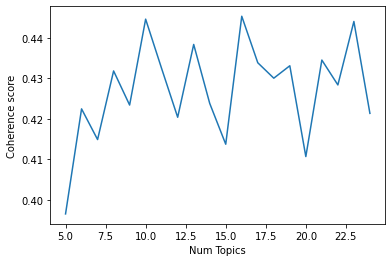

In [18]:
# Show graph
limit=25; start=5; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [19]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, 'Coherence: ', round(cv, 4))

Num Topics = 5 Coherence:  0.3965
Num Topics = 6 Coherence:  0.4225
Num Topics = 7 Coherence:  0.4149
Num Topics = 8 Coherence:  0.4319
Num Topics = 9 Coherence:  0.4234
Num Topics = 10 Coherence:  0.4447
Num Topics = 11 Coherence:  0.4324
Num Topics = 12 Coherence:  0.4204
Num Topics = 13 Coherence:  0.4384
Num Topics = 14 Coherence:  0.4238
Num Topics = 15 Coherence:  0.4137
Num Topics = 16 Coherence:  0.4454
Num Topics = 17 Coherence:  0.4339
Num Topics = 18 Coherence:  0.4301
Num Topics = 19 Coherence:  0.4331
Num Topics = 20 Coherence:  0.4107
Num Topics = 21 Coherence:  0.4346
Num Topics = 22 Coherence:  0.4284
Num Topics = 23 Coherence:  0.4441
Num Topics = 24 Coherence:  0.4214


In [30]:
# Coherence for 16-topic model
print(coherence_values[11])

# Topics for 16-topic model
malletModel_16 = model_list[11]
model_topics_16 = malletModel_16.show_topics(formatted=False)
pprint(sorted(malletModel_16.print_topics(num_words=10)))

# Convert results to lda model format for visualization.
MalletLDA16 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_16)

# Visualize the topics
pyLDAvis.enable_notebook()
vis16 = pyLDAvis.gensim.prepare(MalletLDA16, corpus, id2word, sort_topics=False)
vis16

0.4453894261613237
[(0,
  '0.032*"day" + 0.019*"hand" + 0.017*"word" + 0.016*"man" + 0.015*"pupil" + '
  '0.015*"scene" + 0.014*"time" + 0.012*"eye" + 0.012*"school" + '
  '0.012*"thing"'),
 (1,
  '0.139*"child" + 0.051*"girl" + 0.043*"boy" + 0.038*"week" + 0.036*"trouble" '
  '+ 0.031*"baby" + 0.020*"fear" + 0.019*"change" + 0.015*"house" + '
  '0.015*"tomorrow"'),
 (2,
  '0.051*"book" + 0.035*"year" + 0.034*"work" + 0.028*"paper" + 0.022*"life" + '
  '0.019*"copy" + 0.015*"interest" + 0.015*"nature" + 0.012*"debt" + '
  '0.011*"success"'),
 (3,
  '0.025*"world" + 0.025*"body" + 0.022*"life" + 0.021*"air" + 0.019*"mind" + '
  '0.018*"food" + 0.014*"business" + 0.014*"ship" + 0.014*"money" + '
  '0.013*"blood"'),
 (4,
  '0.063*"people" + 0.032*"year" + 0.028*"government" + 0.024*"state" + '
  '0.020*"man" + 0.019*"law" + 0.017*"country" + 0.017*"land" + 0.013*"office" '
  '+ 0.012*"world"'),
 (5,
  '0.067*"friend" + 0.065*"letter" + 0.034*"kind" + 0.031*"heart" + '
  '0.030*"wife" + 0.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0     -0.163146  0.038885       1        1  6.108521
1      0.050587  0.234530       2        1  4.768603
2      0.102877 -0.049684       3        1  6.123285
3      0.137139  0.117678       4        1  6.725569
4      0.109008 -0.200579       5        1  7.530545
5      0.134150  0.144650       6        1  6.333090
6     -0.106880 -0.125623       7        1  7.474439
7      0.034765  0.059240       8        1  5.678246
8      0.018513  0.029122       9        1  7.638621
9      0.174811 -0.247838      10        1  7.780003
10    -0.203960  0.047870      11        1  5.701517
11     0.210563 -0.009848      12        1  5.616917
12     0.037193  0.068901      13        1  5.658782
13    -0.152792 -0.179199      14        1  5.875359
14    -0.223725 -0.101298      15        1  6.386989
15    -0.159104  0.173195      16        1  4.599514, topic_info=        Term        Freq       Total Category  logprob  loglift
28     child  469.000000  469.000000  Default  30.0000  30.0000
181     time  782.000000  782.000000  Default  29.0000  29.0000
406  country  587.000000  587.000000  Default  28.0000  28.0000
49       day  865.000000  865.000000  Default  27.0000  27.0000
199     year  677.000000  677.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
101    leave   30.286885   69.203518  Topic16  -4.5598   2.2529
325   prayer   24.608094   44.530466  Topic16  -4.7674   2.4861
116    night   30.286885  189.211240  Topic16  -4.5598   1.2471
181     time   31.233350  782.421833  Topic16  -4.5290  -0.1417
50      deal   22.715164   77.503350  Topic16  -4.8475   1.8519

[1234 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0        15  0.953702       abide
3042      3  0.983614       abuse
1348      2  1.021098      access
1        13  1.036424   accompany
1171     12  1.026736  accomplice
...     ...       ...         ...
200       2  0.375147   yesterday
200      15  0.027789   yesterday
200      16  0.500196   yesterday
3750     10  0.963543        yoke
5252     12  1.026736        youe

[1603 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

## LDA Mallet (Nouns & Verbs)

In [31]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [32]:
# To see word associated with id, use this code.
print(id2word)

Dictionary(8083 unique tokens: ['abide', 'accompany', 'act', 'agree', 'aim']...)


In [33]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        start=5, 
                                                        limit=25, 
                                                        step=1)

Mallet LDA: 5 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 4096
total tokens: 87399
<10> LL/token: -8.93517
<20> LL/token: -8.53995
<30> LL/token: -8.34283
<40> LL/token: -8.24855

0	10	country land year acre pay dollar farm money bring day place buy pound cent winter house month build sell price 
1	10	give day family place live kind leave grow receive fall year week house town time office raise begin friend return 
2	10	write send letter child feel hear time friend week book heart boy day night read wife life girl trouble expect 
3	10	work people world state man city money find government bring law mind ship house year employment board body purchase dollar 
4	10	give school room time man place visit speak call order receive reach meet rest remain hand return face number work 

<50> LL/token: -8.19773
<60> LL/token: -8.15842
<70> LL/token: -8.14989
<80> LL/token: -8.13885
<90> LL/token: -8.12147

0	10	country land year dollar pay acre place farm sell winter money buy p

<160> LL/token: -8.12649
<170> LL/token: -8.12076
<180> LL/token: -8.11425
<190> LL/token: -8.10731

0	8.33333	school place room man time day give speak reach order door follow number remain hospital build bring start turn visit 
1	8.33333	send give letter write time friend hear receive work girl call life expect wife visit month die death husband paper 
2	8.33333	country dollar place land money farm town time person board business cent month pay water wood price people river boat 
3	8.33333	child feel week book day night boy bed fear trouble leave morning evening stay return kind make hear spirit weather 
4	8.33333	work people year day man give world city house find law government life ship woman hour body hold head family 
5	8.33333	year bring land acre day sell country winter live family find buy pound health summer kind house spring wheat foot 

<200> LL/token: -8.10869
<210> LL/token: -8.10093
<220> LL/token: -8.10161
<230> LL/token: -8.09468
<240> LL/token: -8.09708

0	8.33333	sc

<210> LL/token: -8.12994
<220> LL/token: -8.13375
<230> LL/token: -8.12665
<240> LL/token: -8.13

0	7.14286	people find work place world business day state city board town ship house employment body office law mind dollar village 
1	7.14286	friend write send feel receive book hear heart life read remain fear death husband paper enjoy daughter die visit copy 
2	7.14286	letter week child day send hear give write time feel kind girl evening health stay return weather night wife baby 
3	7.14286	work year give time call family man money pay number child live people case town interest woman hand show month 
4	7.14286	country land year acre dollar farm pay sell pound buy cent place money winter price wood wheat summer house farmer 
5	7.14286	school place give visit order room man reach speak time day return hospital church begin girl build gentleman train follow 
6	7.14286	bring day hour water walk room head time save bed leave meet hold doctor thing remain night foot eat offer 

<250> LL/tok

<210> LL/token: -8.1586
<220> LL/token: -8.15242
<230> LL/token: -8.15583
<240> LL/token: -8.15557

0	6.25	country land dollar year acre farm place house pay money pound family wood price wheat sell town purchase farmer produce 
1	6.25	day child week family visit fear house hear morning room return walk night remain stay evening meet feel bed town 
2	6.25	give place time speak man order room reach hospital school begin life follow receive turn call train mind pass patient 
3	6.25	write feel letter send friend give book time heart life husband read child paper death pay girl wife spirit hand 
4	6.25	world city people work business give ship person employment body find power require mind life obtain air place food hand 
5	6.25	send hear letter give year expect winter kind find health week month leave friend write summer receive spring make suppose 
6	6.25	day work bring time water cent month arrive river call boat foot board set person girl offer pay mine lie 
7	6.25	school man work year

<160> LL/token: -8.21864
<170> LL/token: -8.20853
<180> LL/token: -8.20414
<190> LL/token: -8.19817

0	5.55556	dollar year country acre land pay bring place house wheat summer family month cent produce wage fall crop kind cost 
1	5.55556	man place speak number build follow return order give woman house hand travel train turn question answer enter law open 
2	5.55556	work give time bring family call money man year receive case town people send remain attend show care leave hospital 
3	5.55556	world day ship find body child life bear power require matter air hand board island food vessel mind drink sea 
4	5.55556	school visit room meet hear read girl time change begin continue feel service teach child teacher eye church remain mind 
5	5.55556	week hear child time day feel return letter send evening night account winter weather stay boy bed baby house write 
6	5.55556	write letter send friend book feel give life year heart kind husband paper receive trouble health live copy daughter hope 

<110> LL/token: -8.23226
<120> LL/token: -8.22319
<130> LL/token: -8.22018
<140> LL/token: -8.22224

0	5	time give place receive family send hear bring day visit friend remain call answer leave thing die eye money word 
1	5	week child day feel return morning night evening stay account boy weather hear spend make baby today walk leave island 
2	5	house bring day water place find cent board pay town river boat horse office person side road arrive work travel 
3	5	world business people ship person work body country year air grow food vessel drink sea clothe month mind company part 
4	5	work time day call man stand head foot remain mine hour bed turn give town intend case month meet find 
5	5	country land year dollar acre farm sell pound summer winter money pay wood wheat live buy settle crop produce month 
6	5	school room man give hospital begin speak order reach door train follow understand wait teacher number attend remark companion turn 
7	5	life year hand give woman care live husband 

<10> LL/token: -9.21408
<20> LL/token: -8.73193
<30> LL/token: -8.53643
<40> LL/token: -8.44205

0	4.54545	hand speak case call hospital door doctor hold eye question life begin husband rest room give soul condition time boy 
1	4.54545	school man law government state interest number year teacher gentleman money stage horse building hand give build woman population end 
2	4.54545	day visit time hear child feel morning give return face room meet die fear receive church week evening walk train 
3	4.54545	place town house people girl person office find attend return city wait village side inhabitant build walk travel road remain 
4	4.54545	country land acre year farm dollar money pound cent price wheat wood buy farmer produce house wage family crop sell 
5	4.54545	day winter spring hear bring fall account person summer suppose people week find friend tea vessel lot leave year health 
6	4.54545	child dollar bring pay board settle make year thing house labour obtain people bushel difficulty 

<310> LL/token: -8.20763
<320> LL/token: -8.21308
<330> LL/token: -8.21462
<340> LL/token: -8.21849

0	4.54545	give room hand life speak eye remain receive stand call door hour reach rest hold case die doctor continue service 
1	4.54545	school law interest call number teacher teach gentleman government mind make stage year woman attend meeting intend member population war 
2	4.54545	child day hear week feel night boy visit morning return evening spirit baby stay girl change expect today fear walk 
3	4.54545	place day house town find give business walk road city side travel village return people inhabitant learn person dinner boat 
4	4.54545	land country acre farm dollar year pound money sell price wood wheat cent family buy produce crop pay tree bushel 
5	4.54545	bring winter send week cut day make tea friend store island snow leave kind thing commence account hear weather buy 
6	4.54545	people country state dollar year pay person obtain difficulty idea property time form capital party

<160> LL/token: -8.27767
<170> LL/token: -8.2736
<180> LL/token: -8.27234
<190> LL/token: -8.25854

0	4.16667	give call family day fear change hear live woman friend time eye find side expect word hand pleasure fall daughter 
1	4.16667	year people government interest school bring law hold town judge husband war office paper meet life party mind power find 
2	4.16667	work place day dollar find give cent board city house boat town employment wage business class village inhabitant month employ 
3	4.16667	time place visit receive remain meet hand answer feel reach return rest wait service give prepare mention hour mind sight 
4	4.16667	day week child room morning bring walk night evening house return bed leave sit boy make foot church stay clock 
5	4.16667	year country acre money pay buy summer dollar winter live land wheat spring produce tree crop month cost grow market 
6	4.16667	country land farm pound bring wood price water family settle purchase river bushel farmer cut sell fall pork 

Mallet LDA: 13 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 4096
total tokens: 87399
<10> LL/token: -9.28583
<20> LL/token: -8.76515
<30> LL/token: -8.55011
<40> LL/token: -8.46079

0	3.84615	city world place people work find body business house village grow labour money require food obtain employ inhabitant trade afford 
1	3.84615	school room speak reach hospital order build door train patient visit question turn teacher wait understand number show condition stage 
2	3.84615	work water month day ship call company offer town pass week doctor sea mind enjoy bear eat gold passenger time 
3	3.84615	meet boy read child eye day play change thing study drink life lead head sleep attend friend board bed window 
4	3.84615	winter live letter spring house week make year store cut tree settle kind pork crop expect write seed health manner 
5	3.84615	book life heart leave copy give draw captain bring feel lose receive time trouble friend night mind matter sit opportunity 
6	3.846

<260> LL/token: -8.24726
<270> LL/token: -8.24482
<280> LL/token: -8.24643
<290> LL/token: -8.24762

0	3.84615	work place house business city world find money employment body give people day village require trade inhabitant class grow employ 
1	3.84615	school room reach visit speak hospital door train wait patient teacher build number remark companion station continue stage gentleman order 
2	3.84615	bring water day month ship river hour thing board time lie vessel pass side sea eat doctor passenger arrive provision 
3	3.84615	child hand change meet eye mind give boy table room bed study play move life head side drink read night 
4	3.84615	year send winter hear live summer friend family kind health letter month make pork grow spring write snow fall buy 
5	3.84615	book heart feel life work write friend copy paper trouble publish draw care lose end world sell loss picture pray 
6	3.84615	people year law government state man school company office call duty mind pay number hold judge form 

<110> LL/token: -8.30864
<120> LL/token: -8.30897
<130> LL/token: -8.29679
<140> LL/token: -8.29115

0	3.57143	work water find ship give body office air world hour food drink sea day require money save arrival wage clothe 
1	3.57143	life year people mind child hand bear world age government bring live remember power matter hold woman suffer party respect 
2	3.57143	work pay year wood grow month live sell family call obtain business climate purchase pound raise company amount piece kind 
3	3.57143	country land acre farm year dollar price wheat summer money farmer pound produce crop bushel buy market clear river house 
4	3.57143	house place day person board city country boat town people state employment cent dollar village captain vessel employ side pass 
5	3.57143	write letter send friend kind hear give heart feel paper death wife copy health husband flower time bless girl spirit 
6	3.57143	work speak time hour bring begin continue call reach face pass follow visit eye order life gentle

<360> LL/token: -8.26165
<370> LL/token: -8.2629
<380> LL/token: -8.26421
<390> LL/token: -8.27009

0	3.57143	work ship give body require air world drink food mind day water boy life blood sea find captain business hour 
1	3.57143	people hand year child life world woman matter meet mind bring power idea time live party age move possess friend 
2	3.57143	pay work year month call purchase expense money company difficulty climate capital field wood amount rise supply office side man 
3	3.57143	country land acre farm year dollar winter pound price wheat summer produce crop sell live settle bushel market buy wood 
4	3.57143	dollar place house day cent town country person city boat board employment village people business employ property flour find situation 
5	3.57143	write letter send friend give kind hear heart feel husband paper girl death wife flower bless health love forget daughter 
6	3.57143	work man day place call hand hospital bring speak reach face patient time life follow begin c

<160> LL/token: -8.30308
<170> LL/token: -8.29824
<180> LL/token: -8.29772
<190> LL/token: -8.28979

0	3.33333	fear return show remain meet give place train hear leave water hour day fall sight travel rest station arrive morning 
1	3.33333	friend send letter write hear give feel heart husband wife time kind daughter live die girl life family hand child 
2	3.33333	land country dollar farm acre cent place pay wood price purchase farmer produce house money pound trade clear mill village 
3	3.33333	place city day law house state find class inhabitant world give form hand employ person street church table return population 
4	3.33333	school room visit number hospital speak door question teacher hand build answer receive begin condition remark companion understand stage teach 
5	3.33333	write send letter book work paper read copy pay promise feel receive publish health flower sell call news writing kindness 
6	3.33333	week child feel visit evening morning stay day hear return baby today chur

<360> LL/token: -8.27621
<370> LL/token: -8.28417
<380> LL/token: -8.27963
<390> LL/token: -8.27961

0	3.33333	time remain fear reach show hour train return continue call fall rest reason give fact life travel station meet sight 
1	3.33333	letter friend write send hear give feel child heart husband kind family wife death die hand daughter bless love receive 
2	3.33333	land country dollar acre farm cent wood price pay purchase place farmer produce pound person trade cost money house half 
3	3.33333	place city house state find day village inhabitant person hand world church form street return travel time population class sort 
4	3.33333	school visit room hospital door number understand teacher build remark companion bring question begin receive hand teach pupil mind answer 
5	3.33333	write work book send paper feel read copy promise pay health letter flower life publish sell writing nature leave mail 
6	3.33333	child week return morning stay evening feel walk baby today town visit island

<160> LL/token: -8.34078
<170> LL/token: -8.33925
<180> LL/token: -8.3403
<190> LL/token: -8.32682

0	3.125	give work hand man bring family year life eye order money save reason mind change speak study throw sit case 
1	3.125	send letter year write family hear kind friend give health live winter month receive paper summer hope leave wife find 
2	3.125	room hour give girl door call train time walk face table house remain open woman turn child attend station hold 
3	3.125	land country acre farm year price wheat pound produce crop bushel tree market farmer clear settle potato purchase seed buy 
4	3.125	time place call town road week leave remain walk mine wood intend distance cross river account horse letter gold drive 
5	3.125	meet life friend heart case husband interest read enjoy care woman return possess service story end term gentleman mind stand 
6	3.125	place city day water find board boat employment person work business town house village inhabitant give employ state flour advise 

<360> LL/token: -8.311
<370> LL/token: -8.31133
<380> LL/token: -8.31278
<390> LL/token: -8.31676

0	3.125	work man give family time bring hand life eye carry money stand head mind room face call reason speak save 
1	3.125	send letter hear write give friend year winter month family live health summer expect kind receive suppose snow find remember 
2	3.125	room door meet hour time table walk girl train call house turn doctor case attend station rest realize woman read 
3	3.125	land country acre farm year wheat pound sell crop wood produce person farmer price bushel market tree clear mill horse 
4	3.125	day time place leave call mine remain road town walk intend cross prospect spend rest find account gold river weather 
5	3.125	friend life year husband heart enjoy meet care receive woman sell interest possess end term matter return mind story fill 
6	3.125	place house day business city find town give employment village person inhabitant boat side water river travel people flour situation

<160> LL/token: -8.34696
<170> LL/token: -8.34618
<180> LL/token: -8.34426
<190> LL/token: -8.33717

0	2.94118	child feel week girl send return baby letter bed kind flower trouble day fear spirit love hope daughter hear thing 
1	2.94118	country acre year farm land pound dollar wheat money winter live crop buy summer bushel family market sell farmer clear 
2	2.94118	give hear expect time place remain stay church week winter town spend month snow evening dinner call intend show prospect 
3	2.94118	write letter send friend book give husband health heart copy paper life read wife publish news sell kind death work 
4	2.94118	place dollar day house city work town find office business village employ inhabitant employment advise flour advice return land side 
5	2.94118	people country state year government law labour form population emigrant opinion property idea party person duty district farm land capital 
6	2.94118	life work child world body matter air woman mind food boy man drink meet hear

<360> LL/token: -8.34175
<370> LL/token: -8.3407
<380> LL/token: -8.33683
<390> LL/token: -8.33564

0	2.94118	child feel send day girl hear baby kind letter write trouble flower love time bless fear night daughter news weather 
1	2.94118	country acre year land farm dollar money wheat pound sell crop live produce bushel farmer market buy kind clear price 
2	2.94118	week letter hear give day expect evening return stay town place write spend church snow store time call today wife 
3	2.94118	write letter friend book send heart life husband copy year paper give receive death publish read work sell kind health 
4	2.94118	day place dollar work house city find give town business employment village office employ inhabitant wage travel pass river street 
5	2.94118	people country state year government law person man form property population attend land labour farm obtain lead press party trade 
6	2.94118	work life world body mind air child food drink power boy woman care man money case blood pass

<160> LL/token: -8.36104
<170> LL/token: -8.3503
<180> LL/token: -8.347
<190> LL/token: -8.33431

0	2.77778	land country acre year farm pound price wheat produce farmer crop wood bushel purchase market money clear family settle mill 
1	2.77778	letter write send hear kind feel girl time heart daughter forget death love return weather promise give die news thing 
2	2.77778	bring month buy live tree sell foot cost kind boat pay horse cut winter summer spring raise sail provision clothe 
3	2.77778	week child day bed night boy stay baby today morning yesterday room feel walk spend trouble sleep window tomorrow hope 
4	2.77778	feel winter spirit account week receive mail make enjoy commence summer suppose prospect island doubt anxiety time store settle intend 
5	2.77778	friend give wife life child live husband bear woman sell flower pay suffer family loss sorrow fortune end bless enjoy 
6	2.77778	year expect hear day time remain month pay bring man trouble care town company join house side d

<360> LL/token: -8.32947
<370> LL/token: -8.33769
<380> LL/token: -8.33507
<390> LL/token: -8.33761

0	2.77778	land country acre year farm pound price wheat produce crop farmer bushel market wood clear money family grow purchase settle 
1	2.77778	letter write send give hear feel time kind girl death heart thing love bless forget news talk meet rest aunt 
2	2.77778	bring sell buy tree month kind water cost foot spring pay live seed cut health summer horse store garden sugar 
3	2.77778	week child day morning stay evening night boy visit baby bed today yesterday room spend trouble feel fear window walk 
4	2.77778	winter account time feel summer spirit suppose mail difficulty receive commence hear snow prospect settle enjoy change respect make intend 
5	2.77778	friend family child wife live husband life give flower suffer bear pay health living loss nature regret age daughter grow 
6	2.77778	year hear man money remain time expect day month pay company offer town trouble call remember join 

<160> LL/token: -8.37661
<170> LL/token: -8.36828
<180> LL/token: -8.36346
<190> LL/token: -8.34822

0	2.63158	land acre country year farm sell dollar pay wheat money cent buy produce crop bushel market price cost clear potato 
1	2.63158	write book life read copy feel paper heart husband work publish bring receive pay sell loss writing sorrow hand trial 
2	2.63158	feel child day girl hear baby stay trouble week weather night return bless boy love heart suffer bear send letter 
3	2.63158	room woman bed night day foot hold friend walk side stand make head morning clothe dress watch boy lie continue 
4	2.63158	work day town house people live water business kind grow city summer deal building suppose country foot property thing supply 
5	2.63158	visit hand fear eye return train send door order give station stage prepare room sit face travel lose death realize 
6	2.63158	week child evening morning day church return today visit yesterday dinner clock spirit island tea mail play town cure sto

<360> LL/token: -8.34339
<370> LL/token: -8.3493
<380> LL/token: -8.34896
<390> LL/token: -8.34727

0	2.63158	land acre country year dollar farm pay pound wheat money sell crop produce buy bushel price clear market raise potato 
1	2.63158	book write life husband copy work read paper heart hand publish send bring feel sell receive trial year sorrow interest 
2	2.63158	feel day child write girl baby letter return hear bless love suffer send night trouble weather writing week thing heart 
3	2.63158	day room night head bed foot walk stand morning leave dress end save continue watch begin make progress cut side 
4	2.63158	work day house find town business people city give person week live kind wage water flour time deal save stone 
5	2.63158	give hand order eye train door stage send station reach realize travel table turn return face fear sit surprise minute 
6	2.63158	week child evening return morning boy today yesterday island stay church visit town play clock cure spirit tomorrow afterno

<110> LL/token: -8.42348
<120> LL/token: -8.41407
<130> LL/token: -8.41231
<140> LL/token: -8.41553

0	2.5	book write life husband copy paper heart year send pay sell publish friend read draw trial hand eye sorrow end 
1	2.5	country land farmer farm purchase people trade labour climate town number situation capital idea emigrant neighbourhood advantage mill grow difficulty 
2	2.5	acre year land country farm pound wheat money dollar wood crop bushel pay buy clear seed price spring sell lot 
3	2.5	child day feel girl boy night bed baby return love kind death room spirit visit trouble morning cure age bear 
4	2.5	work time day meet mine reason offer find show gold man call fact face arm fellow people rest receive stand 
5	2.5	winter summer family health month live year time receive account hear enjoy remember fall leave grow answer settle letter cow 
6	2.5	place work day business city employment dollar person employ money find advice kind girl iron hold board learn save port 
7	2.5	week s

<290> LL/token: -8.35096

0	2.5	write book life copy paper feel pay work read publish year husband trial sell hand draw care nature friend sorrow 
1	2.5	country person land purchase farm labour difficulty situation idea farmer capital obtain expense trade afford grow state emigrant people settle 
2	2.5	acre land country year farm pound wheat wood dollar money crop bushel market kind sell clear seed buy place tree 
3	2.5	child day feel girl night bed baby boy love trouble bear kind forget sleep flower creature writing suffer darling pain 
4	2.5	work time day meet mine find call offer company give gold fact fellow turn man foot face show remain coal 
5	2.5	winter year health summer live month family time receive enjoy hear leave find letter suppose fall remember account snow make 
6	2.5	work place city business day dollar employment find wage employ office town learn board advice suppose merchant journey advise irishman 
7	2.5	week morning evening stay today spirit island church commence

<10> LL/token: -9.42097
<20> LL/token: -8.8924
<30> LL/token: -8.69688
<40> LL/token: -8.61595

0	2.38095	city ship boat work employment board house find place vessel village inhabitant passenger steam head journey captain business advice office 
1	2.38095	people law office time school join die population form scene age company belong party service power prevent class salary hold 
2	2.38095	write book letter heart copy year send work expect spirit interest health publish paper bear live draw sell promise sorrow 
3	2.38095	day family fear week hour reason play pleasure pain hope assure save cross feel board arrive town follow call give 
4	2.38095	give send answer build train door return stage receive realize house woman church work family open year heart rest trip 
5	2.38095	pay work month money day cost man year buy time arrive cow government company box charge passage raise luggage currency 
6	2.38095	place time day month winter letter grow suppose island snow leave town cut river sum

<160> LL/token: -8.42652
<170> LL/token: -8.41372
<180> LL/token: -8.41342
<190> LL/token: -8.40007

0	2.38095	place day city work ship employment vessel employ village boat business inhabitant house advice side passenger steam town find office 
1	2.38095	people government law form population school war judge office party church lawyer power teach prevent class governor number press constitution 
2	2.38095	write book send work paper copy publish letter pay bear trial health year feel read account picture draw world sell 
3	2.38095	day fear town visit week give make rest pleasure show play assure hope ride belong attempt kill cross account thing 
4	2.38095	work order remain build train woman stage open start send building station wagon return leave door day realize attack receive 
5	2.38095	work month pay money call expect year man bring time company buy day thing supply cow arrive fire good thousand 
6	2.38095	place time write day winter leave letter snow island month summer week prosp

<310> LL/token: -8.39413
<320> LL/token: -8.39666
<330> LL/token: -8.39624
<340> LL/token: -8.39779

0	2.38095	place work day city employment business house town world vessel employ give inhabitant passenger find boat wage village office class 
1	2.38095	people government law state form house population office school number party power lawyer war city press church measure labour constitution 
2	2.38095	write book send work paper copy pay year publish letter read live health sell term account interest story sale volume 
3	2.38095	visit day town give rest hear fear cross pleasure lose play lead attempt belong ride remove prisoner kill morning address 
4	2.38095	work order build remain place send station stage start train return door wagon horse building roof leave speak drive give 
5	2.38095	work money pay year people man day time month expect company call thousand supply buy gold burn fire end choose 
6	2.38095	time place day week winter letter month leave write settle suppose snow isla

<60> LL/token: -8.50807
<70> LL/token: -8.48707
<80> LL/token: -8.46798
<90> LL/token: -8.4568

0	2.27273	give place hospital turn return door order hour train remain reach stage travel hand number wait speak save eye wagon 
1	2.27273	time meet day change hear foot month forget stand give find fall send life face suppose death remember draw woman 
2	2.27273	place day call side walk rest road head town horse clock water church arrive remain cross fear throw follow stop 
3	2.27273	visit make publish boy belong teach feel address manage talk debt idea assure lead history press subject call son lady 
4	2.27273	person sell water country boat farmer board river price wage steam passenger provision advantage afford employ seed rate soil build 
5	2.27273	land country acre farm dollar money wheat buy year produce place purchase cent house summer market pound clear kind flour 
6	2.27273	letter write send book kind read copy return hear health feel daughter mail news writing aunt receive sorrow e

<210> LL/token: -8.38458
<220> LL/token: -8.38292
<230> LL/token: -8.38602
<240> LL/token: -8.38648

0	2.27273	give place hour travel train return reach order wait man stage follow turn open journey expect station wagon voice arrive 
1	2.27273	life meet send change night bed foot day hear stand head heart fall death fear month side face suffer friend 
2	2.27273	place day remain water time call rest road live walk land horse church cross throw town start river week head 
3	2.27273	feel visit time hand address doubt return judge manage view succeed lady assure soldier belong boy feeling history remove situation 
4	2.27273	person country boat purchase water board sell wage deal arrive river price situation steam emigrant farmer afford land profit soil 
5	2.27273	country land acre dollar farm wheat year money produce cent bushel buy market live clear place summer settle price foot 
6	2.27273	letter write send book feel read copy friend expect kind love news aunt receive writing mail sorrow

<360> LL/token: -8.37715
<370> LL/token: -8.37606
<380> LL/token: -8.37979
<390> LL/token: -8.372

0	2.27273	give place train reach send travel stage return order station hour open wait wagon door arrive speak start leave journey 
1	2.27273	day hear meet time fear death night foot stand change life fall remember heart suffer side pain die idea face 
2	2.27273	place day call water week town land walk road horse remain head cross river drive time side distance start hour 
3	2.27273	feel visit time doubt talk hand fear turn interest anxiety address account assure house lead make remove return talent lady 
4	2.27273	country person board boat purchase arrive situation wage price steam emigrant afford river advantage employment obtain difficulty property soil luggage 
5	2.27273	land country acre farm dollar year wheat money crop produce bushel cent clear buy price bring summer place live settle 
6	2.27273	letter write send feel book kind expect read receive copy love promise thing news hear 

<110> LL/token: -8.45641
<120> LL/token: -8.46304
<130> LL/token: -8.43679
<140> LL/token: -8.44126

0	2.17391	bring summer tree fall grow month spring seed thing winter kind cent garden sell luggage potato half fish currency grass 
1	2.17391	book work write copy year read sell publish term meet picture husband feel fear heart story volume talent clearing suppose 
2	2.17391	law mind world life power hand man year hold woman child city duty population return save property call case care 
3	2.17391	house place dollar river city office town side road village land bank flour employ business lake travel build advise street 
4	2.17391	water give board day boat find employment family hour advice afford passenger servant emigrant supply head port provide situation offer 
5	2.17391	letter write send time pay health receive paper feel mail remain account trial forget pleasure pen prospect doubt remove writing 
6	2.17391	attend begin change room build study meet station reach woman point native p

<260> LL/token: -8.40415
<270> LL/token: -8.39374
<280> LL/token: -8.39404
<290> LL/token: -8.39637

0	2.17391	bring tree fall grow summer winter month garden seed spring cent fruit luggage half expect make horse set grass bear 
1	2.17391	book write work year copy publish read flower sell fear husband nature term age story writing heart volume talent world 
2	2.17391	year law mind life world man power woman child office duty learn city number hold form case heart press property 
3	2.17391	place house dollar land city river village inhabitant road side town travel bank find employ mill water lake class sort 
4	2.17391	give business day boat employment board family hour passenger bread emigrant meet find steam world servant quarter advice situation cross 
5	2.17391	send time pay feel letter receive write promise remain paper mail loss expense hear enjoy owe trial illness anxiety kindness 
6	2.17391	room begin build family gentleman bring change station meet attend native reach drive stud

Mallet LDA: 24 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 4096
total tokens: 87399
<10> LL/token: -9.48396
<20> LL/token: -8.92905
<30> LL/token: -8.72366
<40> LL/token: -8.63821

0	2.08333	letter write friend send husband wife receive month expect mail visit hope live answer pay aunt forget picture life hear 
1	2.08333	time work hand call find mine place board fellow turn table people coal manner position share claim friend earth pocket 
2	2.08333	acre land farm country price farmer produce sell wheat mill settle seed winter person clear capital year crop trade spring 
3	2.08333	year people give interest call end leave party join reason house war comfort money expect government time debt change add 
4	2.08333	kind time spring sell family vessel pork cross stone town boat find health society week store grass give hand emigration 
5	2.08333	night day clock side window change feel find arm move stand call assure spot rain stay evening set week expect 
6	2.08333	life 

<160> LL/token: -8.44893
<170> LL/token: -8.43285
<180> LL/token: -8.42581
<190> LL/token: -8.42422

0	2.08333	send letter friend write family hear live receive expect health year wife hope month remain daughter leave husband answer living 
1	2.08333	time find work bring hand week place mine table friend board give fellow turn show opportunity coal mind call stand 
2	2.08333	acre country farm land price wheat produce crop year sell farmer buy bushel settle clear mill winter seed horse trade 
3	2.08333	year time people call interest meet end comfort town join hand debt party history war reason difficulty pay thing content 
4	2.08333	time winter boat pork kind vessel servant spring find house suppose summer store account manner fall town business good change 
5	2.08333	day hear feel call night thing rest expect bring window stay make arm assure ride stand loss spot change intend 
6	2.08333	life give hour pass heart woman remember gentleman mind speak sit call food water drink head lose l

<310> LL/token: -8.40588
<320> LL/token: -8.40718
<330> LL/token: -8.40248
<340> LL/token: -8.41181

0	2.08333	letter send friend write family hear remain health leave hope wife receive live answer month living die remember mention death 
1	2.08333	time hand give work week bring find foot life call man place mine friend turn table people offer board receive 
2	2.08333	acre country land farm wheat sell crop farmer produce price bushel clear settle mill seed purchase horse spring stock trade 
3	2.08333	year people interest end time difficulty call term comfort meet doubt possess place manner war government join content obtain assist 
4	2.08333	time winter find suppose pork summer servant store house intend account spring vessel weather arrive commence prospect good town view 
5	2.08333	hear feel expect thing change rest day call snow bring find window fear assure step ride stay move set rain 
6	2.08333	give life hour pass hold gentleman eye head heart lose remember throw call mind idea w

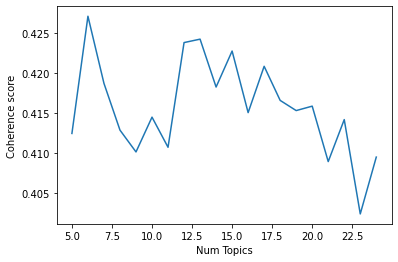

In [36]:
# Show graph
limit=25; start=5; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [37]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, 'Coherence: ', round(cv, 4))

Num Topics = 5 Coherence:  0.4124
Num Topics = 6 Coherence:  0.4271
Num Topics = 7 Coherence:  0.4187
Num Topics = 8 Coherence:  0.4129
Num Topics = 9 Coherence:  0.4101
Num Topics = 10 Coherence:  0.4145
Num Topics = 11 Coherence:  0.4107
Num Topics = 12 Coherence:  0.4238
Num Topics = 13 Coherence:  0.4243
Num Topics = 14 Coherence:  0.4183
Num Topics = 15 Coherence:  0.4228
Num Topics = 16 Coherence:  0.4151
Num Topics = 17 Coherence:  0.4209
Num Topics = 18 Coherence:  0.4166
Num Topics = 19 Coherence:  0.4153
Num Topics = 20 Coherence:  0.4159
Num Topics = 21 Coherence:  0.4089
Num Topics = 22 Coherence:  0.4142
Num Topics = 23 Coherence:  0.4024
Num Topics = 24 Coherence:  0.4095


In [38]:
# Coherence for 6-topic model
print(coherence_values[1])

# Topics for 6-topic model
malletModel_06 = model_list[1]
model_topics_06 = malletModel_06.show_topics(formatted=False)
pprint(sorted(malletModel_06.print_topics(num_words=10)))

# Convert results to lda model format for visualization.
MalletLDA06 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_06)

# Visualize the topics
pyLDAvis.enable_notebook()
vis06 = pyLDAvis.gensim.prepare(MalletLDA06, corpus, id2word, sort_topics=False)
vis06

0.4271187744345469
[(0,
  '0.018*"school" + 0.014*"place" + 0.013*"give" + 0.011*"man" + 0.011*"time" '
  '+ 0.010*"room" + 0.009*"day" + 0.008*"speak" + 0.007*"reach" + '
  '0.007*"visit"'),
 (1,
  '0.040*"send" + 0.038*"write" + 0.036*"letter" + 0.028*"give" + 0.027*"time" '
  '+ 0.022*"hear" + 0.022*"friend" + 0.013*"receive" + 0.011*"feel" + '
  '0.011*"expect"'),
 (2,
  '0.024*"country" + 0.023*"place" + 0.018*"dollar" + 0.018*"land" + '
  '0.017*"farm" + 0.014*"pay" + 0.014*"house" + 0.013*"person" + 0.012*"town" '
  '+ 0.011*"water"'),
 (3,
  '0.033*"child" + 0.030*"week" + 0.023*"day" + 0.021*"feel" + 0.016*"book" + '
  '0.015*"night" + 0.015*"boy" + 0.012*"return" + 0.012*"fear" + 0.011*"bed"'),
 (4,
  '0.037*"work" + 0.019*"people" + 0.014*"year" + 0.012*"man" + 0.011*"world" '
  '+ 0.011*"day" + 0.010*"find" + 0.009*"city" + 0.009*"give" + 0.009*"life"'),
 (5,
  '0.038*"year" + 0.020*"acre" + 0.020*"bring" + 0.020*"day" + 0.019*"country" '
  '+ 0.019*"land" + 0.016*"family" 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.062993 -0.010092       1        1  20.496025
1     -0.248008  0.057848       2        1  15.987718
2      0.301861  0.102452       3        1  17.272904
3      0.058105 -0.401740       4        1  13.849992
4     -0.200852  0.090935       5        1  18.582756
5      0.151887  0.160597       6        1  13.810605, topic_info=         Term        Freq       Total Category  logprob  loglift
231      send  600.000000  600.000000  Default  30.0000  30.0000
302     write  571.000000  571.000000  Default  29.0000  29.0000
149    letter  545.000000  545.000000  Default  28.0000  28.0000
303      year  747.000000  747.000000  Default  27.0000  27.0000
301      work  771.000000  771.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
758   account   96.240103  150.599683   Topic6  -4.9124   1.5320
1040    money  135.168683  367.954700   Topic6  -4.5727   0.9783
636    health   98.402802  169.810659   Topic6  -4.8902   1.4341
81     dollar  104.890898  403.314660   Topic6  -4.8263   0.6329
131     house   85.426608  394.102474   Topic6  -5.0316   0.4508

[480 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1         1  0.997613  accompany
758       2  0.358566    account
758       6  0.637452    account
1111      3  0.149445       acre
1111      6  0.848976       acre
...     ...       ...        ...
302       2  0.995905      write
302       6  0.003501      write
303       5  0.329162       year
303       6  0.671704       year
304       2  1.001589  yesterday

[575 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6])

## Increased iterations

In [8]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [9]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatizedNouns)

# Create Corpus
texts = data_lemmatizedNouns

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [10]:
# To see word associated with id, use this code.
print(id2word)

Dictionary(6739 unique tokens: ['abide', 'accompany', 'angel', 'annoyance', 'answer']...)


In [11]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatizedNouns, 
                                                        start=5, 
                                                        limit=25, 
                                                        step=1)

Mallet LDA: 5 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 2972
total tokens: 61787
<10> LL/token: -8.7419
<20> LL/token: -8.33963
<30> LL/token: -8.18622
<40> LL/token: -8.11501

0	10	time man school room place work day town church number case hospital people law company fact interest order patient gentleman 
1	10	land country people money farm year family pound wood tree horse price person house foot ship body government tea acre 
2	10	day life work boy mind night girl eye woman hand head child hour time bed teacher table word world leave 
3	10	dollar year country acre place house work summer cent month city board business day water wheat boat kind employment state 
4	10	letter child friend week time book wife family kind day year husband trouble heart evening thing visit health paper weather 

<50> LL/token: -8.07259
<60> LL/token: -8.05198
<70> LL/token: -8.03705
<80> LL/token: -8.02044
<90> LL/token: -8.0146

0	10	time school man place room number work day town ge

<560> LL/token: -7.94639
<570> LL/token: -7.94566
<580> LL/token: -7.93749
<590> LL/token: -7.93468

0	10	school time man place work day room town number hospital church order family fact door case patient money teacher gentleman 
1	10	people year person world man city family state business government money time office country ship company employment body power law 
2	10	day life time girl boy night woman hour hand house child morning work bed week head room water eye care 
3	10	country land dollar year acre place farm day house work pound cent town money wood summer price wheat river boat 
4	10	letter friend child week book kind year time trouble health husband evening wife paper family weather account thing spirit baby 

<600> LL/token: -7.93772
<610> LL/token: -7.93006
<620> LL/token: -7.93398
<630> LL/token: -7.94248
<640> LL/token: -7.94014

0	10	school time man place room work church number hospital order fact day town money patient teacher mine family door train 
1	10	people yea

<110> LL/token: -8.02043
<120> LL/token: -8.01791
<130> LL/token: -8.01178
<140> LL/token: -8.00412

0	8.33333	day room morning time man bed church child life hour door hospital baby doctor week night patient clock visit eye 
1	8.33333	dollar people year person country cent land board state government law world business boat office employment expense village man labour 
2	8.33333	school family mind time work year money man case interest number fact call hand answer pay teacher service daughter month 
3	8.33333	letter child friend week book heart wife life kind death husband trouble time paper night weather boy girl spirit pleasure 
4	8.33333	country land year acre farm winter month pound summer money wood price health wheat kind ship body crop foot tea 
5	8.33333	place day work time house town city road side water building company week hand mine people return inhabitant island journey 

<150> LL/token: -8.0067
<160> LL/token: -8.00266
<170> LL/token: -7.99792
<180> LL/token: -8.0001
<1

<560> LL/token: -7.9525
<570> LL/token: -7.95565
<580> LL/token: -7.95264
<590> LL/token: -7.95333

0	8.33333	room man day morning time life church bed door hospital child order hour doctor eye patient clock face attention train 
1	8.33333	people year man world state country person government ship employment body law expense life woman mind office city wage power 
2	8.33333	school work hand time year family number case interest money mind fact call gentleman answer friend service teacher girl thing 
3	8.33333	letter child friend week book kind heart time wife husband boy trouble weather spirit baby death life evening girl paper 
4	8.33333	country land year dollar acre farm money pound summer family winter wood price wheat spring cent crop health kind foot 
5	8.33333	day place time house town work week water month road river business people boat side mine store board servant hour 

<600> LL/token: -7.96525
<610> LL/token: -7.95853
<620> LL/token: -7.95793
<630> LL/token: -7.95823
<640> 

Mallet LDA: 7 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 2972
total tokens: 61787
<10> LL/token: -8.84944
<20> LL/token: -8.42578
<30> LL/token: -8.26691
<40> LL/token: -8.17654

0	7.14286	year letter month winter time summer family kind health money foot spring friend country account tree market mail manner pay 
1	7.14286	school man people number church town time money mind case patient woman teacher question place condition companion year day interest 
2	7.14286	life friend work book heart wife husband trouble care year paper death mind letter kind hour matter copy flower child 
3	7.14286	country land dollar acre farm year cent house people wood price wheat place board person pound farmer employment money crop 
4	7.14286	day week child night boy water evening thing weather spirit baby store tea morning bed today horse island vessel sea 
5	7.14286	work house city family day place world law body government man head journey class food side ship inhabitant air hand 
6	

<410> LL/token: -7.98516
<420> LL/token: -7.98025
<430> LL/token: -7.99158
<440> LL/token: -7.98346

0	7.14286	year time month letter winter friend summer day kind family account country spring money foot health work tree people mine 
1	7.14286	school man time place life number people hospital order mind case hour church patient teacher hand gentleman reason money attention 
2	7.14286	letter friend book life heart husband year work paper time kind hand wife death girl flower copy care trouble news 
3	7.14286	country land dollar acre farm place year people pound cent house wood price wheat river money farmer person crop horse 
4	7.14286	week child day boy night bed evening morning weather thing spirit baby return today house town store yesterday island mail 
5	7.14286	city world man state day business government work office law ship body employment water power air child village year inhabitant 
6	7.14286	day room family work girl visit time door eye place table fact answer woman train h

<810> LL/token: -7.98691
<820> LL/token: -7.99123
<830> LL/token: -7.99112
<840> LL/token: -7.98906

0	7.14286	time month family letter year winter summer kind day money spring health work friend foot tree mine pay thing manner 
1	7.14286	school man time number hand case hospital order mind church place patient teacher life interest question service condition attention money 
2	7.14286	letter friend book heart life paper year husband wife death hand kind work girl flower copy daughter child time term 
3	7.14286	country land dollar acre year farm place pound cent house wood price wheat river boat farmer person board crop horse 
4	7.14286	week child day boy night bed evening morning weather town baby store account today thing yesterday island return tea church 
5	7.14286	people city world state work government business office ship employment man body day year life water law money air village 
6	7.14286	day room place work time girl hour door house family woman table visit side gentleman 

<210> LL/token: -8.04351
<220> LL/token: -8.03315
<230> LL/token: -8.02859
<240> LL/token: -8.0244

0	6.25	child week letter day year family health evening morning winter weather trouble boy night kind house today wife yesterday friend 
1	6.25	day water river boat foot town tea store winter horse pork captain week deal lot vessel cost road month provision 
2	6.25	school year people number church man law family service house teacher government state interest table pupil meeting member territory population 
3	6.25	country land dollar year acre farm place money cent house pound price wheat person farmer wood crop tree wage summer 
4	6.25	time place room day man work door hospital hour money patient mine train mind case attention order doctor question gentleman 
5	6.25	people city world man work day office business ship company body mind money air life person food character power journey 
6	6.25	time letter work girl month friend place thing account spirit change servant difficulty island 

<560> LL/token: -8.00758
<570> LL/token: -8.01559
<580> LL/token: -8.01593
<590> LL/token: -8.01215

0	6.25	day child week girl night boy evening morning letter weather winter baby friend trouble today visit thing return pleasure snow 
1	6.25	day house town water river boat bed tea store deal road pork foot island week cost provision hour dinner piece 
2	6.25	school people number year church government man family town house teacher state service condition mind law woman meeting pupil member 
3	6.25	country land dollar year acre farm pound place cent money wood price wheat summer family farmer winter crop tree person 
4	6.25	time room day man place work door hospital order patient life doctor hour hand attention companion train money sight case 
5	6.25	work city world business people day man ship person employment body power company air food life office place law time 
6	6.25	time month work letter spirit change place people money pay difficulty mail interest account board thing rest en

<910> LL/token: -8.00516
<920> LL/token: -7.99703
<930> LL/token: -7.98996
<940> LL/token: -7.99858

0	6.25	child week day girl morning night boy evening bed weather baby visit trouble today yesterday snow island thing leave window 
1	6.25	day water house river boat month board cent town tea deal week foot captain pork store provision hour piece side 
2	6.25	school church people year town number state law government service teacher house condition call meeting table member territory war interest 
3	6.25	country land year dollar acre farm family pound money price wheat winter wood farmer place summer house crop person spring 
4	6.25	room time man place day work door hospital hand hour doctor patient order life train companion money case mind sight 
5	6.25	man people city work world business place day employment body office power money air village life person food ship head 
6	6.25	time letter work month account people spirit place mine difficulty end mail winter interest manner change r

<260> LL/token: -8.0324
<270> LL/token: -8.03725
<280> LL/token: -8.02644
<290> LL/token: -8.02895

0	5.55556	letter time week child day year health friend month winter account girl baby thing evening family today weather trouble snow 
1	5.55556	school church number town family gentleman place mind door service house teacher woman answer interest question condition year building stage 
2	5.55556	child boy night ship body tea mind air morning doctor captain bed woman sea business life blood wife heart vessel 
3	5.55556	friend book work letter life hand heart husband paper death wife kind flower copy daughter spirit nature trial anxiety interest 
4	5.55556	people year city state government country law world office employment company man business person village money labour property inhabitant bank 
5	5.55556	day time room visit week morning pleasure end call girl night companion head table meeting pupil boy window fear bed 
6	5.55556	man time work day place hour life money hospital case 

<610> LL/token: -8.0339
<620> LL/token: -8.03308
<630> LL/token: -8.04126
<640> LL/token: -8.0368

0	5.55556	week letter child time day evening winter weather health baby thing today mail snow month year girl trouble account summer 
1	5.55556	school church number family place mind house fact town teacher year gentleman train service interest condition doctor child meeting answer 
2	5.55556	child boy ship day tea body air life captain food world sea money night mind thing bed clothe head water 
3	5.55556	friend letter book work heart husband life paper kind daughter death wife flower copy family trouble return trial hand mind 
4	5.55556	people year country city man state government law world office labour property time company character party business power idea hand 
5	5.55556	day room morning girl time night visit eye bed boy call table word companion fear head pupil rest door week 
6	5.55556	time man work day place life hospital hour hand money mine order month patient room friend at

<960> LL/token: -8.05094
<970> LL/token: -8.04345
<980> LL/token: -8.0429
<990> LL/token: -8.04411

0	5.55556	week child letter time day evening weather account baby thing month today return mail snow winter wife write island spirit 
1	5.55556	school place number church mind gentleman town teacher train service interest house condition year meeting answer stage question member territory 
2	5.55556	ship day body world tea air water boy food mind captain vessel night sea life head money clothe child woman 
3	5.55556	friend letter book year life work kind heart husband paper hand daughter health death copy flower family wife trouble nature 
4	5.55556	people country state government man year law time company world city difficulty labour idea land party property person population capital 
5	5.55556	day morning girl boy night room bed eye time table word clock door companion visit fear end pupil hour window 
6	5.55556	time man work day room money life hospital place hand order patient friend

<260> LL/token: -8.0182
<270> LL/token: -8.02731
<280> LL/token: -8.02297
<290> LL/token: -8.02019

0	5	year work life interest copy difficulty expense comfort party opinion end term capital stock story idea debt history paper success 
1	5	country land acre year farm dollar money pound price wheat summer month family crop farmer winter horse wood tree bushel 
2	5	place house day dollar town work cent city river business board boat employment water wage road village inhabitant hour bank 
3	5	letter friend kind book wife health child husband family paper winter flower mail heart thing write house return news writing 
4	5	man time day work room hour hospital money order patient fact town mind case sight answer friend condition horse mine 
5	5	school place family number church door gentleman teacher train meeting pupil girl station stage territory lady head house eye thing 
6	5	people man world country government year state money law power land labour food mind company property person time

<560> LL/token: -8.03542
<570> LL/token: -8.03216
<580> LL/token: -8.03263
<590> LL/token: -8.0267

0	5	year book work paper difficulty interest copy account opinion term expense manner debt end story history anxiety idea life success 
1	5	country land acre year farm pound money price wheat winter summer dollar crop wood tree spring farmer bushel market potato 
2	5	place house dollar day work town cent board boat employment river month time business city wage village water inhabitant road 
3	5	letter friend kind family wife health husband month child winter flower house thing fear write comfort news writing return girl 
4	5	man time day work room hospital order money patient town fact mind place case sight mine native gold wagon month 
5	5	school place door number teacher gentleman family church girl service meeting call pupil visit station stage lady house eye head 
6	5	people year man world country government state law land company person food labour mind character city party money p

<860> LL/token: -8.03189
<870> LL/token: -8.02838
<880> LL/token: -8.02609
<890> LL/token: -8.02903

0	5	work year book paper interest difficulty copy end account manner term debt husband opinion history notice story success truth subject 
1	5	country land year acre farm money pound winter dollar wood wheat summer price crop tree spring bushel farmer market potato 
2	5	place day house dollar cent work board river town boat city business village inhabitant employment water stone building flour side 
3	5	letter friend kind time family health month wife child thing daughter girl flower husband mail winter write fear news writing 
4	5	time day man work room hospital place money order patient train case attention fact hour town minute mind wagon doctor 
5	5	school place number door gentleman teacher family companion church service pupil visit station stage girl lady meeting horse table call 
6	5	people man year world state country government law property mind company money character party l

<160> LL/token: -8.07535
<170> LL/token: -8.06943
<180> LL/token: -8.07099
<190> LL/token: -8.05954

0	4.54545	child week day girl boy evening morning weather spirit night baby return today visit mail snow account table yesterday clock 
1	4.54545	time day life hand mind eye case bed friend care head water week side rest night trouble scene purpose arm 
2	4.54545	family house town tree year money school thing horse teacher garden island call place stage word end number interest month 
3	4.54545	dollar place work day house state town person city river business village people inhabitant board bank expense mill side capital 
4	4.54545	cent month boat employment wage person captain country dollar price potato sea pork flour steam store tea board neighbour emigrant 
5	4.54545	letter friend book kind heart wife month paper husband health flower death copy daughter trouble write news anxiety writing thing 
6	4.54545	room work door man hospital patient hour order woman train answer attention pl

<460> LL/token: -8.07124
<470> LL/token: -8.07409
<480> LL/token: -8.06586
<490> LL/token: -8.07314

0	4.54545	week child day morning boy evening baby weather night today return yesterday snow account church island dinner spirit visit clock 
1	4.54545	time day hand life friend room care head woman rest heart trouble mind eye side girl night bed fire matter 
2	4.54545	family house month year town time wife change thing girl money pleasure week call winter tree paper word road living 
3	4.54545	dollar place work day house city town expense business people land village river inhabitant board wage half employment time person 
4	4.54545	cent water month pork provision person boat cost thing board servant pay situation store farmer tea price foot steam emigrant 
5	4.54545	letter friend book kind work husband death health paper heart flower copy daughter life child write news writing trial wife 
6	4.54545	work man room hospital patient place order hour gentleman door train sight answer fact c

<760> LL/token: -8.08318
<770> LL/token: -8.0791
<780> LL/token: -8.07697
<790> LL/token: -8.07342

0	4.54545	week child day morning evening church baby boy weather today night yesterday dinner snow island return visit clock spirit window 
1	4.54545	time day hand girl room friend care bed woman night mind life change eye rest thing trouble mine death side 
2	4.54545	family time year month house town wife interest friend girl summer pleasure end manner word call winter living thing music 
3	4.54545	dollar place house work day cent town business city people village inhabitant half employment expense river wage building board office 
4	4.54545	water month thing captain person tea boat pork piece emigrant store cost deal sugar board vessel luggage good butter river 
5	4.54545	letter book friend kind husband work paper heart health flower copy daughter write life news loss writing trial death kindness 
6	4.54545	work room man hospital time place patient order case door hour train gentleman 

<10> LL/token: -9.10747
<20> LL/token: -8.60335
<30> LL/token: -8.41546
<40> LL/token: -8.3118

0	4.16667	land country year acre winter money farm wood pound wheat summer spring dollar crop month horse tree cost seed price 
1	4.16667	letter day friend week night trouble death return leave house call store stage gentleman opportunity lady aunt snow pain prospect 
2	4.16667	book heart room husband teacher life hand fear rest window anxiety scene picture hour service prayer week answer story face 
3	4.16667	work life mind people hospital case doctor body copy paper man care soul daughter meeting boy house nature matter bread 
4	4.16667	child letter time friend girl visit wife kind week patient flower health write news pleasure dollar writing husband sorrow loss 
5	4.16667	family church spirit time table town word house evening weather thing island servant week paper hand change today dinner life 
6	4.16667	water business city world ship power air food vessel child captain sea woman side l

<260> LL/token: -8.07359
<270> LL/token: -8.0725
<280> LL/token: -8.07611
<290> LL/token: -8.07479

0	4.16667	country year land acre pound farm summer wheat money family winter crop spring tree wood bushel horse kind cost seed 
1	4.16667	day house week friend letter account winter store pork night snow board leave return gentleman opportunity call matter good dress 
2	4.16667	book friend hand heart life husband copy nature daughter interest family paper world eye picture anxiety care sorrow truth subject 
3	4.16667	time work mind money woman room case hospital doctor life man patient child reason person fact attention care meeting year 
4	4.16667	letter child kind girl death health thing wife year flower trouble baby week dollar month weather write news paper pleasure 
5	4.16667	week evening church table town today spirit yesterday island tea morning change dinner servant room walk trust tomorrow mail lesson 
6	4.16667	business water ship body world air food month sea city vessel money

<510> LL/token: -8.08221
<520> LL/token: -8.09486
<530> LL/token: -8.09066
<540> LL/token: -8.0742

0	4.16667	country year land acre farm pound money family wheat wood crop spring summer month bushel tree horse health kind market 
1	4.16667	time letter day friend house winter place account week store summer mail pork snow comfort respect opportunity prospect difficulty business 
2	4.16667	book friend work hand husband life paper heart copy nature trial interest change world living age sorrow loss truth fortune 
3	4.16667	room time family mind case man life hospital money doctor answer order patient care attention child soul meeting reason minute 
4	4.16667	letter girl child kind wife year fear month thing week weather flower heart daughter pleasure write death dollar news health 
5	4.16667	week child evening town church morning table today tea yesterday clock island dinner spirit visit walk servant change window tomorrow 
6	4.16667	day ship body world water air food vessel sea money ad

<760> LL/token: -8.06975
<770> LL/token: -8.07433
<780> LL/token: -8.08092
<790> LL/token: -8.07699

0	4.16667	country year land acre farm money wheat family pound wood crop spring bushel tree market price seed lot farmer horse 
1	4.16667	time day letter friend winter week place month health summer account house store mail snow weather pleasure comfort respect prospect 
2	4.16667	work book year life friend hand husband paper copy heart interest nature world matter trouble manner trial story sorrow truth 
3	4.16667	time room family mind case man hospital life doctor answer patient money care work order meeting station minute attention reason 
4	4.16667	letter girl child kind wife baby death thing fear flower heart daughter write news writing family dollar rest woman board 
5	4.16667	week child evening town church morning today clock boy yesterday island dinner spirit tea pork tomorrow afternoon return change visit 
6	4.16667	ship body water air life sea world boy vessel mind passenger c

Mallet LDA: 13 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 2972
total tokens: 61787
<10> LL/token: -9.08861
<20> LL/token: -8.592
<30> LL/token: -8.39508
<40> LL/token: -8.30458

0	3.84615	letter friend girl health book boy baby family weather death dollar week writing news spirit bed opportunity term anxiety creature 
1	3.84615	price water world ship bushel sea country side passenger article provision foot kind cow port profit sugar luggage clothe half 
2	3.84615	year thing kind child change interest flower garden trouble return people fear pay loss world servant debt age peace bread 
3	3.84615	work time day mind care board money manner difficulty wife fever people case bed sickness situation house fellow claim happiness 
4	3.84615	time man foot hand room family side morning fact door mine doctor hour gold money stage station clock attention mind 
5	3.84615	friend life heart year paper husband hand wife family word copy book call night daughter kind purpose nature w

<260> LL/token: -8.10064
<270> LL/token: -8.10348
<280> LL/token: -8.10644
<290> LL/token: -8.108

0	3.84615	letter child day girl week death baby daughter pleasure weather night visit thing heart news fear change wife boy writing 
1	3.84615	boat water ship cent sea employment wage provision passenger steam vessel emigrant iron servant box arrival port sugar board luggage 
2	3.84615	year health account kind flower thing difficulty write time interest term expense picture debt return idea kindness success care opinion 
3	3.84615	time work day money month business person pay mind year house care rest manner case fever company reason board earth 
4	3.84615	man room hour time door doctor woman side hand mind morning head station stage foot word mine gold case law 
5	3.84615	friend book life hand paper husband heart wife family copy nature woman kind eye end loss matter story trouble soul 
6	3.84615	day place time life order train family eye companion sight horse visit wagon ground fear res

<510> LL/token: -8.10316
<520> LL/token: -8.11283
<530> LL/token: -8.10416
<540> LL/token: -8.09466

0	3.84615	letter child girl day week baby visit kind weather thing death heart fear night daughter news change wife writing aunt 
1	3.84615	water ship sea head passenger captain vessel provision woman iron piece arrival port luggage salt view passage voyage currency bread 
2	3.84615	year people time difficulty flower account interest opinion term idea anxiety expense end health debt servant rest manner loss situation 
3	3.84615	time work day money month house person case mine pay thing business company town gold pleasure opportunity board fever reason 
4	3.84615	room man hour time door mind doctor foot hand side attention morning station head arm boy return face child bed 
5	3.84615	book life friend husband paper hand heart work copy eye care nature woman trial spirit history story sorrow world truth 
6	3.84615	place day time life train sight horse stage order rest eye wagon call gentle

<760> LL/token: -8.09027
<770> LL/token: -8.09556
<780> LL/token: -8.09071
<790> LL/token: -8.10161

0	3.84615	letter day girl child weather baby week thing kind flower fear pleasure visit daughter heart death news dollar writing night 
1	3.84615	water ship vessel sea piece tea iron passenger boat port captain bed arrival luggage passage foot thing voyage currency mile 
2	3.84615	year people time difficulty interest manner idea expense servant opinion term person loss case debt end capital situation health daughter 
3	3.84615	work day time money month house mine pay thing company care gold fire business fellow change amount opportunity rest call 
4	3.84615	room time hour life mind man doctor woman door child morning case hand visit bed head face station arm side 
5	3.84615	book friend work life husband paper hand heart copy nature wife world eye trouble trial kind story letter age matter 
6	3.84615	day man place order train eye time sight horse stage building gentleman road word wagon 

Mallet LDA: 14 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 2972
total tokens: 61787
<10> LL/token: -9.14015
<20> LL/token: -8.61676
<30> LL/token: -8.43806
<40> LL/token: -8.33973

0	3.57143	country family month winter letter health tree kind thing summer manner foot week snow respect prospect pay account butter heat 
1	3.57143	state person country property labour trade class difficulty money church family plan part habit capital character purchase case rate building 
2	3.57143	day girl child word week work write horse thing pain term morning wagon living place garden time paper loss fortune 
3	3.57143	child week letter time night evening baby today weather return wife yesterday day girl heart spirit change mail rest tomorrow 
4	3.57143	day water tea store pork vessel island town sea cost provision foot deal oats good passage week port person currency 
5	3.57143	room time place door hospital family table number case patient house question doctor attention hand order 

<210> LL/token: -8.127
<220> LL/token: -8.13327
<230> LL/token: -8.13718
<240> LL/token: -8.13045

0	3.57143	letter time month family winter health summer kind friend account manner year write respect prospect foot pay mine thing week 
1	3.57143	country time money idea people board difficulty labour person dollar trade property capital state expense emigrant opinion family servant purchase 
2	3.57143	day girl week place daughter tree thing time horse leave wife night aunt wagon word garden child pleasure opportunity distance 
3	3.57143	child week morning evening night letter baby weather today yesterday island clock return window visit spirit dinner mail tomorrow trust 
4	3.57143	day water tea store pork vessel provision foot deal box thing article good passage salt boat bed clothe lbs currency 
5	3.57143	time man room door hospital patient hour visit family order case place question companion train sight station stage territory lady 
6	3.57143	school work number mind teacher gentleman

<410> LL/token: -8.10179
<420> LL/token: -8.09591
<430> LL/token: -8.09816
<440> LL/token: -8.10306

0	3.57143	letter family winter month time friend summer health year kind account place pay respect mine paper write fall prospect line 
1	3.57143	country time money difficulty mind idea people labour capital servant expense property purchase climate gold opinion person emigrant situation amount 
2	3.57143	day girl time child thing daughter week weather wife flower pleasure garden tree rest opportunity word trip comfort snow darling 
3	3.57143	child week morning evening baby boy today house letter visit spirit island yesterday night return dinner mail change fear clock 
4	3.57143	day tea water store pork week provision deal spring foot vessel cost luggage good captain thing month passage currency box 
5	3.57143	man time room hospital patient place case order companion sight visit family answer question hour door native fact doctor attention 
6	3.57143	school work number teacher pupil sta

<610> LL/token: -8.09239
<620> LL/token: -8.10842
<630> LL/token: -8.11184
<640> LL/token: -8.11023

0	3.57143	letter time winter family friend month summer year kind health place wife spring snow respect foot fall account mine line 
1	3.57143	country time person money idea expense difficulty people situation servant capital manner mind case purchase board emigrant number business state 
2	3.57143	day girl thing daughter weather child flower time pleasure rest news window word house wife creature likeness darling night face 
3	3.57143	week child evening morning boy baby letter today visit yesterday spirit island account mail aunt night fear return tomorrow trouble 
4	3.57143	day store pork tea water provision thing piece month luggage good pay box account currency vessel week iron lbs passage 
5	3.57143	time man room hospital patient order companion place life door answer work train case visit sight attention fact hour minute 
6	3.57143	school number teacher work money pupil stage gent

<810> LL/token: -8.09881
<820> LL/token: -8.10641
<830> LL/token: -8.09843
<840> LL/token: -8.10388

0	3.57143	letter friend family year winter month summer time kind health money account place spring mine respect fall foot snow pay 
1	3.57143	country person difficulty expense business capital people idea year purchase situation climate servant case time manner opinion emigrant mind fortune 
2	3.57143	day girl child time thing weather wife daughter flower house week news pleasure rest write creature dollar likeness darling window 
3	3.57143	week child evening boy morning baby night return visit today spirit fear yesterday island trouble mail letter tomorrow afternoon account 
4	3.57143	tea store pork water cost day deal provision vessel spring piece box captain gold luggage good thing article currency month 
5	3.57143	man time room hospital order place patient life companion train case condition sight fact work door question answer station native 
6	3.57143	school work number teacher p

Mallet LDA: 15 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 2972
total tokens: 61787
<10> LL/token: -9.16496
<20> LL/token: -8.63478
<30> LL/token: -8.45637
<40> LL/token: -8.357

0	3.33333	family house town child church day morning thing clock week island time yesterday man spring term answer pork money breakfast 
1	3.33333	world man work body family air food money hand life labour ship power year people blood iron matter sort age 
2	3.33333	day week evening night girl store time tea servant window anxiety living fellow prospect difficulty pain leave month hour situation 
3	3.33333	year letter winter friend month time health summer account weather change write snow farm foot neighbourhood thing week comfort sum 
4	3.33333	work life eye pay stage table story debt voice gold loss fire interest sorrow husband feeling hair music service plan 
5	3.33333	dollar farm cent place house city board boat state employment work business price day person wage village town office pr

<210> LL/token: -8.13597
<220> LL/token: -8.13244
<230> LL/token: -8.13746
<240> LL/token: -8.12554

0	3.33333	child week house evening morning boy town church baby clock yesterday island spirit dinner return tomorrow afternoon pork lesson tea 
1	3.33333	world body power air life food child money mind man labour ship blood part character boy habit people matter sickness 
2	3.33333	day week girl time weather night today trouble change thing pain window prospect pen leave fellow store darling situation cough 
3	3.33333	letter time winter year friend health summer place month account spring comfort farm wife respect kind snow thing fall word 
4	3.33333	work family husband year life term loss story care heart interest history pay nature eye trouble anxiety notice college change 
5	3.33333	place work dollar cent day city boat house employment board wage town person month village business half river farm flour 
6	3.33333	country land acre dollar pound year wheat wood price crop tree bushel f

<410> LL/token: -8.13289
<420> LL/token: -8.12499
<430> LL/token: -8.1275
<440> LL/token: -8.12072

0	3.33333	child week morning evening house town boy yesterday island church dinner return mail clock spirit store tea tomorrow visit pork 
1	3.33333	world body air life child food mind ship character blood man power money arrival boy part drink city heart work 
2	3.33333	day week girl weather baby night time today trouble change bed pleasure month thing pain leave snow prospect pen sleep 
3	3.33333	letter family winter year health summer place month friend time country spring account kind respect living wife manner fall comfort 
4	3.33333	work husband life book year interest story spirit garden loss truth term trouble nature matter success history care debt gentleman 
5	3.33333	dollar place work day cent house boat city village business town half employment inhabitant board flour office river steam lake 
6	3.33333	land country acre farm year pound price wheat money crop dollar wood farme

<610> LL/token: -8.11994
<620> LL/token: -8.13592
<630> LL/token: -8.1375
<640> LL/token: -8.13229

0	3.33333	child week morning evening town boy church today house dinner yesterday island clock spirit visit walk tomorrow afternoon store pork 
1	3.33333	world body air food life business ship man power boy work money mind blood idea character child labour drink port 
2	3.33333	day week night weather baby trouble girl thing change bed window time month pain pen leave fortnight cough face sleep 
3	3.33333	family letter year winter summer country friend health month place kind money spring time account manner fall respect wife comfort 
4	3.33333	work book year paper copy interest life term hand matter history spirit loss truth story trouble notice mail trust address 
5	3.33333	place dollar day work cent city house town person boat village employment board business wage month water inhabitant people steam 
6	3.33333	land country acre farm year pound wheat price dollar crop farmer tree bushe

<810> LL/token: -8.12846
<820> LL/token: -8.13499
<830> LL/token: -8.13275
<840> LL/token: -8.13673

0	3.33333	child week morning evening boy church today clock yesterday island dinner town mail spirit pork store house tomorrow afternoon lesson 
1	3.33333	world body air food life mind character head ship boy child money blood person heart water drink hour idea gentleman 
2	3.33333	day week night time girl bed weather baby thing trouble visit pleasure house room leave anxiety change month pain snow 
3	3.33333	family letter year winter summer health friend kind place month spring country time account manner money fall respect prospect climate 
4	3.33333	work book paper year copy interest term nature spirit debt history power hand life story world trouble truth address talent 
5	3.33333	place dollar cent work day house board city town business wage village employment flour steam inhabitant boat person street month 
6	3.33333	land country acre farm year pound price wheat dollar crop money 

Mallet LDA: 16 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 2972
total tokens: 61787
<10> LL/token: -9.19011
<20> LL/token: -8.63976
<30> LL/token: -8.4528
<40> LL/token: -8.36332

0	3.125	day number hand side place seed pupil church door tree time eye garden ground teacher service end building stand lady 
1	3.125	child boy girl baby house flower week visit care yesterday trouble manner wife daughter mail loss anxiety fortnight doctor opportunity 
2	3.125	book letter year work kind copy write interest change pay matter hand life spirit prospect nature soul power story pen 
3	3.125	man mind body world air life food passenger money work night iron boy water drink bed note case religion company 
4	3.125	people state government law year office man property bank class capital labour land dollar governor population habit money party school 
5	3.125	friend heart letter life paper husband wife woman death kind fear arm pleasure picture news daughter end creature truth darling

<210> LL/token: -8.14117
<220> LL/token: -8.1352
<230> LL/token: -8.1341
<240> LL/token: -8.13102

0	3.125	day door hand time pupil scene eye service visit companion girl hair prisoner place possession ground thing death judge jail 
1	3.125	child girl boy baby trouble house yesterday wife week change care fear mail tomorrow snow kindness anxiety lesson fortnight opportunity 
2	3.125	book work paper life year copy interest time term idea success hand debt trial nature doubt matter sale soul truth 
3	3.125	world body air man life food mind month boy ship blood pain power year money head drink child case heart 
4	3.125	people government year man law state company population party office labour difficulty world power capital court land industry war bank 
5	3.125	letter friend heart kind husband death life wife flower daughter health age news picture hand loss sorrow peace creature woman 
6	3.125	dollar day work cent place city house employment business board wage village person inhabitant 

<410> LL/token: -8.13133
<420> LL/token: -8.12663
<430> LL/token: -8.12357
<440> LL/token: -8.13824

0	3.125	day hand school eye pupil head man scene door death prisoner word gang possession jail morning judge girl visit room 
1	3.125	child girl week boy trouble baby change house trust tomorrow fear difficulty lesson fortnight happiness anxiety hope cottage talk pain 
2	3.125	book work year paper copy interest life hand debt success truth nature mind doubt story account idea address opinion fortune 
3	3.125	body life world air food mind business man ship character blood power boy child month money sickness drink care fever 
4	3.125	people year government state law time country city man office world population property party money number woman duty labour bank 
5	3.125	letter friend heart husband wife kind death flower life daughter write health woman news paper trial age dollar sorrow loss 
6	3.125	dollar place cent day house work business employment board village city person inhabitan

<610> LL/token: -8.13125
<620> LL/token: -8.13764
<630> LL/token: -8.14833
<640> LL/token: -8.1413

0	3.125	hand man day pupil eye mind girl sight water door place prisoner gang death school possession visit thing jail ground 
1	3.125	child girl trouble boy week baby house fear change difficulty anxiety tomorrow pain fortnight word care hope lesson term trust 
2	3.125	book year paper work hand copy life interest matter story success truth history health fortune sale nature sum debt volume 
3	3.125	body life world air food ship boy mind money power blood case man water idea drink fever people sickness climate 
4	3.125	people government country year law state man office number party idea population world labour bank purpose power city property trade 
5	3.125	letter friend kind heart husband wife death flower daughter life news thing trial write kindness woman sorrow loss age comfort 
6	3.125	dollar day work place house city employment business board cent wage town village flour water peo

<810> LL/token: -8.13189
<820> LL/token: -8.13789
<830> LL/token: -8.13432
<840> LL/token: -8.14062

0	3.125	man hand day school pupil place morning companion judge eye visit life death time girl prisoner head gang word law 
1	3.125	child week girl boy time trouble baby change anxiety fear weather tomorrow lesson pain fortnight trust return cough hope difficulty 
2	3.125	book year work hand paper copy life interest kind term nature debt world matter history spirit story truth manner sale 
3	3.125	body world air ship food mind life money blood water drink port climate matter boy passenger business character case power 
4	3.125	people government year state man law office population party power country capital war land city labour district industry duty support 
5	3.125	letter friend heart husband kind wife death daughter life flower dollar news writing trial picture health loss write kindness sorrow 
6	3.125	dollar place cent day board work city business house employment wage town villag

Mallet LDA: 17 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 2972
total tokens: 61787
<10> LL/token: -9.16689
<20> LL/token: -8.63269
<30> LL/token: -8.45569
<40> LL/token: -8.36665

0	2.94118	day week child time evening boy night today morning visit yesterday weather island table account aunt pleasure month coal place 
1	2.94118	year mind people hand thing call time story war son subject attack attention power fact regret emigration beauty language possession 
2	2.94118	day child bed week trouble fear comfort side loss living hour view rest anxiety afternoon promise morning seed captain spot 
3	2.94118	water ship body world air life vessel passenger duty mind blood month captain clothe thousand salt power money drink head 
4	2.94118	country cent money family wood person horse month place land price lot manner steam garden neighbourhood tree half sugar butter 
5	2.94118	book friend work heart paper life husband year death letter copy spirit interest age world daughter

<210> LL/token: -8.17146
<220> LL/token: -8.16191
<230> LL/token: -8.16776
<240> LL/token: -8.16921

0	2.94118	day week today yesterday snow island church account weather night store aunt health thing prospect lesson likeness spirit visit evening 
1	2.94118	time year man month fact mind death town hand judge war call end life son field subject doubt thing earth 
2	2.94118	child morning week town room evening clock fear dinner return boy trust time servant tomorrow afternoon day leave tea mail 
3	2.94118	ship world body air food sea life passenger mind blood arrival clothe head money port sickness captain power drink case 
4	2.94118	country winter summer money month wood family place horse climate person difficulty year lot cost manner garden account neighbourhood fall 
5	2.94118	book friend life work husband heart year copy paper letter health hand trial sorrow world nature interest loss living spirit 
6	2.94118	day night boy woman baby bed heart care time week trouble doctor board mon

<410> LL/token: -8.14996
<420> LL/token: -8.14757
<430> LL/token: -8.15328
<440> LL/token: -8.15362

0	2.94118	day week house today island account yesterday snow store night weather evening visit vessel likeness captain pork oats pleasure prospect 
1	2.94118	time year town hand man end life fact mind war judge peace prisoner doubt law death possession table head call 
2	2.94118	child morning boy town church fear clock mail evening dinner week spirit tea return tomorrow servant afternoon room lesson breakfast 
3	2.94118	ship body air world life food sea mind character boy blood child port sickness drink passenger voyage captain arrival water 
4	2.94118	country winter year family summer money month wood place health difficulty comfort respect lot fall neighbourhood cow climate settler manner 
5	2.94118	book work friend life husband letter heart copy year paper kind spirit sorrow interest world hand debt story nature trial 
6	2.94118	day night bed week woman heart time baby board trouble 

<610> LL/token: -8.14447
<620> LL/token: -8.15149
<630> LL/token: -8.15691
<640> LL/token: -8.14806

0	2.94118	day week house today store island snow pork account winter night evening likeness mail captain vessel weather visit prospect leave 
1	2.94118	man time hand life year call mind judge month fact war end case head subject earth prisoner law truth field 
2	2.94118	child morning week boy church fear town evening clock room spirit dinner return tea tomorrow afternoon yesterday lesson breakfast trust 
3	2.94118	ship body world air food boy life blood water child money mind sea drink voyage business port character vessel passenger 
4	2.94118	country family year money summer winter month health difficulty lot manner respect account fall climate place spring cow comfort friend 
5	2.94118	book work husband life paper year copy friend trial age interest sorrow heart spirit story world loss bread mail debt 
6	2.94118	day night heart trouble time bed woman baby doctor care week month hour m

<810> LL/token: -8.13982
<820> LL/token: -8.15772
<830> LL/token: -8.14362
<840> LL/token: -8.13725

0	2.94118	day week house today account night island snow store pork mail vessel visit weather captain evening yesterday prospect opportunity end 
1	2.94118	man time year month call judge law end mind war town case subject history death prisoner life hand possession field 
2	2.94118	child morning boy church return week fear evening clock tea town dinner spirit tomorrow lesson afternoon trust breakfast fortnight leave 
3	2.94118	ship world body life food money child air water business sea boy mind blood sickness character voyage age passenger drink 
4	2.94118	country year family winter summer health money month spring friend manner difficulty respect fall person climate neighbour comfort advantage property 
5	2.94118	book husband life work year copy paper friend heart trial interest age spirit world sorrow nature story kind debt sale 
6	2.94118	day bed heart trouble week night baby room w

Mallet LDA: 18 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 2972
total tokens: 61787
<10> LL/token: -9.18225
<20> LL/token: -8.64697
<30> LL/token: -8.47065
<40> LL/token: -8.38475

0	2.77778	house boat town day place pork tea vessel spring captain flour side week kind thing employment month luggage salt journey 
1	2.77778	year house dollar copy paper husband mind power world sort tomorrow sum view doubt party lesson fortune address constitution fire 
2	2.77778	work office care inhabitant woman anxiety garden place people living duty hand day memory spring fortnight situation week month stranger 
3	2.77778	boy child book heart life return trouble bread prospect news attack thing eye picture salary heat change trip care beauty 
4	2.77778	week child day baby today weather night spirit bed morning store yesterday leave likeness illness end account kitchen month afternoon 
5	2.77778	day visit church morning school evening pupil wagon eye island judge tribe talk dinner ja

<210> LL/token: -8.18085
<220> LL/token: -8.16782
<230> LL/token: -8.17211
<240> LL/token: -8.16834

0	2.77778	day house boat place board town river side water journey pork employment cost flour half vessel emigrant dollar luggage good 
1	2.77778	year house party expense company term interest end power debt idea capital son law judge happiness paper sort doubt fire 
2	2.77778	book work letter copy life paper fortune sale notice story volume pound history garden race memory trust bear clearing address 
3	2.77778	child hand boy life trouble heart kind care change board mind spirit trial fear eye servant call earth book talent 
4	2.77778	child week evening morning day today yesterday church island clock town dinner mail tomorrow boy store leave lesson spirit return 
5	2.77778	day visit pupil church meeting head wagon companion tribe word number jail eye chair side sight death tree prisoner ranch 
6	2.77778	letter girl time week weather night thing day flower baby dollar news visit writing

<410> LL/token: -8.15179
<420> LL/token: -8.14694
<430> LL/token: -8.15781
<440> LL/token: -8.15254

0	2.77778	cent dollar house boat day place board employment water flour emigrant half servant lake river town cost side month week 
1	2.77778	year house company party mind woman expense power debt law son end capital doubt judge child rent education sum benefit 
2	2.77778	book work letter paper life copy success fortune interest trust story address illness volume pound talent mail anxiety term artist 
3	2.77778	hand child change heart life fear trouble board care nature eye mind spirit boy trial call matter idea night happiness 
4	2.77778	week child evening morning today island church yesterday tea dinner clock pork town store mail tomorrow afternoon captain spirit return 
5	2.77778	day visit companion pupil hand eye wagon church tribe prisoner morning gang jail attack word tree trail ranch death seat 
6	2.77778	letter week time girl weather day thing baby flower kind visit news writing

<610> LL/token: -8.15253
<620> LL/token: -8.16059
<630> LL/token: -8.16083
<640> LL/token: -8.16039

0	2.77778	dollar cent boat house place board employment water river town day emigrant flour half steam luggage month journey currency lake 
1	2.77778	year people house difficulty company party power interest expense capital woman opinion mind doubt law judge education independence sum term 
2	2.77778	book work letter paper copy life picture story kind pound fortune notice trust volume talent world debt assistance history fever 
3	2.77778	hand life heart change eye mind care idea matter boy nature board servant pleasure night death spirit earth anxiety happiness 
4	2.77778	week evening child morning today church island store yesterday clock tea town spirit tomorrow return pork dinner captain afternoon fortnight 
5	2.77778	man day visit pupil eye wagon side water head word place prisoner tribe teacher life companion gang tree jail journey 
6	2.77778	letter day girl week baby thing weather

<810> LL/token: -8.15817
<820> LL/token: -8.16289
<830> LL/token: -8.1658
<840> LL/token: -8.16136

0	2.77778	cent dollar house boat board day place work month employment water flour town steam emigrant half servant situation luggage journey 
1	2.77778	year people difficulty party expense opinion capital interest house mind judge company woman district duty emigration fact doubt benefit idea 
2	2.77778	book letter work paper copy life year term kind anxiety pound story volume notice trial debt pen artist fortune sum 
3	2.77778	hand life change matter night eye nature heart death mind world spirit boy table word board servant idea happiness scene 
4	2.77778	week evening tea island today store morning child clock mail church yesterday pork tomorrow town spirit captain account afternoon vessel 
5	2.77778	man day visit hand pupil horse time wagon hour companion morning prisoner gang sight possession jail water trail fear head 
6	2.77778	letter girl weather time flower baby thing day week d

Mallet LDA: 19 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 2972
total tokens: 61787
<10> LL/token: -9.25052
<20> LL/token: -8.68638
<30> LL/token: -8.48602
<40> LL/token: -8.38894

0	2.63158	school number teacher man train eye time fact pupil hand wagon voice mind companion place tribe group governor incident plain 
1	2.63158	man work door order life woman foot time place room service case lady mind claim prisoner rest reason conversation physician 
2	2.63158	day time week weather fear trouble child daughter snow yesterday leave aunt tomorrow news spirit illness trip attack winter anxiety 
3	2.63158	board day month boat tea hour cost sea table servant week cow account luggage passage bread opportunity currency arrival captain 
4	2.63158	year people government church labour duty article piece earth fire rent amount history country house climate farming tax pound age 
5	2.63158	day church night visit morning horse dinner week window return side rest walk arm hair bed 

<160> LL/token: -8.18931
<170> LL/token: -8.18565
<180> LL/token: -8.18961
<190> LL/token: -8.17636

0	2.63158	school number place teacher girl pupil eye hand wagon voice fact driver tribe side member surprise head thing companion feeling 
1	2.63158	room mind time life door man order train reason woman foot stage conversation group death judge prisoner hour physician jail 
2	2.63158	letter day time week weather thing write news leave fear evening aunt visit night town likeness pen spirit snow daughter 
3	2.63158	boat tea board water day vessel captain week bed ship hour luggage passage sea servant currency salt thing milk passenger 
4	2.63158	year people state law age party land day money idea duty number city property mind article thing support power church 
5	2.63158	day morning week church return clock dinner island evening pleasure walk visit head horse gentleman breakfast spot room night afternoon 
6	2.63158	land wood tree family house river place situation road mill half garden l

<310> LL/token: -8.17549
<320> LL/token: -8.1759
<330> LL/token: -8.17555
<340> LL/token: -8.17047

0	2.63158	school place number teacher hand girl pupil eye wagon music tribe driver voice scene gang head possession member thing surprise 
1	2.63158	door life room order man time mind train stage reason companion rest person hour woman law hand prisoner judge jail 
2	2.63158	letter time day thing change weather week night news fear aunt death leave likeness pen daughter visit board write promise 
3	2.63158	captain vessel store boat water tea ship cent pork sea servant luggage clothe good passage currency fish foot milk lbs 
4	2.63158	people year state law day money world party time labour idea city power property duty mind district industry capital bank 
5	2.63158	day morning week evening town church clock island dinner return horse visit walk pleasure afternoon room fear night head breakfast 
6	2.63158	land place house tree wood road water river day mill garden side lot deal neighbourho

<460> LL/token: -8.1731
<470> LL/token: -8.18018
<480> LL/token: -8.17203
<490> LL/token: -8.16827

0	2.63158	school place number girl teacher hand pupil wagon member eye tribe scene gentleman gang service meet seat music surprise ranch 
1	2.63158	time life door room man mind stage order side companion prisoner driver step foot woman judge rest jail plain hour 
2	2.63158	letter time thing spirit day change death pleasure night news fear week rest aunt weather write pen child leave promise 
3	2.63158	captain vessel cent boat water store thing servant tea luggage ship sea article steam cost provision clothe pork fish passage 
4	2.63158	people state year law government dollar property population land duty world time city office party mind district power labour industry 
5	2.63158	day morning week return town evening church clock island dinner horse visit head walk afternoon tea hour spot breakfast table 
6	2.63158	place land day house wood road river lot tree situation mill water neighbou

<610> LL/token: -8.16826
<620> LL/token: -8.1734
<630> LL/token: -8.17427
<640> LL/token: -8.16911

0	2.63158	school number teacher place girl pupil hand wagon voice member tribe mind condition head eye native class territory gang surprise 
1	2.63158	door life man time stage room order woman companion driver prisoner charge rest jail foot step sight plain person orphan 
2	2.63158	letter time day thing spirit fear board news change weather pleasure kind aunt death pen arm write rest night vicker 
3	2.63158	captain vessel store cent boat pork tea thing water luggage good passage ship currency sea sugar lbs provision account spring 
4	2.63158	people year man law government state money population duty world labour land property city farm bank support industry power party 
5	2.63158	day morning week church town evening clock island visit dinner walk return piece afternoon night breakfast tea spot horse table 
6	2.63158	place land wood tree house road river lot garden day mill side half wate

<760> LL/token: -8.17221
<770> LL/token: -8.17215
<780> LL/token: -8.17767
<790> LL/token: -8.17245

0	2.63158	school number hand teacher pupil eye girl voice place wagon thing territory member gang service tribe condition surprise purpose building 
1	2.63158	door order life man stage time room hour heart word train driver prisoner foot rest companion step sight jail plain 
2	2.63158	letter day time thing kind weather spirit rest fear night news pleasure death board aunt week write creature pen darling 
3	2.63158	captain vessel water store thing tea luggage good pork ship passage cost sea currency lbs milk provision article sugar steamer 
4	2.63158	people year man state law government office population property land duty woman world city power labour bank party industry farm 
5	2.63158	day week morning evening church town island clock dinner horse child walk visit piece return tea afternoon table distance breakfast 
6	2.63158	place land day wood tree house road river lot water garden s

<910> LL/token: -8.18311
<920> LL/token: -8.17361
<930> LL/token: -8.17106
<940> LL/token: -8.17706

0	2.63158	school number teacher place pupil girl hand wagon territory native eye tribe member thing head scene conversation day gang surprise 
1	2.63158	man door life order time stage rest fear driver prisoner person sight place fire step plain jail foot companion orphan 
2	2.63158	letter day child thing spirit pleasure night death fear news weather girl aunt rest time dollar pen creature darling write 
3	2.63158	store captain vessel pork water ship luggage good tea thing currency passage lbs boat sugar piece article fish pair clothe 
4	2.63158	people man law year state office government city population property world land duty party power money capital woman dollar support 
5	2.63158	day morning week evening town church clock return island dinner visit tea walk table leave horse afternoon mail breakfast child 
6	2.63158	place land wood tree house road day river side lot garden neighbou

<60> LL/token: -8.32184
<70> LL/token: -8.29537
<80> LL/token: -8.28625
<90> LL/token: -8.26863

0	2.5	heart life friend death baby room bed night woman daughter book age doctor care nature sorrow window creature boy thought 
1	2.5	year family health spring pay pound respect tree paper account debt loss daughter sum line life notice share day frost 
2	2.5	man time hospital day room work money answer town station attention lawyer life step face danger soul note prisoner house 
3	2.5	land acre country farm year wheat crop pound money bushel market dollar farmer seed price house horse tree settler oats 
4	2.5	people country year land labour man company comfort idea party property capital woman son world war industry sort tax independence 
5	2.5	house time table church government pork island thing population number return store opinion class religion college character constitution judge education 
6	2.5	place work dollar city town house employment village inhabitant flour lake boat rate tr

<210> LL/token: -8.2042
<220> LL/token: -8.19699
<230> LL/token: -8.18407
<240> LL/token: -8.1934

0	2.5	friend heart life woman death boy room hour daughter husband change age care week bed night sorrow scene arm creature 
1	2.5	year family health paper pound account life pay living garden debt sum line answer rent tree manner daughter son position 
2	2.5	man work time day money place town room house people case care face claim soul prisoner attention person charge incident 
3	2.5	land country acre farm wheat year wood crop pound bushel market seed horse tree house neighbour mill advantage fruit settler 
4	2.5	people country state land year law man labour idea capital party world farm district person war woman power industry independence 
5	2.5	church time government house thing service table return number population class college meeting religion education address post band duty instruction 
6	2.5	place house city work town dollar boat village inhabitant board employment half street 

<360> LL/token: -8.1722
<370> LL/token: -8.18019
<380> LL/token: -8.17592
<390> LL/token: -8.1848

0	2.5	friend heart woman husband death life wife care daughter hour nature boy age bed eye change room matter night sorrow 
1	2.5	year family house health garden account tree pound pay ground sum line life friend daughter living son property support blessing 
2	2.5	man time work day money room doctor town answer place order people person family case prisoner claim sight lawyer fact 
3	2.5	land country acre farm year wheat pound crop wood bushel market price money horse tree neighbourhood soil settler lot mill 
4	2.5	people country state law year man party land labour capital population world bank property power trade district idea farm industry 
5	2.5	church time government place table eye return house service call music character purpose religion college thing number address soldier class 
6	2.5	place city house work dollar town village inhabitant business boat board river people employm

<510> LL/token: -8.18721
<520> LL/token: -8.19308
<530> LL/token: -8.19005
<540> LL/token: -8.17128

0	2.5	friend heart husband life hand wife death woman care trouble age nature sorrow family eye matter hour change scene soul 
1	2.5	year family house health garden pay living ground word tree answer property line manner rent paper pound daughter expense blessing 
2	2.5	man work time day money room place doctor order reason people answer minute sight patient claim charge soul person lawyer 
3	2.5	land country acre farm year wheat wood crop pound bushel price money market horse neighbourhood seed settler soil spring stock 
4	2.5	people year law state country man land population party labour capital power number bank property industry trade city prison idea 
5	2.5	time government church eye table thing purpose child character place class service religion college music progress house soldier lady instruction 
6	2.5	place house work dollar town city village inhabitant boat river employment 

<660> LL/token: -8.17765
<670> LL/token: -8.18302
<680> LL/token: -8.18001
<690> LL/token: -8.1958

0	2.5	friend heart hand husband woman life wife death trouble mind care age spirit change hour nature matter sorrow eye servant 
1	2.5	year family house health garden paper tree pound ground pay manner living line comfort daughter rent people word son fall 
2	2.5	man day room time work doctor order money answer town face minute reason hospital danger care sight residence soul lawyer 
3	2.5	land country acre farm wheat year wood crop bushel pound money price lot horse neighbourhood spring seed market settler soil 
4	2.5	people year government state law man land party country capital office bank population labour constitution education property prison duty idea 
5	2.5	church time person child eye table thing girl music house service class character post account return religion college lady purpose 
6	2.5	place house city town dollar village boat inhabitant business day work side board jour

<810> LL/token: -8.17094
<820> LL/token: -8.17431
<830> LL/token: -8.17572
<840> LL/token: -8.18202

0	2.5	friend heart hand death husband wife life woman trouble mind trial care hour change age spirit nature sorrow matter eye 
1	2.5	year family health house people money garden tree living ground paper friend line fruit pay spring fall property answer rent 
2	2.5	man day room time work order doctor town life minute answer hospital reason soul care patient face residence pay fire 
3	2.5	land acre country farm year pound wheat wood crop bushel market money price seed lot neighbourhood spring deal settler potato 
4	2.5	people year government state man law land population party power labour city world number district war office country constitution prison 
5	2.5	time girl church thing table child house service eye music lady purpose character religion class progress surprise address credit piano 
6	2.5	place day house city dollar river business village town inhabitant boat work street empl

<960> LL/token: -8.18135
<970> LL/token: -8.17342
<980> LL/token: -8.18272
<990> LL/token: -8.18078

0	2.5	friend heart hand husband life death trouble wife spirit woman trial care matter sorrow age hour mind change soul eye 
1	2.5	year family house health friend tree garden money people living word fall answer paper ground pay line pound spring seed 
2	2.5	man time room hospital patient day doctor town work minute case answer attention money person reason fire order hour sight 
3	2.5	land acre country farm wheat year pound wood crop bushel market lot price horse settler soil mill farming potato seed 
4	2.5	people government year state man law land labour country party war power world capital population property district idea industry city 
5	2.5	time church girl child eye table service thing music lady purpose religion college character instruction study experience class piano voice 
6	2.5	place dollar day city work house town employment business village inhabitant river boat board st

<110> LL/token: -8.24619
<120> LL/token: -8.24543
<130> LL/token: -8.23625
<140> LL/token: -8.23136

0	2.38095	acre land year country wheat pound crop bushel money wood horse seed foot tree spring market winter neighbour oats cattle 
1	2.38095	dollar land cent price farm acre lot half potato road flour lake boat building rate cost deal advantage luggage soil 
2	2.38095	girl baby night today weather flower letter yesterday winter island aunt thing time change likeness illness darling pen word cough 
3	2.38095	book account boy duty term lesson thing history expense pig pound address nature war soldier article emigration beauty earth servant 
4	2.38095	people man year money government office law power company land time party thousand life habit constitution amount countryman officer press 
5	2.38095	place day time town house river hour water week dinner walk boat situation stone sort distance charge ride island rest 
6	2.38095	letter friend paper death heart kind age hand news fear creatu

<260> LL/token: -8.19198
<270> LL/token: -8.20505
<280> LL/token: -8.20298
<290> LL/token: -8.19819

0	2.38095	acre land country year farm pound wheat crop money bushel horse market seed wood kind foot tree shilling beef barrel 
1	2.38095	dollar cent land board price expense boat half flour mill lot deal luggage advantage bank soil provision rate article currency 
2	2.38095	letter week girl baby flower weather time thing news night yesterday change aunt leave write likeness writing cough darling window 
3	2.38095	book term servant idea history rain nature address soldier talent emigration beauty head quarter account poverty privilege pig artist pay 
4	2.38095	people year man government money company world land law power office thousand woman party war industry district pocket constitution case 
5	2.38095	place day house time road town river week hour water side lake rest walk stone boat situation mile distance dinner 
6	2.38095	letter friend life heart paper death copy kind hand pleasu

<410> LL/token: -8.19552
<420> LL/token: -8.18639
<430> LL/token: -8.19324
<440> LL/token: -8.18796

0	2.38095	land acre country year farm wheat pound money crop bushel tree market wood seed kind horse garden spring fruit shilling 
1	2.38095	dollar cent price board boat month wage cost lot mill advantage soil luggage deal flour currency expense work rate house 
2	2.38095	letter girl week time weather thing baby flower write news aunt leave likeness change creature death window darling cough writing 
3	2.38095	book return head servant nature idea term history eye happiness house progress kitchen soldier address talent fire favor poverty privilege 
4	2.38095	people year government man law office company power woman money thousand party war duty constitution countryman majority land benefit press 
5	2.38095	place day house water town river road time week hour side lake half distance walk boat rest situation stone pound 
6	2.38095	letter life friend paper hand heart copy woman kind death a

<560> LL/token: -8.20659
<570> LL/token: -8.21205
<580> LL/token: -8.20536
<590> LL/token: -8.19756

0	2.38095	land acre country farm year wheat pound money crop wood bushel tree price seed market horse beef shilling fruit timber 
1	2.38095	dollar cent board wage month cost expense flour mill deal boat year house advantage luggage half currency price rate number 
2	2.38095	letter week weather girl flower time thing death write news aunt pen leave likeness window darling writing creature cough baby 
3	2.38095	house eye servant nature return history book head term bread happiness progress view manner address master character beauty hand kitchen 
4	2.38095	people government man year law land company thousand duty woman party power office industry time world support money clothing constitution 
5	2.38095	place day house road river water time town week lake boat hour side building stone situation half mile walk chair 
6	2.38095	book paper letter life friend copy hand kind death matter world

<710> LL/token: -8.20479
<720> LL/token: -8.19647
<730> LL/token: -8.19799
<740> LL/token: -8.19425

0	2.38095	land acre country farm wheat year money pound crop horse bushel tree wood market lot potato price cow spring fruit 
1	2.38095	dollar cent board wage cost deal boat month price year expense luggage article half quantity number currency soil account steamer 
2	2.38095	letter girl time week weather baby flower news writing thing aunt write likeness death darling cough window cottage garden tree 
3	2.38095	work eye house term servant nature history idea head happiness anxiety difficulty quarter soldier health manner beauty address progress favor 
4	2.38095	people year government man law office company land duty world woman power thousand war support party court clothing constitution prison 
5	2.38095	place house time river road water stone wood town lake situation day people hour half distance week bank walk head 
6	2.38095	book life paper hand copy letter death matter trial spiri

<860> LL/token: -8.1971
<870> LL/token: -8.18804
<880> LL/token: -8.18585
<890> LL/token: -8.19082

0	2.38095	land acre country year farm wheat pound crop bushel tree money price horse market wood seed lot spring farmer fruit 
1	2.38095	dollar board cent wage deal month expense boat rate house cost servant luggage hour cow half profit flour currency arrival 
2	2.38095	letter girl time weather week baby flower thing death news write aunt change likeness darling creature writing cough cottage promise 
3	2.38095	work house manner term eye history account anxiety happiness end head progress loss object soldier expense address difficulty beauty bread 
4	2.38095	people year government law man company state office duty war child population party power judge thousand son clothing education prison 
5	2.38095	place day house water road river time wood people week stone walk town hour church distance side bank situation mile 
6	2.38095	book paper hand friend copy life letter death spirit story na

Mallet LDA: 22 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 2972
total tokens: 61787
<10> LL/token: -9.26452
<20> LL/token: -8.7055
<30> LL/token: -8.5218
<40> LL/token: -8.42646

0	2.27273	letter friend kind heart death weather health daughter write child husband baby week aunt news mail tomorrow writing pen picture 
1	2.27273	ship air journey girl advice thing character passenger boy voyage arrival study light city month night situation iron hotel day 
2	2.27273	hand door time life place blood pupil voice side feeling man driver gang scene incident message plain minute object arm 
3	2.27273	day week month visit tree flower time garden girl pleasure claim creature turn wife prayer opportunity talk place friend sight 
4	2.27273	foot water pound money year provision property month stock gold sea sugar passage soil salt port store shilling merchant person 
5	2.27273	time wood church evening island difficulty article neighbourhood bank pay pound comfort spring fortune m

<160> LL/token: -8.22333
<170> LL/token: -8.23339
<180> LL/token: -8.23576
<190> LL/token: -8.22107

0	2.27273	letter friend kind heart husband death health daughter news writing fear kindness aunt change sorrow darling picture write trial vicker 
1	2.27273	ship air passenger thing office vessel arrival child voyage advice woman kind iron city night character stranger cotton heat shilling 
2	2.27273	place time door stage hand voice train mind order driver foot gang plain side trail question ranch experience feeling floor 
3	2.27273	day girl time weather tree pleasure week thing flower scene garden visit creature blessing morning face class storm music gift 
4	2.27273	money spring month foot water provision pound gold health store year people sugar passage butter ground share inch deal weight 
5	2.27273	wood person church difficulty house comfort return town place piece expense pound neighbourhood bank time mill evening spirit road mile 
6	2.27273	week winter yesterday account snow town

<310> LL/token: -8.19695
<320> LL/token: -8.19899
<330> LL/token: -8.20692
<340> LL/token: -8.20421

0	2.27273	letter friend kind heart husband death wife news fear daughter writing flower return sorrow picture darling creature kindness trial write 
1	2.27273	ship air sea vessel child passenger captain thing water month office voyage person iron milk woman night leave hour kind 
2	2.27273	place door time stage driver prisoner voice gang water jail foot hand surprise trail plain orphan effort ranch visit mud 
3	2.27273	day girl weather week time tree thing walk pleasure garden scene leave face arm piano sight flower storm age window 
4	2.27273	day month foot spring store people water deal provision gold piece money mine company ground quality share sugar fellow inch 
5	2.27273	place house pound difficulty church road time wood person quarter river neighbourhood price capital bank advantage mill return distance mile 
6	2.27273	week evening town today yesterday snow island mail account sp

<460> LL/token: -8.19759
<470> LL/token: -8.19636
<480> LL/token: -8.18679
<490> LL/token: -8.1865

0	2.27273	letter friend kind heart husband death wife news fear sorrow trial dollar creature return loss age darling flower writing write 
1	2.27273	ship captain water vessel sea air child passenger voyage rain person clothe arrival head hour horse passage heat thing night 
2	2.27273	time place door day stage visit fear hand prisoner rest driver gang companion jail side surprise trail orphan ranch camp 
3	2.27273	day girl weather time thing pleasure tree walk leave daughter flower scene garden blessing piano party music artist air knee 
4	2.27273	day money foot people mine deal gold provision company water fellow piece claim store month pocket share paper amount partner 
5	2.27273	place country time wood difficulty pound church year situation expense road neighbourhood climate capital advantage bank settler quarter person settlement 
6	2.27273	week evening today town yesterday snow retur

<610> LL/token: -8.1778
<620> LL/token: -8.19003
<630> LL/token: -8.19927
<640> LL/token: -8.19545

0	2.27273	letter friend heart husband kind wife death news return fear flower sorrow picture kindness loss writing write daughter darling age 
1	2.27273	ship air captain vessel sea water passenger hour head board child office tea voyage clothe thing port milk box coffee 
2	2.27273	place time day stage visit door driver prisoner gentleman gang jail side trail fear orphan ranch companion journey direction mud 
3	2.27273	day girl time weather thing tree week garden walk pleasure daughter arm flower hope sight scene disease piano face read 
4	2.27273	day foot mine people piece gold deal distance company provision coal fellow claim money share water month miner tool rest 
5	2.27273	place country difficulty situation wood person year comfort neighbourhood road capital climate advantage river settlement expense town house bank number 
6	2.27273	week evening town today island yesterday mail thin

<760> LL/token: -8.19357
<770> LL/token: -8.19556
<780> LL/token: -8.19001
<790> LL/token: -8.18133

0	2.27273	letter friend husband heart kind wife news trial health death fear dollar woman sorrow daughter writing creature loss write darling 
1	2.27273	ship water captain air vessel sea child passenger hour port voyage provision thing iron clothe passage store cotton person arrival 
2	2.27273	day place visit stage door room fear hand man driver gang companion gentleman prisoner jail heart side trail surprise orphan 
3	2.27273	girl day time weather thing pleasure month tree flower garden daughter week walk leave music scene piano arm artist face 
4	2.27273	day time people mine foot money company gold fellow month distance coal claim piece deal share stand length head amount 
5	2.27273	country place difficulty situation neighbourhood climate person capital land advantage road comfort time settlement settler river number church emigrant case 
6	2.27273	week evening town today island day y

<910> LL/token: -8.19117
<920> LL/token: -8.19124
<930> LL/token: -8.18715
<940> LL/token: -8.19739

0	2.27273	letter friend husband heart kind death news daughter wife picture trial woman sorrow age dollar creature darling write vicker cottage 
1	2.27273	water ship captain vessel thing sea passenger clothe port person dozen voyage foot tea salt rice coffee box iron fish 
2	2.27273	day place door man stage room visit time driver gang fear jail surprise prisoner orphan ranch step journey attack trail 
3	2.27273	girl time day weather thing pleasure flower week tree garden walk change scene music month leave daughter piano promise artist 
4	2.27273	time day mine company money people foot distance month gold fellow coal claim deal length head stand cost amount week 
5	2.27273	country place difficulty situation person land people neighbourhood climate advantage wood expense settlement capital quarter emigrant settler comfort interest emigration 
6	2.27273	week evening today island town mail

<60> LL/token: -8.38259
<70> LL/token: -8.34744
<80> LL/token: -8.32069
<90> LL/token: -8.30707

0	2.17391	woman place word meeting wife living lady church idea judge son land end notice religion ground paper service trial court 
1	2.17391	letter week girl baby wife month child weather trouble write mail day night aunt creature yesterday fortnight pleasure leave fear 
2	2.17391	dollar work cent board house boat city village business town employment wage flour steam land building luggage half profit mechanic 
3	2.17391	child morning week boy day evening church visit bed return dinner clock thing afternoon breakfast field side trip head praise 
4	2.17391	hour person foot bed time boy woman case passenger box office care fellow friend rain milk rest heart car street 
5	2.17391	people state law labour year man property difficulty lawyer capital office expense town opinion world bank constitution education trade character 
6	2.17391	body life world day mind air sea food side work city cloth

<210> LL/token: -8.24219
<220> LL/token: -8.23584
<230> LL/token: -8.22723
<240> LL/token: -8.2269

0	2.17391	woman family church idea paper land judge service word life child son opinion head character thing court religion wife study 
1	2.17391	letter week girl weather day baby news child write wife aunt snow writing likeness fortnight kind fear lesson cough month 
2	2.17391	dollar cent work boat board city business house wage town employment village office steam flour half month labourer servant point 
3	2.17391	child week morning evening boy today yesterday clock dinner church visit tomorrow afternoon breakfast store bed holiday return baby gift 
4	2.17391	bed night hour woman time pain fellow iron foot heart box clothe day piece hair sleep car kitchen morning street 
5	2.17391	people state law year labour population property capital man city class trade merchant world rate industry constitution newspaper prison mind 
6	2.17391	body world air life food mind business blood ship port 

<360> LL/token: -8.21271
<370> LL/token: -8.21213
<380> LL/token: -8.21426
<390> LL/token: -8.21506

0	2.17391	woman church day word family service judge son character lady opinion idea religion thing land time child address soldier possession 
1	2.17391	letter week child girl weather day baby kind month news write aunt fear dollar writing likeness wife return rest cough 
2	2.17391	dollar cent work boat board wage city business employment town month steam kind house flour office village servant mechanic half 
3	2.17391	child week morning evening boy today day island visit church yesterday clock dinner night tomorrow afternoon return breakfast tea lesson 
4	2.17391	bed night hour day foot woman iron pain sleep heart clothe piece box door fellow side hair chair morning fire 
5	2.17391	people state law city year land party population district world labour village property trade man industry farmer constitution newspaper prison 
6	2.17391	body life air world business boy work food mind chi

<510> LL/token: -8.22441
<520> LL/token: -8.23311
<530> LL/token: -8.22722
<540> LL/token: -8.21342

0	2.17391	day church time woman town service character purpose religion knowledge possession son judge instruction address rest word period race opinion 
1	2.17391	letter week weather girl kind day child baby news month writing aunt write likeness deal pen rest return fear cousin 
2	2.17391	dollar cent work board boat city employment wage business town office steam month village flour journey street inhabitant lake servant 
3	2.17391	week child evening morning today yesterday boy island dinner visit church pork afternoon return night clock tomorrow baby lesson tea 
4	2.17391	bed day night hour woman foot room pain iron side sleep case fellow kitchen hair piece morning stand car thought 
5	2.17391	people state law man land year population city party property labour child world industry number constitution bank trade family newspaper 
6	2.17391	body world air life ship food blood boy chil

<660> LL/token: -8.2148
<670> LL/token: -8.2114
<680> LL/token: -8.20765
<690> LL/token: -8.21155

0	2.17391	time day church woman thing town service character rest son boy view meeting religion possession judge prayer instruction year number 
1	2.17391	letter week weather kind day girl baby month news write aunt rest dollar writing likeness pen health cousin deal card 
2	2.17391	dollar cent work board city wage employment month boat business village inhabitant steam house kind servant river flour office street 
3	2.17391	week child evening morning boy today island dinner yesterday clock church return tomorrow pork afternoon lesson tea visit fortnight breakfast 
4	2.17391	day child night bed hour room woman trouble iron pain sleep arm foot kitchen stand car length piece fire chair 
5	2.17391	people state law year population man land party class world family child labour trade idea return industry property constitution prison 
6	2.17391	body air world life food blood ship mind port drin

<810> LL/token: -8.20497
<820> LL/token: -8.21801
<830> LL/token: -8.20769
<840> LL/token: -8.20354

0	2.17391	day time church woman service word purpose character boy son number meeting religion town possession progress knowledge study thing order 
1	2.17391	letter child weather day baby month week girl news kind dollar write aunt return likeness pen darling writing rest hope 
2	2.17391	dollar cent work board city wage business employment month place boat girl steam house inhabitant village servant office river street 
3	2.17391	week child evening today morning island dinner boy yesterday church clock pork tomorrow visit afternoon lesson tea holiday return baby 
4	2.17391	child bed night day room woman hour trouble pain morning leave box foot sleep fortnight hair fire iron kitchen arm 
5	2.17391	people state law government world population man power property child city class year land industry bank party idea house constitution 
6	2.17391	body life world ship air food money mind blood

<960> LL/token: -8.21345
<970> LL/token: -8.19825
<980> LL/token: -8.20678
<990> LL/token: -8.19403

0	2.17391	time day church service eye meeting boy thing purpose son lady character possession direction religion family knowledge duty study progress 
1	2.17391	letter week girl kind day child weather baby dollar news write aunt visit return likeness pen darling writing thing month 
2	2.17391	cent work board dollar employment city boat place village inhabitant house wage business month office river steam street journey flour 
3	2.17391	week evening morning today child island boy yesterday clock pork church dinner tea captain afternoon lesson baby tomorrow weather holiday 
4	2.17391	night child bed day woman room hour window trouble pain fire foot sleep hair arm kitchen medicine step car clothe 
5	2.17391	people state law year property population woman man city child government world trade land meat power newspaper education constitution prison 
6	2.17391	body air life world food ship bl

<110> LL/token: -8.27234
<120> LL/token: -8.27249
<130> LL/token: -8.26987
<140> LL/token: -8.26239

0	2.08333	child boy night time trouble doctor care morning pain hour clock account sleep fortnight word fire woman anxiety arrival illness 
1	2.08333	time mind case answer girl man stage condition fact order music reason priest supply surprise danger orphan dog mud feeling 
2	2.08333	week evening tea church dinner return morning yesterday mile servant deal boat water breakfast spot window ice ride gift strawberry 
3	2.08333	book friend husband wife heart copy dollar flower loss world age sorrow darling kind trial cottage talent volume vicker memory 
4	2.08333	year family money month winter people health friend spring living manner cow line pound respect acquaintance cut opportunity snow kind 
5	2.08333	day house week pork account pound provision thing river pair fish spirit frost tool apple pleasure boot ham cart purchase 
6	2.08333	week pay town store island situation office vessel lik

<260> LL/token: -8.22629
<270> LL/token: -8.2334
<280> LL/token: -8.22472
<290> LL/token: -8.22372

0	2.08333	time child boy night trouble hour doctor morning care arm account pain clock sleep fire anxiety week car praise medicine 
1	2.08333	girl mind order station stage gentleman daughter time music fact year priest answer feeling return orphan journal case talk step 
2	2.08333	week church evening tea morning dinner today town return boat yesterday spot afternoon distance half window tomorrow breakfast island ice 
3	2.08333	book husband friend heart flower copy dollar world writing wife age sorrow darling trial picture loss vicker memory volume bear 
4	2.08333	year family month winter summer spring friend money health garden word butter pay line living foot rent sell cow ground 
5	2.08333	day house tree pork river pound account provision pig pair fish apple piece bank boot ham block fall sleigh chest 
6	2.08333	week child store thing situation island spirit captain leave trust good li

<410> LL/token: -8.22024
<420> LL/token: -8.21462
<430> LL/token: -8.21467
<440> LL/token: -8.21846

0	2.08333	child boy time night trouble care hour doctor morning arm pain pleasure sleep case anxiety arrival car account change medicine 
1	2.08333	girl door mind house station stage order music daughter call church surprise character table step piano post fact orphan scene 
2	2.08333	evening week church morning dinner clock tea today return yesterday town afternoon breakfast walk window spot boy tomorrow room boat 
3	2.08333	book husband heart friend flower copy dollar writing age sorrow world trial loss picture vicker wife volume painting sum bear 
4	2.08333	year family winter month summer money health spring pay neighbour cow friend foot line butter sugar word ground week rent 
5	2.08333	day tree pork garden river house pound account spring oats side snow pig bank winter frost apple boot ham ice 
6	2.08333	week child time store thing spirit island vessel captain likeness leave letter

<560> LL/token: -8.2308
<570> LL/token: -8.22109
<580> LL/token: -8.21996
<590> LL/token: -8.22405

0	2.08333	child boy time trouble hour night doctor pleasure care pain case anxiety sleep account illness arrival car morning change arm 
1	2.08333	order door girl station stage mind scene daughter music charge step feeling surprise purpose house orphan arm piano study dog 
2	2.08333	week morning evening church today dinner clock tea town return yesterday tomorrow piece breakfast island spot window afternoon mail walk 
3	2.08333	husband book copy wife friend heart flower dollar sorrow age world kind trial writing nature picture volume loss trouble cottage 
4	2.08333	year family summer winter money month health pay spring foot neighbour seed butter ground line cow fall sugar fruit rent 
5	2.08333	day tree pork river house winter garden spring pound oats good account snow view pair frost pig fish ice boot 
6	2.08333	week child store time thing account captain vessel leave spirit trust islan

<710> LL/token: -8.22603
<720> LL/token: -8.21736
<730> LL/token: -8.21863
<740> LL/token: -8.22002

0	2.08333	child time boy hour trouble doctor case care arm pain night pleasure morning anxiety fire account sleep car medicine cross 
1	2.08333	order door train girl stage station scene voice step table surprise music orphan position gentleman plain mind study hardship post 
2	2.08333	week evening morning church return today yesterday clock dinner tea island town afternoon breakfast spot boy window mama tomorrow cart 
3	2.08333	husband book wife flower dollar friend heart trial age sorrow daughter copy world nature picture kind child loss regret volume 
4	2.08333	year family winter money month summer health spring neighbour manner butter foot living ground sugar pay seed line word fall 
5	2.08333	day tree pork river garden house spring water oats snow account pig kind pound frost fish mile commence bank ice 
6	2.08333	child week spirit store time captain account leave vessel good trust 

<860> LL/token: -8.22387
<870> LL/token: -8.21191
<880> LL/token: -8.19759
<890> LL/token: -8.20729

0	2.08333	night boy bed week child hour doctor time trouble pain morning care anxiety sleep fire case illness arm fortnight car 
1	2.08333	door order train girl station stage gentleman table voice music step scene hour purpose surprise daughter mission floor dinner call 
2	2.08333	week evening morning today island church tea return yesterday clock tomorrow afternoon dinner boy spot band holiday ride window mama 
3	2.08333	husband heart death wife friend flower kind dollar book trouble daughter trial loss sorrow age bread world picture nature cottage 
4	2.08333	winter family year summer money month spring health foot neighbour pay pound fruit butter fall line market ground living milk 
5	2.08333	day tree house pork snow river garden oats spring pig pair view frost bank fish prospect commence boot ice side 
6	2.08333	child account spirit week store trust opportunity vessel captain lesson 

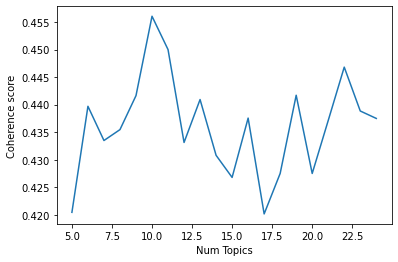

In [12]:
# Show graph
limit=25; start=5; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [13]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, 'Coherence: ', round(cv, 4))

Num Topics = 5 Coherence:  0.4204
Num Topics = 6 Coherence:  0.4397
Num Topics = 7 Coherence:  0.4335
Num Topics = 8 Coherence:  0.4355
Num Topics = 9 Coherence:  0.4416
Num Topics = 10 Coherence:  0.456
Num Topics = 11 Coherence:  0.45
Num Topics = 12 Coherence:  0.4331
Num Topics = 13 Coherence:  0.4409
Num Topics = 14 Coherence:  0.4308
Num Topics = 15 Coherence:  0.4268
Num Topics = 16 Coherence:  0.4376
Num Topics = 17 Coherence:  0.4202
Num Topics = 18 Coherence:  0.4275
Num Topics = 19 Coherence:  0.4417
Num Topics = 20 Coherence:  0.4275
Num Topics = 21 Coherence:  0.4371
Num Topics = 22 Coherence:  0.4468
Num Topics = 23 Coherence:  0.4388
Num Topics = 24 Coherence:  0.4375


In [14]:
# Coherence for 10-topic model
print(coherence_values[5])

# Topics for 10-topic model
malletModel_10 = model_list[5]
model_topics_10 = malletModel_10.show_topics(formatted=False)
pprint(sorted(malletModel_10.print_topics(num_words=10)))

# Convert results to lda model format for visualization.
MalletLDA10 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_10)

# Visualize the topics
pyLDAvis.enable_notebook()
vis10 = pyLDAvis.gensim.prepare(MalletLDA10, corpus, id2word, sort_topics=False)
vis10

0.45604484102630777
[(0,
  '0.035*"book" + 0.033*"work" + 0.032*"year" + 0.014*"difficulty" + '
  '0.014*"paper" + 0.013*"interest" + 0.013*"copy" + 0.011*"end" + '
  '0.010*"opinion" + 0.010*"term"'),
 (1,
  '0.070*"country" + 0.054*"land" + 0.040*"year" + 0.038*"acre" + 0.029*"farm" '
  '+ 0.022*"money" + 0.019*"pound" + 0.017*"wood" + 0.016*"wheat" + '
  '0.016*"price"'),
 (2,
  '0.045*"place" + 0.036*"dollar" + 0.031*"house" + 0.030*"day" + 0.029*"work" '
  '+ 0.023*"cent" + 0.020*"town" + 0.018*"board" + 0.017*"river" + '
  '0.016*"business"'),
 (3,
  '0.088*"letter" + 0.047*"friend" + 0.038*"time" + 0.031*"kind" + '
  '0.029*"family" + 0.023*"wife" + 0.022*"health" + 0.022*"child" + '
  '0.021*"winter" + 0.021*"month"'),
 (4,
  '0.040*"time" + 0.039*"man" + 0.032*"day" + 0.023*"room" + 0.020*"work" + '
  '0.016*"hospital" + 0.014*"place" + 0.013*"order" + 0.012*"patient" + '
  '0.012*"money"'),
 (5,
  '0.051*"school" + 0.017*"number" + 0.017*"door" + 0.015*"place" + '
  '0.012*"t

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.139383  0.060535       1        1   9.166219
1     -0.276701  0.197518       2        1  11.057818
2      0.161175 -0.012452       3        1  10.876877
3     -0.117383 -0.094871       4        1   8.932070
4      0.142613 -0.067175       5        1  10.855123
5     -0.049012 -0.173924       6        1  10.698400
6     -0.174039  0.004061       7        1  11.573472
7      0.229713  0.147930       8        1   7.406235
8      0.055611 -0.286761       9        1   9.795098
9      0.167408  0.225137      10        1   9.638687, topic_info=        Term        Freq       Total Category  logprob  loglift
103   letter  500.000000  500.000000  Default  30.0000  30.0000
406  country  590.000000  590.000000  Default  29.0000  29.0000
49       day  859.000000  859.000000  Default  28.0000  28.0000
192     week  420.000000  420.000000  Default  27.0000  27.0000
100     land  444.000000  444.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
745    money   64.490091  342.609120  Topic10  -4.5438   0.6693
130   person   51.803516  216.296025  Topic10  -4.7629   0.9102
28     child   62.375662  463.294379  Topic10  -4.5772   0.3342
192     week   47.574658  420.914158  Topic10  -4.8480   0.1593
256     foot   39.116941  146.811108  Topic10  -5.0438   1.0168

[782 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
0         5  0.949830          abide
2105      2  0.994797      abundance
1348      1  0.973139         access
201       9  0.983019       accident
3434      2  1.038049  accommodation
...     ...       ...            ...
199       7  0.222547           year
200       5  0.169062      yesterday
200       8  0.831222      yesterday
3750      2  1.038049           yoke
1867      9  0.983019          youth

[952 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [15]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [16]:
# To see word associated with id, use this code.
print(id2word)

Dictionary(8083 unique tokens: ['abide', 'accompany', 'act', 'agree', 'aim']...)


In [17]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        start=5, 
                                                        limit=25, 
                                                        step=1)

Mallet LDA: 5 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 4096
total tokens: 87399
<10> LL/token: -8.93517
<20> LL/token: -8.53995
<30> LL/token: -8.34283
<40> LL/token: -8.24855

0	10	country land year acre pay dollar farm money bring day place buy pound cent winter house month build sell price 
1	10	give day family place live kind leave grow receive fall year week house town time office raise begin friend return 
2	10	write send letter child feel hear time friend week book heart boy day night read wife life girl trouble expect 
3	10	work people world state man city money find government bring law mind ship house year employment board body purchase dollar 
4	10	give school room time man place visit speak call order receive reach meet rest remain hand return face number work 

<50> LL/token: -8.19773
<60> LL/token: -8.15842
<70> LL/token: -8.14989
<80> LL/token: -8.13885
<90> LL/token: -8.12147

0	10	country land year dollar pay acre place farm sell winter money buy p

<570> LL/token: -8.06742
<580> LL/token: -8.06716
<590> LL/token: -8.06471

0	10	country land year dollar acre farm pay money place bring buy pound sell cent live wood price work wheat grow 
1	10	day week time give child family leave hear town return find month remain night change morning expect house bed make 
2	10	write send letter feel friend hear kind give receive book heart wife child year trouble pay husband life time fear 
3	10	people work man world find state city year government person house call ship law office mind place business company employment 
4	10	school give room place work man time visit speak order call reach bring day number meet door hospital face life 

<600> LL/token: -8.0682
<610> LL/token: -8.06707
<620> LL/token: -8.06934
<630> LL/token: -8.06512
<640> LL/token: -8.07293

0	10	country land year dollar acre farm pay bring place work money buy pound sell water cent wood live price winter 
1	10	day week give time child hear family leave month find boy return ni

<110> LL/token: -8.1561
<120> LL/token: -8.14911
<130> LL/token: -8.13757
<140> LL/token: -8.13441

0	8.33333	school give place man room time day reach call speak bring order visit hospital door hour follow start wait gentleman 
1	8.33333	send letter give write time friend hear work receive girl day wife expect month call hand return visit die change 
2	8.33333	country place dollar land farm money person town water pay time cent business month board wood people price state river 
3	8.33333	child week feel book boy night write day life fear bed morning stay evening trouble hear kind spirit make weather 
4	8.33333	work people year man house day city find world build law government give ship mind body hand power woman hold 
5	8.33333	year bring land day acre sell pay family country buy pound live health summer house winter account kind find spring 

<150> LL/token: -8.12365
<160> LL/token: -8.12649
<170> LL/token: -8.12076
<180> LL/token: -8.11425
<190> LL/token: -8.10731

0	8.33333	schoo

<610> LL/token: -8.1113
<620> LL/token: -8.10513
<630> LL/token: -8.10601
<640> LL/token: -8.1073

0	8.33333	school give time place man work room speak day visit order call bring door hospital begin reach number wait turn 
1	8.33333	send write letter time give friend feel hear receive heart wife expect girl death life husband read hope kind pay 
2	8.33333	place dollar country land water work town day person house cent time wood board river find business arrive boat purchase 
3	8.33333	child day week feel boy night hear book bed morning fear trouble return stay evening house visit enjoy weather room 
4	8.33333	people work year man world city find law government mind life state give ship office company body hold call power 
5	8.33333	year country land acre bring winter sell month buy pay money farm summer pound family live give kind spring fall 

<650> LL/token: -8.10951
<660> LL/token: -8.11006
<670> LL/token: -8.10444
<680> LL/token: -8.10641
<690> LL/token: -8.10416

0	8.33333	school 

<60> LL/token: -8.24871
<70> LL/token: -8.23251
<80> LL/token: -8.21066
<90> LL/token: -8.19494

0	7.14286	people place day work find state city house government office employment company set cost learn village ship journey class suppose 
1	7.14286	hear friend send feel write receive book remain heart read fear time expect visit death husband hope morning daughter meet 
2	7.14286	letter child week write send day give kind feel girl health stay night winter evening time weather baby hear wife 
3	7.14286	work time family year money call give woman number pay child hand law live man town head people answer attend 
4	7.14286	country land dollar year acre farm pay sell pound buy money cent wood price wheat grow boat person purchase farmer 
5	7.14286	school give place room speak reach church door order build hand man girl visit begin table return gentleman train face 
6	7.14286	day bring work water man case time life foot room hospital walk doctor carry bed eat mind follow patient night 

<1

<480> LL/token: -8.12845
<490> LL/token: -8.14053

0	7.14286	people work world place state city find business day house person man dollar employment body board law office side obtain 
1	7.14286	write friend send feel book heart read life receive hear paper hand husband death die daughter kind copy care suffer 
2	7.14286	letter child week hear day give send time write feel return girl expect evening health stay weather baby find hope 
3	7.14286	work year time give call pay family money town people man live month interest child meet company case find mine 
4	7.14286	country land acre year dollar farm place buy pound sell money wood pay winter price wheat house cent summer family 
5	7.14286	school place room visit give man time speak order day reach hospital wait follow train build patient return gentleman teacher 
6	7.14286	day bring hour morning water night walk week foot remain give head bed time leave doctor room rest save eat 

<500> LL/token: -8.13462
<510> LL/token: -8.12791
<520> 

<910> LL/token: -8.13265
<920> LL/token: -8.13578
<930> LL/token: -8.13229
<940> LL/token: -8.13213

0	7.14286	people work state city place house world give dollar day board office body government employment law find power town obtain 
1	7.14286	write friend letter send feel book heart life give read hear wife husband paper kind hand daughter death receive die 
2	7.14286	week day child hear letter send feel return time give girl expect visit stay evening account weather thing fear baby 
3	7.14286	work time year family money pay call find month man people interest live meet company turn town remember mine bring 
4	7.14286	country land year acre dollar farm place buy pound sell cent pay wood summer winter price wheat money purchase kind 
5	7.14286	school give place man room speak order day visit hospital time number door follow mind train wait reach build remain 
6	7.14286	day bring water bed side room night head hour house child boat foot tea time boy set river clock save 

<950> LL/tok

<310> LL/token: -8.14148
<320> LL/token: -8.14592
<330> LL/token: -8.14859
<340> LL/token: -8.15874

0	6.25	country land dollar year acre farm pound sell place house price money wheat buy wood pay family purchase farmer produce 
1	6.25	day child week visit return feel night morning time walk boy room house town hear church stay evening bed spend 
2	6.25	give place time school speak room order turn man reach hospital hand door follow wait mind train receive patient build 
3	6.25	write letter feel send book friend heart give life paper read time husband girl pay death child hand daughter copy 
4	6.25	city world place business person find people work give employment ship house body idea power life air mind obtain require 
5	6.25	hear send letter give friend expect week kind year health winter write find month leave thing summer live receive weather 
6	6.25	day work bring time water board pay month money foot river arrive boat man find side girl person captain head 
7	6.25	year people scho

<710> LL/token: -8.15408
<720> LL/token: -8.15529
<730> LL/token: -8.15475
<740> LL/token: -8.15823

0	6.25	country land dollar acre year farm pound place sell pay money house wood price wheat farmer purchase person produce crop 
1	6.25	day child week night morning boy return feel hear visit room house stay evening walk town baby remain bed fear 
2	6.25	give place time man work room school speak order hospital build turn visit train show patient number door wait reach 
3	6.25	write feel book letter friend heart give send life girl husband read pay receive hand death daughter copy paper work 
4	6.25	work world people city place give business house life mind employment find body power money idea air man hand ship 
5	6.25	send letter hear time give year find winter leave friend week expect write health family month live account hope weather 
6	6.25	day bring work water time month board arrive foot boat river pay buy eat set call store cent hour lie 
7	6.25	school people year man governmen

<80> LL/token: -8.27807
<90> LL/token: -8.26139

0	5.55556	year dollar acre land country pay house board grow family summer wheat place produce find fall crop cost obtain expense 
1	5.55556	place man number build follow town turn travel time house carry give hand train question pass interest order open answer 
2	5.55556	work give time man bring family call money case leave return pay care hospital room receive hand attend office month 
3	5.55556	world child day evening bed life body night bear law power require mind matter air hand baby set girl boy 
4	5.55556	school visit meet read change hear time begin continue speak room remain teacher girl eye reach prepare mind give face 
5	5.55556	week hear child letter send day time write winter feel bring return account expect spirit weather stay thing kind morning 
6	5.55556	write send friend letter feel book receive year give heart trouble life husband live leave death paper hope copy health 
7	5.55556	day place walk call give foot church si

<410> LL/token: -8.19279
<420> LL/token: -8.19086
<430> LL/token: -8.1976
<440> LL/token: -8.19784

0	5.55556	land dollar year country acre pay pound summer wood place sell wheat family winter month money bring produce house crop 
1	5.55556	school man place give speak return order number hand hospital follow attend train build understand patient answer judge notice travel 
2	5.55556	work time give family year bring man money receive pay call remain month care people send find case town show 
3	5.55556	world day ship life board body set air power child hand pass food grow employ sea drink clothe mind require 
4	5.55556	time visit room hear change meet mind eye school read begin teach interest call teacher hold prepare service girl table 
5	5.55556	week child hear day feel return expect night send stay evening time boy thing weather baby find letter today winter 
6	5.55556	write letter send friend feel book give kind life heart health paper receive wife copy promise death husband leave h

<760> LL/token: -8.18606
<770> LL/token: -8.18988
<780> LL/token: -8.19517
<790> LL/token: -8.19165

0	5.55556	country land year acre dollar farm pay pound buy price sell wheat money summer live winter produce house wood crop 
1	5.55556	school give man speak place order room hospital follow build number train door understand patient teacher begin attend answer turn 
2	5.55556	work time family money month day man call year find give bring care remain town friend pay case remember people 
3	5.55556	board work ship life world body child give mind require air pass character set food captain matter drink grow sea 
4	5.55556	time visit receive life hear hand mind interest meet thing eye change face die service feel hold room continue reach 
5	5.55556	week child hear feel day return evening stay time night weather house send baby boy letter spend account make winter 
6	5.55556	write letter send friend give book feel kind year heart health paper girl hear wife copy husband receive read life 
7

<110> LL/token: -8.23226
<120> LL/token: -8.22319
<130> LL/token: -8.22018
<140> LL/token: -8.22224

0	5	time give place receive family send hear bring day visit friend remain call answer leave thing die eye money word 
1	5	week child day feel return morning night evening stay account boy weather hear spend make baby today walk leave island 
2	5	house bring day water place find cent board pay town river boat horse office person side road arrive work travel 
3	5	world business people ship person work body country year air grow food vessel drink sea clothe month mind company part 
4	5	work time day call man stand head foot remain mine hour bed turn give town intend case month meet find 
5	5	country land year dollar acre farm sell pound summer winter money pay wood wheat live buy settle crop produce month 
6	5	school room man give hospital begin speak order reach door train follow understand wait teacher number attend remark companion turn 
7	5	life year hand give woman care live husband 

<440> LL/token: -8.18983

0	5	time give hear place family send receive friend remain day bring leave answer find visit thing die expect remember meet 
1	5	week child return day morning stay evening boy town night baby feel spend weather room house walk hear today island 
2	5	place bring board water dollar cent day find pay river boat give buy house work employment business set arrive city 
3	5	work world ship find mind body money leave country person air people obtain business require food drink sea clothe idea 
4	5	work time day call stand head man foot start month side mine change horse fall bed meet woman company fire 
5	5	country land year acre farm pound dollar winter wood price summer sell wheat pay money farmer produce crop live spring 
6	5	school man give room hospital order speak place reach follow door train continue begin patient teacher wait turn understand build 
7	5	life year hand feel heart care husband give lose child live friend suffer boy end read trouble meet eye enj

<760> LL/token: -8.1998
<770> LL/token: -8.19973
<780> LL/token: -8.19986
<790> LL/token: -8.18466

0	5	time hear family place give receive remain day find leave send expect thing call die bring account visit friend mention 
1	5	week child day morning return feel stay evening night boy baby house spend church walk town today yesterday make island 
2	5	place bring board dollar cent water day find river boat house work city employment set business arrive deal cost advise 
3	5	work world give ship body pass person business air require mind food drink boy field money character part sea grow 
4	5	work day time call man stand meet fall head foot carry money start bed mine horse side month turn change 
5	5	country land year acre farm dollar pound pay winter wood price wheat money live summer sell buy produce crop tree 
6	5	school give room place hospital man speak order door reach visit train follow patient build teacher begin number turn remark 
7	5	life feel child year hand husband heart fr

<60> LL/token: -8.33159
<70> LL/token: -8.31274
<80> LL/token: -8.29528
<90> LL/token: -8.27601

0	4.54545	room speak meet eye call hand door case face hospital rest begin question doctor life fear hour stand girl thing 
1	4.54545	school man law government year number people interest build teacher mind stage hand money horse gentleman woman offer form population 
2	4.54545	day child visit hear return morning feel week night receive give evening stay walk fear leave train time yesterday lose 
3	4.54545	place house day town give person city family business side office find road remain church attend learn people village inhabitant 
4	4.54545	country land year acre farm dollar money pound sell price wood wheat buy farmer cent produce wage pay crop family 
5	4.54545	bring winter week summer day hear spring kind fall account cut tea store friend leave suppose weather foot vessel snow 
6	4.54545	people dollar make child state find set labour obtain board bushel arrive pork difficulty pay time

<360> LL/token: -8.20801
<370> LL/token: -8.2176
<380> LL/token: -8.2158
<390> LL/token: -8.21409

0	4.54545	give room speak hand life eye stand door receive hour case head doctor woman face call rest die remain hold 
1	4.54545	school law call number interest teach teacher gentleman year hand stage money mind meeting build make government member prevent war 
2	4.54545	child hear week day feel return night morning visit boy evening fear stay spirit walk time baby expect leave today 
3	4.54545	place day house town find give road city person return side travel learn family hour village inhabitant walk offer build 
4	4.54545	land country acre dollar farm year sell pound cent wood price wheat money family pay produce crop buy bushel farmer 
5	4.54545	bring winter day week kind hear cut store tea arrive buy send pork island snow account friend commence make spring 
6	4.54545	people year country man state dollar pay obtain difficulty property board climate government idea world capital party 

<660> LL/token: -8.19869
<670> LL/token: -8.19998
<680> LL/token: -8.20131
<690> LL/token: -8.20127

0	4.54545	give room speak life receive hour door rest mind remain face eye train stand die meet woman case change head 
1	4.54545	school number call gentleman build church year interest teach teacher judge stage meeting give member territory lady end pass condition 
2	4.54545	child week feel day boy hear return night evening morning visit stay spirit fear baby weather bed trouble girl leave 
3	4.54545	place house day town give board find travel city road return dollar family water fall river journey village inhabitant people 
4	4.54545	land country acre farm dollar year pound sell pay money price family wood wheat produce tree crop cent cost farmer 
5	4.54545	bring cut buy month tea store arrive week thing kind day pork spring island make commence snow vessel provision water 
6	4.54545	people year country state government man time person pay law obtain office property idea situation for

<960> LL/token: -8.21247
<970> LL/token: -8.20483
<980> LL/token: -8.21448
<990> LL/token: -8.21893

0	4.54545	give room hand speak receive stand life door call mind face hour head rest doctor woman eye train read order 
1	4.54545	school number attend church call gentleman teach interest teacher meet build service house stage end pass meeting pupil open member 
2	4.54545	child week day feel return boy morning fear night evening visit hear stay baby spend time today girl change bed 
3	4.54545	place day town house give work find city river board road water people travel cent village time journey boat hour 
4	4.54545	country land acre dollar farm year pound money sell family price wheat pay wood produce crop live farmer tree person 
5	4.54545	bring buy cut tea store water spring pork thing week servant commence provision engage arrive vessel month account cure sail 
6	4.54545	people year state government country law man obtain pay property form difficulty party idea possess case office mi

<210> LL/token: -8.25763
<220> LL/token: -8.2617
<230> LL/token: -8.25578
<240> LL/token: -8.25299

0	4.16667	give day family call change fear time hand woman live head expect fall hear friend meet word eye find rest 
1	4.16667	year interest people school bring law government mind town paper judge hold time month life gentleman hand possess power war 
2	4.16667	work day place find cent dollar give house board business boat time city town wage employment village return employ side 
3	4.16667	place time visit give remain receive answer hour feel return service wait mind church hear reach person sight mention leave 
4	4.16667	week day child morning room bring evening stay night house walk bed return today boy clock sit yesterday foot dinner 
5	4.16667	year acre dollar country pay winter money buy summer land live wheat month pound spring produce crop tree kind cost 
6	4.16667	country land farm bring wood price water farmer settle purchase sell place bushel river family house pork lot clea

<460> LL/token: -8.23893
<470> LL/token: -8.24233
<480> LL/token: -8.23918
<490> LL/token: -8.24645

0	4.16667	give day call hand family time change find live head side rest fear stand woman expect word eye remain pleasure 
1	4.16667	year school interest law people government town man judge prevent mind make office hand matter call war power teach gentleman 
2	4.16667	work place day dollar cent house find city town board boat business employment wage give village time inhabitant employ week 
3	4.16667	time place visit day bring receive feel remain hear hour answer meet give attend die friend wait service return show 
4	4.16667	week day child morning return stay evening boy night walk bed house church today room clock fear yesterday store dinner 
5	4.16667	year country winter dollar pay acre money family summer buy land wheat live pound foot crop spring month kind house 
6	4.16667	land farm country bring wood acre price farmer settle water sell arrive fall bushel half road river clear c

<710> LL/token: -8.25336
<720> LL/token: -8.2491
<730> LL/token: -8.24811
<740> LL/token: -8.25321

0	4.16667	give hand family change time rest eye call expect woman head fear stand side meet fall find word trouble live 
1	4.16667	year man call school law interest government people house town end power judge war hand opinion teach prevent matter governor 
2	4.16667	work day dollar place find cent give house town board business month employment wage city boat week office inhabitant time 
3	4.16667	time place day visit leave hear meet receive show remain bring hour attend answer mind give month sight friend meeting 
4	4.16667	week day child morning stay evening return make boy store walk today house night church yesterday island spirit visit town 
5	4.16667	year country acre winter dollar summer money pay spring pound wheat live family land buy tree crop month kind house 
6	4.16667	land farm country wood price bring water acre purchase farmer road place arrive bushel half situation time 

<960> LL/token: -8.25126
<970> LL/token: -8.25421
<980> LL/token: -8.25918
<990> LL/token: -8.26011

0	4.16667	give family room hand time fear change woman rest stand call eye life head meet table read doctor face live 
1	4.16667	school year man call people government interest law house end mind money company number teach judge gentleman prevent war meet 
2	4.16667	day work place dollar cent house give business town find boat board city time inhabitant employment office wage carry journey 
3	4.16667	time place visit day remain bring hear receive give show answer leave feel send attend hour pass meet return mind 
4	4.16667	week child day morning evening return stay town boy make walk today store yesterday island night church house settle account 
5	4.16667	year country dollar winter acre pay summer money buy family month wheat spring live crop tree land kind health produce 
6	4.16667	land farm bring wood country price acre water purchase sell pound horse farmer road clear lot half provi

<210> LL/token: -8.24445
<220> LL/token: -8.24518
<230> LL/token: -8.23937
<240> LL/token: -8.24266

0	3.84615	work place city business house find world give people body money employment village trade inhabitant require return employ class grow 
1	3.84615	school room visit speak hospital reach build train patient number teacher wait door question gentleman companion stage remark pupil territory 
2	3.84615	day bring water month ship river time thing vessel eat side pass climate sea provision wage call lie town board 
3	3.84615	child life meet mind room hand change boy read bed head eye table study move night face side sleep wear 
4	3.84615	year send winter hear family summer live letter friend health spring kind fall buy money expect pork make snow grow 
5	3.84615	feel book heart write friend work copy life woman publish matter lose draw care forget world picture loss story sell 
6	3.84615	people year law government state man paper form mind end duty office company party power woman num

<460> LL/token: -8.25075
<470> LL/token: -8.26122
<480> LL/token: -8.25232
<490> LL/token: -8.25894

0	3.84615	work place city house day world people dollar business employment wage town give find village inhabitant man employ money board 
1	3.84615	school room visit speak hospital give train patient number build teacher begin wait gentleman door follow companion stage reach remark 
2	3.84615	bring water day river ship board hour call captain thing side vessel lie boat sea pass cross tea provision passenger 
3	3.84615	hand life mind child head night boy change room stand eye air heart meet body study table move bed drink 
4	3.84615	year send winter letter live hear health summer kind write family expect spring month week friend house grow suppose leave 
5	3.84615	book write work feel friend husband life heart read copy paper bring woman publish draw end receive world picture loss 
6	3.84615	people year government law state man company call office power debt judge form end party populat

<710> LL/token: -8.25662
<720> LL/token: -8.25894
<730> LL/token: -8.26221
<740> LL/token: -8.25478

0	3.84615	work place dollar day business find house give town employment cent wage city board village office employ money inhabitant world 
1	3.84615	school room give visit hospital speak number train bring question patient door reach teacher wait begin follow remark pass condition 
2	3.84615	bring water ship day captain month board vessel boat thing river pass buy arrive sea provision store foot call tea 
3	3.84615	life mind hand heart eye room boy head friend body meet air night study move woman child world drink character 
4	3.84615	letter send hear health year live winter family friend write summer expect month give hope week suppose kind snow account 
5	3.84615	book write work feel year pay life friend read copy paper husband heart end bring lose publish sell term trial 
6	3.84615	people year man government state law call form company matter duty power choose thousand city land liv

<960> LL/token: -8.26451
<970> LL/token: -8.26061
<980> LL/token: -8.27117
<990> LL/token: -8.2677

0	3.84615	place work day dollar house business cent employment wage city give find board town village inhabitant employ office advice advise 
1	3.84615	school give room speak visit hospital door train patient number teacher question begin wait remark companion gentleman sight receive attend 
2	3.84615	bring water month ship river captain vessel set boat sea tea buy thing arrive eat passenger cost provision lie day 
3	3.84615	life hand work world mind body give boy air heart study night move head change child bed drink matter hold 
4	3.84615	letter send hear year friend winter write health summer give family leave week kind live spring suppose snow receive month 
5	3.84615	book write work feel husband year heart copy friend life pay end send paper publish receive sell letter draw loss 
6	3.84615	people year man government state law company labour call party form city power thousand bank p

<210> LL/token: -8.2654
<220> LL/token: -8.2599
<230> LL/token: -8.25578
<240> LL/token: -8.25622

0	3.57143	work give ship body water air world food river require find sea eat drink bed blood call passenger boy man 
1	3.57143	people life year child hand world mind matter live power woman time remember bear bring possess hold age wear party 
2	3.57143	work pay year month money wood call family business company sell grow expense climate difficulty raise land increase amount road 
3	3.57143	country land acre farm year dollar price pound wheat winter farmer summer produce crop bushel settle market purchase clear buy 
4	3.57143	place day house dollar town city boat person people cent employment country board village employ class advice inhabitant journey steam 
5	3.57143	write letter send friend feel kind heart hear health husband death give girl copy wife paper flower promise forget love 
6	3.57143	work man speak hour bring call hospital follow order reach life begin patient eye continue 

<460> LL/token: -8.27078
<470> LL/token: -8.27668
<480> LL/token: -8.27585
<490> LL/token: -8.27672

0	3.57143	work ship body man give air food water drink boy require world life day blood money pass part passenger character 
1	3.57143	people hand year mind world life time child idea matter live meet woman bring move power possess friend suffer party 
2	3.57143	pay work year purchase month expense family call company money difficulty obtain rise amount business neighbourhood advantage improve choose debt 
3	3.57143	country land acre year farm winter dollar wheat summer pound price produce crop wood sell buy bushel farmer market money 
4	3.57143	dollar place house country day city town cent person find employment state board wage village boat inhabitant business side river 
5	3.57143	letter send write friend give kind feel girl hear health paper heart wife husband death flower daughter bless love forget 
6	3.57143	work place day man follow hand order call reach hospital patient bring ti

<710> LL/token: -8.27408
<720> LL/token: -8.26644
<730> LL/token: -8.26479
<740> LL/token: -8.27143

0	3.57143	work ship body head air world pass give food call money man drink day mind blood require boy find character 
1	3.57143	people life hand year mind idea night matter child bring world woman move live time power age party possess duty 
2	3.57143	pay year country call purchase month expense company respect difficulty rise obtain business capital emigrant neighbourhood increase quarter debt proceed 
3	3.57143	country land acre farm year dollar pound winter summer money wheat wood farmer produce crop price bushel sell market buy 
4	3.57143	place work dollar day house cent give city board wage town employment boat village family business person employ find river 
5	3.57143	send write letter give feel friend girl kind heart husband paper hear death wife health return flower child love bless 
6	3.57143	work place man day time order bring hand build turn show patient door call hospital 

<960> LL/token: -8.27228
<970> LL/token: -8.27727
<980> LL/token: -8.28881
<990> LL/token: -8.29155

0	3.57143	work ship body air give money man food drink head pass grow passenger world require water call blood sea day 
1	3.57143	hand time life year people mind meet world idea age matter live bring hold move kind woman person power thing 
2	3.57143	pay country month call year purchase expense difficulty obtain rise situation company emigrant advantage proceed arrive improve present capital increase 
3	3.57143	country land acre farm year dollar pound wheat wood summer money sell winter buy crop produce farmer price bushel live 
4	3.57143	place work dollar day house cent give city employment business find board river town boat village wage inhabitant employ travel 
5	3.57143	letter send write feel give hear girl friend heart kind death child flower bless health husband love wife die visit 
6	3.57143	man work time place door day order build stand turn face bring stage patient travel carr

<160> LL/token: -8.30308
<170> LL/token: -8.29824
<180> LL/token: -8.29772
<190> LL/token: -8.28979

0	3.33333	fear return show remain meet give place train hear leave water hour day fall sight travel rest station arrive morning 
1	3.33333	friend send letter write hear give feel heart husband wife time kind daughter live die girl life family hand child 
2	3.33333	land country dollar farm acre cent place pay wood price purchase farmer produce house money pound trade clear mill village 
3	3.33333	place city day law house state find class inhabitant world give form hand employ person street church table return population 
4	3.33333	school room visit number hospital speak door question teacher hand build answer receive begin condition remark companion understand stage teach 
5	3.33333	write send letter book work paper read copy pay promise feel receive publish health flower sell call news writing kindness 
6	3.33333	week child feel visit evening morning stay day hear return baby today chur

<360> LL/token: -8.27621
<370> LL/token: -8.28417
<380> LL/token: -8.27963
<390> LL/token: -8.27961

0	3.33333	time remain fear reach show hour train return continue call fall rest reason give fact life travel station meet sight 
1	3.33333	letter friend write send hear give feel child heart husband kind family wife death die hand daughter bless love receive 
2	3.33333	land country dollar acre farm cent wood price pay purchase place farmer produce pound person trade cost money house half 
3	3.33333	place city house state find day village inhabitant person hand world church form street return travel time population class sort 
4	3.33333	school visit room hospital door number understand teacher build remark companion bring question begin receive hand teach pupil mind answer 
5	3.33333	write work book send paper feel read copy promise pay health letter flower life publish sell writing nature leave mail 
6	3.33333	child week return morning stay evening feel walk baby today town visit island

<560> LL/token: -8.26761
<570> LL/token: -8.27125
<580> LL/token: -8.27702
<590> LL/token: -8.26751

0	3.33333	time give hour reach fear rest leave remain follow train continue call wait return station speak hear save life travel 
1	3.33333	friend letter send hear feel write child heart give husband wife kind family daughter death forget flower place die bless 
2	3.33333	land country dollar farm acre place pay wood price cent purchase farmer produce money half clear mill trade pound town 
3	3.33333	place city house find state person village world inhabitant hand form employ travel time property return population advice labour street 
4	3.33333	school room visit hospital door bring number question patient teacher man begin understand hand attend speak companion receive remark case 
5	3.33333	write work book send read copy paper letter pay life health feel promise sell publish receive writing mail fear pen 
6	3.33333	child week morning evening stay day return boy town church today visit 

<760> LL/token: -8.26635
<770> LL/token: -8.27373
<780> LL/token: -8.27424
<790> LL/token: -8.27291

0	3.33333	give time reach hour train life follow continue walk door remain head return leave sight rest station fear die step 
1	3.33333	friend send letter write hear child give feel kind wife husband heart death daughter flower die bless girl bring love 
2	3.33333	country land dollar farm pay acre place price town wood purchase farmer produce pound house expense person cost money trade 
3	3.33333	place city find house state day world office village inhabitant travel form class employ property hand population person time church 
4	3.33333	school room hospital visit number patient teacher bring question time condition remark give answer companion receive case speak attend pupil 
5	3.33333	book write work paper pay letter copy send publish life sell fear read term success trial enjoy interest heart college 
6	3.33333	child week day morning evening boy today town stay fear yesterday church

<960> LL/token: -8.26688
<970> LL/token: -8.2673
<980> LL/token: -8.26868
<990> LL/token: -8.27596

0	3.33333	give hour door time reach continue rest follow remain train fear room return walk meet companion life travel station sight 
1	3.33333	friend send letter write give child feel heart wife husband kind hear daughter death flower family bring love bless visit 
2	3.33333	country land dollar farm pay town money farmer purchase person wood produce acre price settle work pound situation place half 
3	3.33333	place house city people find day office village inhabitant form employ state time class employment hand return person support property 
4	3.33333	school visit hospital give room patient time teacher speak bring family number question receive attend remark case understand condition answer 
5	3.33333	book work write year pay send paper copy life live publish read sell trial health debt success fear interest pen 
6	3.33333	child week day morning evening stay town boy make today island

<160> LL/token: -8.34078
<170> LL/token: -8.33925
<180> LL/token: -8.3403
<190> LL/token: -8.32682

0	3.125	give work hand man bring family year life eye order money save reason mind change speak study throw sit case 
1	3.125	send letter year write family hear kind friend give health live winter month receive paper summer hope leave wife find 
2	3.125	room hour give girl door call train time walk face table house remain open woman turn child attend station hold 
3	3.125	land country acre farm year price wheat pound produce crop bushel tree market farmer clear settle potato purchase seed buy 
4	3.125	time place call town road week leave remain walk mine wood intend distance cross river account horse letter gold drive 
5	3.125	meet life friend heart case husband interest read enjoy care woman return possess service story end term gentleman mind stand 
6	3.125	place city day water find board boat employment person work business town house village inhabitant give employ state flour advise 

<360> LL/token: -8.311
<370> LL/token: -8.31133
<380> LL/token: -8.31278
<390> LL/token: -8.31676

0	3.125	work man give family time bring hand life eye carry money stand head mind room face call reason speak save 
1	3.125	send letter hear write give friend year winter month family live health summer expect kind receive suppose snow find remember 
2	3.125	room door meet hour time table walk girl train call house turn doctor case attend station rest realize woman read 
3	3.125	land country acre farm year wheat pound sell crop wood produce person farmer price bushel market tree clear mill horse 
4	3.125	day time place leave call mine remain road town walk intend cross prospect spend rest find account gold river weather 
5	3.125	friend life year husband heart enjoy meet care receive woman sell interest possess end term matter return mind story fill 
6	3.125	place house day business city find town give employment village person inhabitant boat side water river travel people flour situation

<560> LL/token: -8.30083
<570> LL/token: -8.30668
<580> LL/token: -8.29998
<590> LL/token: -8.29879

0	3.125	work man give time life family bring remain hand money order mind eye carry person save return year stand foot 
1	3.125	send letter hear friend write give year winter family kind health live receive hope summer suppose snow spring fall month 
2	3.125	room door give hour time house girl train call table woman doctor face case turn stage walk station sit reach 
3	3.125	land country acre year farm pound wheat price farmer produce crop wood sell bushel summer market buy clear grow tree 
4	3.125	time place day call expect find road month mine remain rest intend cross distance prospect spend leave walk letter account 
5	3.125	life friend year husband hand heart meet interest enjoy world wear end matter bring live care bear fill manner sorrow 
6	3.125	place house day city business find town work employment village inhabitant boat employ travel give steam advise river dollar street 
7	3

<760> LL/token: -8.30359
<770> LL/token: -8.30637
<780> LL/token: -8.30809
<790> LL/token: -8.3019

0	3.125	work man give time family life money order bring remain hand save people carry stand year person offer room show 
1	3.125	send letter hear year write winter give health friend family live summer month hope leave house fall receive suppose snow 
2	3.125	room day hour door call table case walk train time doctor girl face house rest sit station eye soul stand 
3	3.125	land country acre year farm pound wheat crop produce wood sell bushel grow price tree market clear buy farmer seed 
4	3.125	time day place find call expect month road letter mine remain distance intend lie prospect gold company turn finish make 
5	3.125	friend life year husband hand change enjoy interest care bring live heart matter term end world wear trial loss possess 
6	3.125	place day town city work house find water give employment business boat river employ dollar inhabitant village hour pass girl 
7	3.125	letter

<960> LL/token: -8.30004
<970> LL/token: -8.29566
<980> LL/token: -8.30206
<990> LL/token: -8.30063

0	3.125	work give man family time money order carry hand life bring save return remain offer turn year stand room speak 
1	3.125	send hear letter winter year friend family give write health summer month receive wife snow kind live time fall suppose 
2	3.125	room door time give table hour girl train woman face doctor house rest stand call day stage sit station reach 
3	3.125	land country acre farm year pound wheat sell buy wood crop produce farmer tree bushel money market clear grow horse 
4	3.125	time day place call month find people expect week mine road leave head prospect company intend foot gold remain finish 
5	3.125	life friend year hand husband heart change end bring trouble enjoy wear live meet receive manner care loss trial suffer 
6	3.125	place house day find business city town give river work village inhabitant boat water employ office hour employment advise travel 
7	3.125	l

<160> LL/token: -8.34696
<170> LL/token: -8.34618
<180> LL/token: -8.34426
<190> LL/token: -8.33717

0	2.94118	child feel week girl send return baby letter bed kind flower trouble day fear spirit love hope daughter hear thing 
1	2.94118	country acre year farm land pound dollar wheat money winter live crop buy summer bushel family market sell farmer clear 
2	2.94118	give hear expect time place remain stay church week winter town spend month snow evening dinner call intend show prospect 
3	2.94118	write letter send friend book give husband health heart copy paper life read wife publish news sell kind death work 
4	2.94118	place dollar day house city work town find office business village employ inhabitant employment advise flour advice return land side 
5	2.94118	people country state year government law labour form population emigrant opinion property idea party person duty district farm land capital 
6	2.94118	life work child world body matter air woman mind food boy man drink meet hear

<360> LL/token: -8.34175
<370> LL/token: -8.3407
<380> LL/token: -8.33683
<390> LL/token: -8.33564

0	2.94118	child feel send day girl hear baby kind letter write trouble flower love time bless fear night daughter news weather 
1	2.94118	country acre year land farm dollar money wheat pound sell crop live produce bushel farmer market buy kind clear price 
2	2.94118	week letter hear give day expect evening return stay town place write spend church snow store time call today wife 
3	2.94118	write letter friend book send heart life husband copy year paper give receive death publish read work sell kind health 
4	2.94118	day place dollar work house city find give town business employment village office employ inhabitant wage travel pass river street 
5	2.94118	people country state year government law person man form property population attend land labour farm obtain lead press party trade 
6	2.94118	work life world body mind air child food drink power boy woman care man money case blood pass

<560> LL/token: -8.3332
<570> LL/token: -8.32903
<580> LL/token: -8.33561
<590> LL/token: -8.33928

0	2.94118	child feel letter send write give kind girl hear baby day bear flower bless love trouble thing news fear death 
1	2.94118	country acre year land farm dollar wheat pound money crop buy sell farmer produce bushel price live market clear kind 
2	2.94118	hear letter week day time give expect write place receive return town church spend stay wife evening friend snow month 
3	2.94118	write book life letter heart friend send copy husband read paper work receive year publish sell trial nature world picture 
4	2.94118	dollar place day work house city employment business town village give find wage employ board inhabitant steam travel rate hand 
5	2.94118	people country state government law person year man form property labour idea population farm attend opinion judge mechanic amount power 
6	2.94118	work life body mind air world food man child drink require pass ship blood boy grow day 

<760> LL/token: -8.33043
<770> LL/token: -8.33004
<780> LL/token: -8.33283
<790> LL/token: -8.32466

0	2.94118	feel letter give send write child day baby kind hear girl flower bless love death fear suffer night weather news 
1	2.94118	acre country year land farm dollar pound wheat money live crop produce sell buy bushel market farmer grow clear horse 
2	2.94118	day hear letter time write expect week give return receive place thing town month wife spend church snow stay friend 
3	2.94118	book write life letter paper work copy husband send heart read friend publish year sell nature trial receive kind sorrow 
4	2.94118	dollar place work house day city town employment cent find give business village employ inhabitant hand steam board return girl 
5	2.94118	people year state government law man country form property duty make population world idea character land labour attend person power 
6	2.94118	work body life air world give drink ship boy day power food blood require heart mind study ma

<960> LL/token: -8.32685
<970> LL/token: -8.32338
<980> LL/token: -8.32754
<990> LL/token: -8.32919

0	2.94118	feel write letter send hear girl give day child death baby flower heart kind love bless news night die suffer 
1	2.94118	country land acre farm year dollar pound wheat sell crop money produce buy bushel farmer horse market grow live clear 
2	2.94118	letter time hear day give write place expect week friend receive return month spend snow make thing pleasure mention church 
3	2.94118	write book work send life receive copy paper read letter publish kind friend sell draw year trial nature end heart 
4	2.94118	place dollar day work house city town cent give employment business find village inhabitant wage employ rate steam hand flour 
5	2.94118	people year state government law labour man form duty party attend property idea power expense mind woman country population enter 
6	2.94118	life work world body man air drink food boy pass ship blood study mind meet money case character ni

<160> LL/token: -8.36104
<170> LL/token: -8.3503
<180> LL/token: -8.347
<190> LL/token: -8.33431

0	2.77778	land country acre year farm pound price wheat produce farmer crop wood bushel purchase market money clear family settle mill 
1	2.77778	letter write send hear kind feel girl time heart daughter forget death love return weather promise give die news thing 
2	2.77778	bring month buy live tree sell foot cost kind boat pay horse cut winter summer spring raise sail provision clothe 
3	2.77778	week child day bed night boy stay baby today morning yesterday room feel walk spend trouble sleep window tomorrow hope 
4	2.77778	feel winter spirit account week receive mail make enjoy commence summer suppose prospect island doubt anxiety time store settle intend 
5	2.77778	friend give wife life child live husband bear woman sell flower pay suffer family loss sorrow fortune end bless enjoy 
6	2.77778	year expect hear day time remain month pay bring man trouble care town company join house side d

<360> LL/token: -8.32947
<370> LL/token: -8.33769
<380> LL/token: -8.33507
<390> LL/token: -8.33761

0	2.77778	land country acre year farm pound price wheat produce crop farmer bushel market wood clear money family grow purchase settle 
1	2.77778	letter write send give hear feel time kind girl death heart thing love bless forget news talk meet rest aunt 
2	2.77778	bring sell buy tree month kind water cost foot spring pay live seed cut health summer horse store garden sugar 
3	2.77778	week child day morning stay evening night boy visit baby bed today yesterday room spend trouble feel fear window walk 
4	2.77778	winter account time feel summer spirit suppose mail difficulty receive commence hear snow prospect settle enjoy change respect make intend 
5	2.77778	friend family child wife live husband life give flower suffer bear pay health living loss nature regret age daughter grow 
6	2.77778	year hear man money remain time expect day month pay company offer town trouble call remember join 

<560> LL/token: -8.34152
<570> LL/token: -8.34817
<580> LL/token: -8.34737
<590> LL/token: -8.34358

0	2.77778	land country acre year farm pound wheat price family produce crop buy farmer dollar money bushel market clear wood live 
1	2.77778	letter write send hear girl give kind week time flower love thing feel die expect news forget weather death aunt 
2	2.77778	bring sell tree month spring pay kind cost foot seed summer horse cut health buy garden charge pork sugar luggage 
3	2.77778	week day child evening morning night visit stay boy return today bed yesterday baby spend walk feel window trouble make 
4	2.77778	winter account time receive find feel hear suppose summer settle snow spirit commence place respect change mail make intend prospect 
5	2.77778	friend child give wife family heart husband feel life live bear health woman daughter suffer loss living bless end enjoy 
6	2.77778	year time money month day expect hear man pay remain trouble live call house bring town company belong

<760> LL/token: -8.33954
<770> LL/token: -8.3439
<780> LL/token: -8.33533
<790> LL/token: -8.33975

0	2.77778	country land acre year farm pound wheat dollar price produce family crop bushel market live clear wood purchase money lot 
1	2.77778	send letter write give hear friend kind girl thing time health feel flower love week die news forget hope aunt 
2	2.77778	bring sell month tree pay cost spring buy cut pork seed garden foot water store grow sugar kind piece luggage 
3	2.77778	week day child evening morning return visit stay boy night today baby yesterday walk fear church spirit play tomorrow spend 
4	2.77778	time winter letter receive place summer find account leave hear feel settle write snow prospect enjoy commence difficulty suppose intend 
5	2.77778	feel friend child family wife heart husband suffer year daughter remain boy live age life trouble woman trial loss death 
6	2.77778	year pay give call time money day month hear house man expect live bring town care remain company b

<960> LL/token: -8.33571
<970> LL/token: -8.33368
<980> LL/token: -8.33687
<990> LL/token: -8.33892

0	2.77778	country land acre farm year pound wheat crop live produce family money bushel dollar purchase clear market price wood stock 
1	2.77778	write letter send give hear friend day girl kind week flower thing health death love feel wife visit die news 
2	2.77778	bring pay buy sell tree spring cost grow water seed garden kind cut piece raise foot sugar year butter luggage 
3	2.77778	week day child evening morning stay boy return today night make yesterday baby town island visit store walk fear spend 
4	2.77778	time winter letter find summer month receive hear account place suppose settle snow commence difficulty expect prospect answer feel intend 
5	2.77778	child feel friend family heart husband life suffer trouble live woman end wife change daughter age remain wear care loss 
6	2.77778	year call money time pay day man house hear bring give month company offer expect send turn belong 

<160> LL/token: -8.37661
<170> LL/token: -8.36828
<180> LL/token: -8.36346
<190> LL/token: -8.34822

0	2.63158	land acre country year farm sell dollar pay wheat money cent buy produce crop bushel market price cost clear potato 
1	2.63158	write book life read copy feel paper heart husband work publish bring receive pay sell loss writing sorrow hand trial 
2	2.63158	feel child day girl hear baby stay trouble week weather night return bless boy love heart suffer bear send letter 
3	2.63158	room woman bed night day foot hold friend walk side stand make head morning clothe dress watch boy lie continue 
4	2.63158	work day town house people live water business kind grow city summer deal building suppose country foot property thing supply 
5	2.63158	visit hand fear eye return train send door order give station stage prepare room sit face travel lose death realize 
6	2.63158	week child evening morning day church return today visit yesterday dinner clock spirit island tea mail play town cure sto

<360> LL/token: -8.34339
<370> LL/token: -8.3493
<380> LL/token: -8.34896
<390> LL/token: -8.34727

0	2.63158	land acre country year dollar farm pay pound wheat money sell crop produce buy bushel price clear market raise potato 
1	2.63158	book write life husband copy work read paper heart hand publish send bring feel sell receive trial year sorrow interest 
2	2.63158	feel day child write girl baby letter return hear bless love suffer send night trouble weather writing week thing heart 
3	2.63158	day room night head bed foot walk stand morning leave dress end save continue watch begin make progress cut side 
4	2.63158	work day house find town business people city give person week live kind wage water flour time deal save stone 
5	2.63158	give hand order eye train door stage send station reach realize travel table turn return face fear sit surprise minute 
6	2.63158	week child evening return morning boy today yesterday island stay church visit town play clock cure spirit tomorrow afterno

<560> LL/token: -8.34244
<570> LL/token: -8.33497
<580> LL/token: -8.33334
<590> LL/token: -8.33029

0	2.63158	land acre country year farm dollar pound wheat money pay buy crop sell bushel price produce market clear raise horse 
1	2.63158	write book friend send life husband copy hand read work publish pay sell paper year heart anxiety spirit lose nature 
2	2.63158	child letter day write girl feel baby return kind send week heart weather love daughter bless wife bed bear thing 
3	2.63158	room day night woman hold foot stand hour walk head end morning bed man save leave carry side watch begin 
4	2.63158	day work house business find town week give people wage person learn kind water live family deal eat head half 
5	2.63158	give order reach hand return send train door stage station travel eye table scene face fear realize voice service mind 
6	2.63158	week child evening morning today stay boy island church return visit spirit pork clock commence make yesterday store cure tomorrow 
7	2.631

<760> LL/token: -8.34426
<770> LL/token: -8.3419
<780> LL/token: -8.34082
<790> LL/token: -8.33807

0	2.63158	land country acre year farm dollar pound money wheat pay price crop produce sell buy bushel market farmer clear wood 
1	2.63158	write book husband friend work copy life year publish paper pay read spirit sell nature send trial hand heart bring 
2	2.63158	letter write child send day girl feel baby flower kind love bless death daughter heart weather hear night return wife 
3	2.63158	room woman bed give stand walk night head remain hold morning foot doctor dress window begin arm day save face 
4	2.63158	day work house town people person find week wage live business opportunity deal clothe board trade save kind servant pay 
5	2.63158	give hand order reach door train hear leave return send stage expect travel station die scene attack speak child open 
6	2.63158	week child evening return morning today visit boy island stay make yesterday church pork play tomorrow spirit cure mail clo

<960> LL/token: -8.32954
<970> LL/token: -8.33084
<980> LL/token: -8.32712
<990> LL/token: -8.33376

0	2.63158	land country acre farm year dollar pound money wheat sell produce crop price farmer bushel buy market clear horse grow 
1	2.63158	write book life husband friend year copy work send letter pay publish bring read paper trial nature heart sorrow hand 
2	2.63158	letter write child send girl feel day baby hear week death flower heart return love bless suffer expect wife daughter 
3	2.63158	room woman give bed stand walk face night save doctor hold friend morning sit window hour boy head soul dress 
4	2.63158	day work house pay board person business people town wage week live find servant obtain kind opportunity earn trade table 
5	2.63158	give hand order reach speak send train return travel leave stage station door eye service die read attack open voice 
6	2.63158	week child evening morning return stay today make town boy island yesterday store pork day spirit visit church clock to

<110> LL/token: -8.42348
<120> LL/token: -8.41407
<130> LL/token: -8.41231
<140> LL/token: -8.41553

0	2.5	book write life husband copy paper heart year send pay sell publish friend read draw trial hand eye sorrow end 
1	2.5	country land farmer farm purchase people trade labour climate town number situation capital idea emigrant neighbourhood advantage mill grow difficulty 
2	2.5	acre year land country farm pound wheat money dollar wood crop bushel pay buy clear seed price spring sell lot 
3	2.5	child day feel girl boy night bed baby return love kind death room spirit visit trouble morning cure age bear 
4	2.5	work time day meet mine reason offer find show gold man call fact face arm fellow people rest receive stand 
5	2.5	winter summer family health month live year time receive account hear enjoy remember fall leave grow answer settle letter cow 
6	2.5	place work day business city employment dollar person employ money find advice kind girl iron hold board learn save port 
7	2.5	week s

<290> LL/token: -8.35096

0	2.5	write book life copy paper feel pay work read publish year husband trial sell hand draw care nature friend sorrow 
1	2.5	country person land purchase farm labour difficulty situation idea farmer capital obtain expense trade afford grow state emigrant people settle 
2	2.5	acre land country year farm pound wheat wood dollar money crop bushel market kind sell clear seed buy place tree 
3	2.5	child day feel girl night bed baby boy love trouble bear kind forget sleep flower creature writing suffer darling pain 
4	2.5	work time day meet mine find call offer company give gold fact fellow turn man foot face show remain coal 
5	2.5	winter year health summer live month family time receive enjoy hear leave find letter suppose fall remember account snow make 
6	2.5	work place city business day dollar employment find wage employ office town learn board advice suppose merchant journey advise irishman 
7	2.5	week morning evening stay today spirit island church commence


0	2.5	book write copy work pay life send paper publish year leave read feel draw sell trial sorrow success spirit live 
1	2.5	country person land farm expense labour farmer purchase difficulty property obtain climate trade people capital idea produce price emigrant neighbourhood 
2	2.5	acre land country year farm dollar wheat pound crop buy money bushel market grow clear wood seed sell horse pay 
3	2.5	day feel child girl baby night bed flower love return boy bear creature spend daughter sleep darling window talk cough 
4	2.5	work time day man find money month people mine call show foot offer gold turn business company reason fire carry 
5	2.5	year winter summer family health time month live suppose account receive week snow fall leave enjoy find spring money prospect 
6	2.5	place dollar day work city business employment find wage flour town office inhabitant employ advise board kind hand lake advice 
7	2.5	week evening morning child today boy stay island spirit pork church make visit

<610> LL/token: -8.35511
<620> LL/token: -8.3499
<630> LL/token: -8.34465
<640> LL/token: -8.35602

0	2.5	book write copy read pay work paper publish life trial receive year sell hand send sorrow meet interest nature kind 
1	2.5	country land person purchase labour farmer difficulty expense situation climate settle farm obtain money capital trade emigrant neighbourhood advantage property 
2	2.5	acre land country year farm dollar pound wheat crop buy money bushel market sell pay produce clear wood kind tree 
3	2.5	feel day child girl baby night flower bed love dollar kind sleep spend bear return trouble daughter stay sit darling 
4	2.5	work time man day mine money month turn gold show call offer foot feel fact company head burn intend people 
5	2.5	winter family live year summer month friend health receive send find snow spring account suppose leave respect mention answer week 
6	2.5	place work dollar day city business employment town cent employ wage board office inhabitant flour advise

<790> LL/token: -8.35191

0	2.5	write book pay work copy year paper publish sell read trial life leave send nature success interest receive end truth 
1	2.5	country person land purchase expense property labour climate settle difficulty capital situation obtain emigrant neighbourhood advantage idea increase farmer manner 
2	2.5	acre land country year farm dollar pound wheat produce money crop buy sell bushel market pay clear price grow horse 
3	2.5	child day feel girl give night baby flower bed boy love fear room visit daughter stay spend bear woman talk 
4	2.5	work time day man money month find turn mine call stand intend company gold people foot fact show provision coal 
5	2.5	winter summer family year live give health send friend month hear find leave snow fall spring account prospect remember mention 
6	2.5	dollar place work day city business find employment wage cent board steam employ inhabitant girl advise office rate run town 
7	2.5	week child evening morning today yesterday isl

<960> LL/token: -8.34522
<970> LL/token: -8.35117
<980> LL/token: -8.35257
<990> LL/token: -8.35172

0	2.5	book write work send copy pay year paper sell publish read health receive hand trial leave interest letter draw success 
1	2.5	country person purchase people difficulty settle expense climate labour situation idea capital property land make increase farmer state emigrant neighbourhood 
2	2.5	land acre country farm year dollar pound wheat money buy crop sell produce bushel market grow clear pay seed horse 
3	2.5	day child give feel girl baby bed send night flower daughter love bless return meet boy kind talk grow trouble 
4	2.5	work time day man money mine month stand pay intend find company call gold fact turn fellow people foot coal 
5	2.5	winter year send give family summer month health friend hear live find spring account snow letter receive suppose prospect leave 
6	2.5	dollar place work cent day business city wage board employment find town office flour steam boat girl month 

<110> LL/token: -8.45185
<120> LL/token: -8.44328
<130> LL/token: -8.43625
<140> LL/token: -8.42724

0	2.38095	city work day ship boat place give employment business find inhabitant side steam vessel village kind employ advice world journey 
1	2.38095	people government law office school form population party power church duty judge address lawyer war amount prevent constitution prison measure 
2	2.38095	write book send work copy paper year read bear publish letter pay live trial feel sell picture term health promise 
3	2.38095	fear day visit give pleasure town show make assure play foot week kill account attempt cross belong hope pain wound 
4	2.38095	work build order send remain train return start day stage station door leave building woman attack claim wagon open church 
5	2.38095	work pay month money time bring year man expect call company buy day cost cut cow arrive charge thousand supply 
6	2.38095	time place day write month winter week letter island snow leave house summer settle

<260> LL/token: -8.40728
<270> LL/token: -8.3935
<280> LL/token: -8.39189
<290> LL/token: -8.38515

0	2.38095	day place city ship work employment business town find vessel give inhabitant employ hour passenger house advice village office world 
1	2.38095	people government law population war state school lawyer form house press support sort city power duty trade office teach party 
2	2.38095	write book send letter paper work copy pay year publish read bear health live sell volume term account talent review 
3	2.38095	visit day town fear give rest hear pleasure feel make cross play call kill belong attempt prisoner assure lose pass 
4	2.38095	work order build give day send stage station place remain start door horse return church building train wagon roof realize 
5	2.38095	work month money pay expect time man year call company day supply cow end intend people thousand trouble join good 
6	2.38095	place time leave day write letter week summer month settle island snow winter fall suppose 

<410> LL/token: -8.39922
<420> LL/token: -8.38963
<430> LL/token: -8.38403
<440> LL/token: -8.38356

0	2.38095	work place house day city employment town business give village inhabitant river dollar office wage find hand advice boat employ 
1	2.38095	people government state law form population party school house call city office make duty war expense labour property son number 
2	2.38095	book write work copy send paper year live publish sell read pay term letter life health success kind debt story 
3	2.38095	visit day town fear room walk cross hear companion rest pleasure show ride call attempt kill prisoner lead lady morning 
4	2.38095	order give build send work place train remain stage station start door hour church wagon return building roof realize reach 
5	2.38095	work pay call time money people man month company year day land supply fire gold burn thousand coal amount join 
6	2.38095	time place day winter week settle suppose expect month snow call prospect summer town island writ

<560> LL/token: -8.37434
<570> LL/token: -8.37153
<580> LL/token: -8.37212
<590> LL/token: -8.37191

0	2.38095	place work house city day town employment give inhabitant business dollar employ find village street journey hand class wage side 
1	2.38095	people government law state form population call labour power city school office property press constitution education prison party judge officer 
2	2.38095	book write send copy work pay paper year read letter publish sell health live world term leave success debt picture 
3	2.38095	day visit walk meet fear town hear rest morning side kill cross arm judge remember return belong attempt watch lady 
4	2.38095	give remain build order train reach place hour stage call work send start speak wagon realize door building horse roof 
5	2.38095	work man people time call day month company pay money year gold mine thousand turn join intend foot coal find 
6	2.38095	time place call day winter expect suppose settle week summer snow month water prospect

<710> LL/token: -8.36513
<720> LL/token: -8.36189
<730> LL/token: -8.36261
<740> LL/token: -8.36409

0	2.38095	place day business work town find dollar employment house city give employ village office wage inhabitant hand journey river class 
1	2.38095	people government law state form house city population call press school number labour power property constitution prison measure expense teach 
2	2.38095	book write work paper pay send copy year publish letter sell read kind interest world term live story success doubt 
3	2.38095	day visit meet fear walk hear room realize morning cross land kill judge remain bed attempt side ride rest prisoner 
4	2.38095	order build place give call return train start stage travel remain work hour reach building church send door speak horse 
5	2.38095	work man day time people month company mine turn gold year call coal thousand join expect money fire field stand 
6	2.38095	time place winter week fall day month suppose snow weather prospect settle summer 

<860> LL/token: -8.36656
<870> LL/token: -8.3683
<880> LL/token: -8.35908
<890> LL/token: -8.35679

0	2.38095	place city business house give work employment town dollar day employ inhabitant find village office travel class street merchant return 
1	2.38095	people state law government year form office power press school party judge lead property constitution education prison number son measure 
2	2.38095	book write work send copy pay paper publish sell read interest leave term success world live bear draw debt year 
3	2.38095	day visit walk meet fear morning town room hear rest realize side begin reach cross companion ride attempt kill tree 
4	2.38095	give place build call order travel remain church stage reach start train horse wagon send hour building arrive work show 
5	2.38095	work man time month people day call company year mine expect gold belong war coal intend government turn find thousand 
6	2.38095	time place week month winter account summer day fall feel snow leave settle of

Mallet LDA: 22 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 4096
total tokens: 87399
<10> LL/token: -9.45014
<20> LL/token: -8.88686
<30> LL/token: -8.68365
<40> LL/token: -8.59531

0	2.27273	place give return turn hospital order speak door wait reach remain travel man town stage train journey railroad start street 
1	2.27273	meet give find time day fall foot month stand change life fellow woman death forget receive arm family raise die 
2	2.27273	place call walk horse continue side water gentleman road cross room throw clock church rest arrive meet distance stop scene 
3	2.27273	visit make feel teach talk belong address subject present lead claim government call prevent party beg history give wound year 
4	2.27273	person sell boat water farmer river country employ day passenger steam provision advantage rate passage town soil proceed habit seed 
5	2.27273	country land acre dollar farm year money buy wheat price summer pound place cent produce purchase clear market m

<160> LL/token: -8.40247
<170> LL/token: -8.39391
<180> LL/token: -8.38846
<190> LL/token: -8.37536

0	2.27273	give place order reach return train wait travel turn stage door man send hour station wagon leave number voice hand 
1	2.27273	time life meet day change foot hear stand night heart month fall death bed friend forget face head remember arm 
2	2.27273	day place remain call time water walk rest road land clock hour river bring horse side church stop live catch 
3	2.27273	visit feel make give house doubt judge talk hand teach assure address son lady succeed reason manage soldier call idea 
4	2.27273	person country sell boat water purchase farmer price board wage trade deal situation arrive steam emigrant land travel advantage rate 
5	2.27273	land country dollar acre farm wheat money buy live produce cent place bushel year market house clear mill horse pound 
6	2.27273	write letter send book kind feel expect copy read friend hear receive return love mail daughter news aunt writing 

<310> LL/token: -8.37108
<320> LL/token: -8.37198
<330> LL/token: -8.37756
<340> LL/token: -8.37685

0	2.27273	give place reach order send train hour travel turn stage return door station open build enter wagon speak charge wait 
1	2.27273	day hear time meet change die night life foot death find fall fear stand heart head side arm forget attack 
2	2.27273	place day water land walk week time rest road call town remain horse river cross drive start distance throw live 
3	2.27273	visit time feel doubt call return talk teach address fear account history succeed make gather turn pleasure reason eat manner 
4	2.27273	country person boat board purchase price arrive wage steam afford situation emigrant difficulty advantage river soil respect luggage fall article 
5	2.27273	land country acre dollar farm year wheat money buy produce bushel clear cent crop kind settle horse market price mill 
6	2.27273	write letter send feel book kind read copy love news expect hear remain receive aunt writing do

<460> LL/token: -8.37835
<470> LL/token: -8.37619
<480> LL/token: -8.37714
<490> LL/token: -8.38471

0	2.27273	place reach send travel train hour return order give stage door leave wagon open voice turn surprise wait station hand 
1	2.27273	day hear death meet change die life time night remember stand fear find side face heart arm save bed fall 
2	2.27273	day place water walk horse road call head river remain week rest drive live time distance cross start town side 
3	2.27273	time visit feel fear address talk remain assist make doubt turn assure house eye receive lady possession imagine gather happen 
4	2.27273	country person cent purchase boat wage board situation obtain month arrive farmer price steam emigrant afford advantage settle make employment 
5	2.27273	land country acre farm year dollar wheat money produce crop bushel pound buy clear sell price market trade house foot 
6	2.27273	letter send write feel hear read kind daughter book girl expect love bless dollar forget thing ret

<610> LL/token: -8.37619
<620> LL/token: -8.3764
<630> LL/token: -8.37604
<640> LL/token: -8.38779

0	2.27273	reach place order train travel stage give return send hour wait door wagon turn station surprise open voice start expect 
1	2.27273	day time hear death life die meet night change fall receive face fear stand soul find arm head attack save 
2	2.27273	day place water walk road horse town land river call time side rest week cross distance start head drive catch 
3	2.27273	visit feel time house enjoy interest change hand return address eye talk doubt assist lady decide teach succeed remove assure 
4	2.27273	country cent purchase month person board situation price arrive steam wage emigrant article boat advantage afford hour obtain luggage difficulty 
5	2.27273	land country acre farm year dollar wheat pound buy crop money produce bushel market clear house price farmer wood stock 
6	2.27273	letter send write feel give girl read heart kind hear love dollar return expect bless book thi

<760> LL/token: -8.3649
<770> LL/token: -8.37975
<780> LL/token: -8.38158
<790> LL/token: -8.37706

0	2.27273	give order train reach place travel stage leave send door hour wagon return voice turn step open journey driver plain 
1	2.27273	day time hear fear life night die change death receive bed stand head side suffer meet heart scene save attack 
2	2.27273	water day place call land walk road river horse fall remain hour time start cross drive rest distance foot head 
3	2.27273	feel visit time interest talk lead house prepare enjoy bring lady change return hold assist gain forget pleasure judge address 
4	2.27273	country person purchase cent dollar arrive obtain price wage difficulty article situation board emigrant advantage luggage boat servant farmer trade 
5	2.27273	land country acre farm year dollar wheat pound produce crop money bushel market buy clear price house wood lot deal 
6	2.27273	letter write feel send give flower girl thing kind wife bless love daughter death return he

<910> LL/token: -8.37515
<920> LL/token: -8.37254
<930> LL/token: -8.37327
<940> LL/token: -8.37381

0	2.27273	give place train order speak reach send travel door stage return hour start wagon leave surprise fear arrive expect voice 
1	2.27273	day hear time life night death die heart meet head lose change fear read bed suffer arm side loss break 
2	2.27273	day walk road land water place river hour horse call drive fall cross offer time side lie start learn bank 
3	2.27273	visit time feel bring hand enjoy eye address assist gain interest talk hold fire assure make soldier gather quarter wound 
4	2.27273	country cent person dollar purchase difficulty situation board arrive obtain servant price emigrant wage provision boat set article luggage expense 
5	2.27273	land country acre farm year wheat dollar pound produce crop money bushel market buy house clear price sell mill farmer 
6	2.27273	letter write send feel give girl flower kind expect hear love forget thing bless call dollar weather 

<60> LL/token: -8.52267
<70> LL/token: -8.50089
<80> LL/token: -8.49378
<90> LL/token: -8.48212

0	2.17391	bring summer spring fall grow tree sell kind seed garden suppose month potato barrel luggage expect grass health arrive chop 
1	2.17391	book write work read copy publish fear sell heart hope nature year story feel term pray sale world talent clearing 
2	2.17391	law hand mind world power life care child man class woman call hold case city lose press find return industry 
3	2.17391	place house wheat dollar river state land road village bushel city bank mill employ settle flour lot rate office make 
4	2.17391	family day water give employment boat board situation business hour town advice passenger afford property cross world provide port steam 
5	2.17391	letter send pay write feel time health mail bear remain receive suffer pleasure week forget party trust paper doubt account 
6	2.17391	attend build change study pass begin church bring room native woman raise soul move dress knowledg

<210> LL/token: -8.40923
<220> LL/token: -8.40523
<230> LL/token: -8.40626
<240> LL/token: -8.40154

0	2.17391	bring tree month fall summer winter spring grow cent seed garden thing expect fruit luggage currency account grass potato fish 
1	2.17391	book write work copy year read publish sell fear story heart picture meet term reach sale volume talent success nature 
2	2.17391	life law year mind world man woman child power boy office wear hold number city fill duty property press form 
3	2.17391	place house city town land village road river dollar bank travel journey lake wood class advise hand learn employ half 
4	2.17391	give water day boat employment business board find arrive set family passenger quarter emigrant advice servant afford inhabitant situation hour 
5	2.17391	send letter feel pay write receive time mail promise trial paper loss owe remain enjoy expense debt illness account content 
6	2.17391	build begin room attend family change gentleman year bring woman pass native sta

<360> LL/token: -8.40218
<370> LL/token: -8.40664
<380> LL/token: -8.40256
<390> LL/token: -8.40058

0	2.17391	bring tree grow garden seed fall spring account cost expect cent buy fruit luggage summer view plant ground month currency 
1	2.17391	book write work copy year paper flower read sell publish heart life world meet age nature term story volume husband 
2	2.17391	year law man mind life woman state hold child form property duty number return fill wear agree call press learn 
3	2.17391	place house dollar city town land find village side water travel inhabitant road employ bank lake rate hand river building 
4	2.17391	day board give employment boat business wage offer arrive river advice month passenger hour bread emigrant afford cross set carry 
5	2.17391	pay receive send letter write promise time mail account feel enjoy health trial doubt loss draw anxiety expense owe debt 
6	2.17391	begin build family gentleman drive bring change native point room seat meet study surprise woman t

<510> LL/token: -8.38435
<520> LL/token: -8.38582
<530> LL/token: -8.39308
<540> LL/token: -8.39397

0	2.17391	bring tree grow month house garden seed cost pay potato spring cent expect fruit ground horse luggage currency charge make 
1	2.17391	book write work life copy heart paper year read send publish sell world nature husband sum volume pen story term 
2	2.17391	year law man mind state office child woman age family duty party number property population house support company son city 
3	2.17391	place house city town river village wood water side find inhabitant employ bank hand travel road land advise dollar office 
4	2.17391	day give board boat employment dollar wage kind business advice family passenger offer emigrant steam month week afford arrive save 
5	2.17391	feel pay time receive letter hear mail anxiety promise draw hope doubt enjoy expense send debt servant owe loss request 
6	2.17391	build call change stage begin plan study follow drive mind gentleman surprise point build

<660> LL/token: -8.38796
<670> LL/token: -8.38899
<680> LL/token: -8.38656
<690> LL/token: -8.38081

0	2.17391	grow tree bring cost house garden spring seed year month fall plant expect currency sugar half pay grass make potato 
1	2.17391	write book send work year copy paper read life publish heart sell term story volume reach clearing pound succeed truth 
2	2.17391	year state law people man family child mind party form city support duty property woman agree dollar son purpose population 
3	2.17391	place house town river city water give village inhabitant side find travel wood advise flour people pass fall lake street 
4	2.17391	dollar board cent day boat employment wage business give kind advice afford month passenger emigrant obtain save steam servant person 
5	2.17391	feel pay letter receive fear time mail anxiety rest draw trial send debt hear break suffer request enjoy remove expense 
6	2.17391	build family call stage change rest drive carry gentleman begin surprise table plan bui

<810> LL/token: -8.39992
<820> LL/token: -8.39295
<830> LL/token: -8.3926
<840> LL/token: -8.40348

0	2.17391	tree grow bring year house month garden seed spring cost cut fruit plant ground fall currency grass horse sell pair 
1	2.17391	write book work copy year send read paper publish heart sell husband life world kind term bear story talent volume 
2	2.17391	people state year law government man child form population choose house company duty city property labour party woman prison son 
3	2.17391	place house city river town give water village land inhabitant find lake side journey fall employ advise road girl street 
4	2.17391	dollar day cent board boat employment wage work business family person steam emigrant give kind afford country servant obtain week 
5	2.17391	pay feel letter send receive time fear trouble find anxiety account expense trial promise draw trust request hope loss hear 
6	2.17391	build call gentleman drive work stage family carry change dinner building surprise hour

<960> LL/token: -8.38843
<970> LL/token: -8.38869
<980> LL/token: -8.39522
<990> LL/token: -8.39205

0	2.17391	tree house grow garden people sell seed cost year fall horse spring bring plant month sugar expect currency potato grass 
1	2.17391	write book year send work copy paper life sell read publish heart world nature enjoy story reach pound volume sum 
2	2.17391	people state year government man law form property city child population party power duty company family house bank support woman 
3	2.17391	place house river city water give village land find girl inhabitant people journey side rate advise street lake hand wood 
4	2.17391	dollar day cent business board boat employment work wage month town obtain steam emigrant office kind person price arrive save 
5	2.17391	time feel pay fear change trouble letter receive find hear give anxiety trial hope send servant wife promise mail suffer 
6	2.17391	family work build place gentleman hour stage rest drive call order carry roof surprise p

<110> LL/token: -8.47014
<120> LL/token: -8.46376
<130> LL/token: -8.45637
<140> LL/token: -8.46911

0	2.08333	letter send friend write hear receive family wife live health husband month leave answer winter expect die remain hope year 
1	2.08333	time hand work bring place find mine call table life board offer fellow account turn stand hold coal sign talk 
2	2.08333	acre country farm land price wheat sell produce crop farmer bushel winter clear settle potato buy mill seed market horse 
3	2.08333	year people interest give time end meet comfort pay call party money join difficulty debt town hand term war content 
4	2.08333	summer fall find pork spring vessel kind boat account servant time manner good store sell suppose piece run weather pleasure 
5	2.08333	day call expect feel hear night snow clock change thing move window intend stay arm bring rain play assure fortnight 
6	2.08333	life give pass head hour heart food call drink woman time gentleman water remember mind care eye nature spea

<260> LL/token: -8.42195
<270> LL/token: -8.41515
<280> LL/token: -8.41849
<290> LL/token: -8.41546

0	2.08333	letter send friend hear write family live leave month receive year hope wife answer winter health summer husband living die 
1	2.08333	time bring hand place find work friend week table foot call give deal board life turn mine offer coal fellow 
2	2.08333	acre country land farm wheat crop produce price year sell bushel purchase farmer settle clear seed buy mill stock horse 
3	2.08333	year people interest end difficulty possess call government join matter war meet fact doubt assist comfort thing manner raise obtain 
4	2.08333	winter time find store pork town fall suppose servant vessel account spring arrive commence summer intend business good weather cure 
5	2.08333	feel hear day expect change call find thing stay window loss assure snow set rest spot manage praise engage bring 
6	2.08333	life give head hour eye pass heart call gentleman speak mind remember lady lose eat throw 

<410> LL/token: -8.40107
<420> LL/token: -8.40409
<430> LL/token: -8.3976
<440> LL/token: -8.4027

0	2.08333	letter send friend family write receive hear health wife live kind answer month hope place remain living winter leave expect 
1	2.08333	time work hand find call month foot bring mine give turn people table money board offer coal sign claim fellow 
2	2.08333	country land acre farm wheat price farmer produce sell crop bushel dollar horse clear settle seed stock buy mill trade 
3	2.08333	year people end interest difficulty government doubt term matter office possess meet war case manner fail live choose call assist 
4	2.08333	winter time summer pork snow suppose account store town commence find fall intend cure prospect weather business spring good house 
5	2.08333	hear day feel expect change thing call bring rest window assure step find comfort stand leave draw set fear move 
6	2.08333	give life mind pass hour eye heart head hold call gentleman eat woman water remember lady throw 

<560> LL/token: -8.39292
<570> LL/token: -8.39419
<580> LL/token: -8.39363
<590> LL/token: -8.3868

0	2.08333	letter send hear friend write receive family health wife hope paper respect kind place remain month summer answer remember mention 
1	2.08333	time work give hand call find mine turn bring company coal show claim fellow belong earth opportunity foot offer depend 
2	2.08333	country land acre farm wheat dollar price farmer crop produce sell bushel settle buy clear market purchase barrel horse labour 
3	2.08333	people year interest possess difficulty end office join call idea obtain manner situation rise gain term comfort field case soldier 
4	2.08333	day winter store account house pork find town snow commence prospect intend fall week time cure summer suppose weather engage 
5	2.08333	hear feel expect change meet month rest fear call bring day thing window loss rain step leave find set pleasure 
6	2.08333	life give mind day hold hour meet pass call eye head raise water heart gentl

<710> LL/token: -8.3785
<720> LL/token: -8.37917
<730> LL/token: -8.38716
<740> LL/token: -8.37874

0	2.08333	letter send hear time write health friend receive month hope suppose leave winter family kind remember summer wife mention live 
1	2.08333	time work hand mine call turn foot people find fellow place stand offer opportunity week deal bring give company day 
2	2.08333	land country acre farm wheat dollar farmer produce crop price bushel market sell clear purchase buy trade stock barrel mill 
3	2.08333	people year interest end call difficulty case obtain possess enjoy manner situation choose term meet afford experience fail join rise 
4	2.08333	find day store account house winter pork snow commence town arrive prospect intend cure week fall good make engage pig 
5	2.08333	hear feel day expect change rest thing meet fear break bring window remain find pleasure night move comfort step doubt 
6	2.08333	give life mind meet day eye hold heart call head hour speak lose friend gentleman f

<860> LL/token: -8.39634
<870> LL/token: -8.39058
<880> LL/token: -8.39251
<890> LL/token: -8.3888

0	2.08333	send letter write hear friend receive time hope summer health leave kind live give family wife remember remain respect mention 
1	2.08333	time work place find hand mine turn day money bring call people foot stand company coal earth fellow claim belong 
2	2.08333	country land acre farm wheat price produce farmer crop sell bushel market clear buy settle purchase dollar potato mill trade 
3	2.08333	year end difficulty interest possess obtain people expect emigrant matter call find situation conduct rise idea office regret afford case 
4	2.08333	winter find account day pork arrive snow commence store intend fall engage make cure vessel good prospect view town business 
5	2.08333	feel hear thing day expect month change night fear rest meet window break suffer loss pleasure sort set thought comfort 
6	2.08333	give life mind eye meet head call hold hour heart woman speak face pass liv

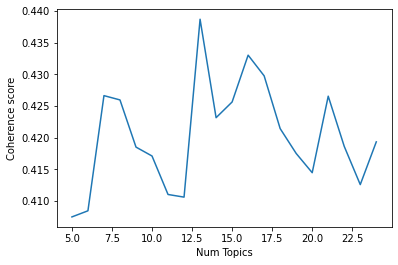

In [20]:
# Show graph
limit=25; start=5; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [21]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, 'Coherence: ', round(cv, 4))

Num Topics = 5 Coherence:  0.4075
Num Topics = 6 Coherence:  0.4084
Num Topics = 7 Coherence:  0.4266
Num Topics = 8 Coherence:  0.4259
Num Topics = 9 Coherence:  0.4185
Num Topics = 10 Coherence:  0.4171
Num Topics = 11 Coherence:  0.411
Num Topics = 12 Coherence:  0.4106
Num Topics = 13 Coherence:  0.4387
Num Topics = 14 Coherence:  0.4231
Num Topics = 15 Coherence:  0.4256
Num Topics = 16 Coherence:  0.433
Num Topics = 17 Coherence:  0.4297
Num Topics = 18 Coherence:  0.4214
Num Topics = 19 Coherence:  0.4175
Num Topics = 20 Coherence:  0.4145
Num Topics = 21 Coherence:  0.4265
Num Topics = 22 Coherence:  0.4186
Num Topics = 23 Coherence:  0.4126
Num Topics = 24 Coherence:  0.4193


In [22]:
# Coherence for 13-topic model
print(coherence_values[8])

# Topics for 13-topic model
malletModel_13 = model_list[8]
model_topics_13 = malletModel_13.show_topics(formatted=False)
pprint(sorted(malletModel_13.print_topics(num_words=10)))

# Convert results to lda model format for visualization.
MalletLDA13 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_13)

# Visualize the topics
pyLDAvis.enable_notebook()
vis13 = pyLDAvis.gensim.prepare(MalletLDA13, corpus, id2word, sort_topics=False)
vis13

0.43867625354986445
[(0,
  '0.032*"work" + 0.030*"place" + 0.030*"day" + 0.020*"dollar" + 0.017*"house" '
  '+ 0.017*"business" + 0.015*"city" + 0.014*"find" + 0.014*"cent" + '
  '0.014*"employment"'),
 (1,
  '0.030*"school" + 0.018*"give" + 0.017*"room" + 0.013*"speak" + '
  '0.012*"hospital" + 0.011*"visit" + 0.010*"door" + 0.010*"train" + '
  '0.009*"question" + 0.009*"patient"'),
 (2,
  '0.043*"bring" + 0.028*"water" + 0.014*"ship" + 0.014*"month" + '
  '0.012*"river" + 0.012*"captain" + 0.011*"vessel" + 0.011*"set" + '
  '0.010*"sea" + 0.010*"cost"'),
 (3,
  '0.024*"life" + 0.022*"work" + 0.021*"hand" + 0.015*"world" + 0.015*"give" + '
  '0.014*"mind" + 0.014*"body" + 0.013*"boy" + 0.012*"night" + 0.012*"air"'),
 (4,
  '0.045*"send" + 0.042*"year" + 0.041*"letter" + 0.037*"hear" + '
  '0.034*"friend" + 0.032*"winter" + 0.024*"write" + 0.023*"health" + '
  '0.021*"give" + 0.021*"summer"'),
 (5,
  '0.031*"book" + 0.031*"write" + 0.023*"work" + 0.022*"feel" + 0.016*"heart" '
  '+ 0.0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.074750  0.089799       1        1   8.115309
1      0.135854  0.116654       2        1  10.157996
2      0.180309  0.040289       3        1   7.296898
3      0.048830  0.158654       4        1   8.170797
4     -0.297100 -0.084298       5        1   5.993936
5     -0.123704 -0.109092       6        1   7.311636
6      0.163407 -0.189076       7        1   7.796971
7     -0.131916  0.056102       8        1   7.806647
8      0.067003  0.077564       9        1   8.582045
9     -0.257180  0.097502      10        1   7.201528
10     0.050206 -0.303162      11        1   8.386099
11     0.059585 -0.141248      12        1   7.180492
12     0.029956  0.190310      13        1   5.999646, topic_info=        Term        Freq       Total Category  logprob  loglift
597  country  640.000000  640.000000  Default  30.0000  30.0000
146     land  520.000000  520.000000  Default  29.0000  29.0000
276     time  833.000000  833.000000  Default  28.0000  28.0000
303     year  737.000000  737.000000  Default  27.0000  27.0000
149   letter  546.000000  546.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
96      fear   51.741540  200.272620  Topic13  -4.6993   1.4601
277     town   53.731600  274.217112  Topic13  -4.6615   1.1836
222     room   48.756451  279.243301  Topic13  -4.7587   1.0682
227   school   49.751481  360.445578  Topic13  -4.7385   0.8332
217   return   45.771363  330.451990  Topic13  -4.8219   0.8367

[1117 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2751     11  1.007221  abundance
2017      6  0.093487     accept
2017      8  0.888126     accept
305       8  0.957097   accident
305      13  0.043504   accident
...     ...       ...        ...
303       7  0.241355       year
303      11  0.288812       year
304      13  1.004995  yesterday
6393      5  1.041961       youe
2466      4  0.994464      youth

[1510 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

In [23]:
MalletLDA10.save('20240406_PhD_TopicLtrMAL10')
pyLDAvis.save_html(vis10, '20240406_PhD_TopicLtrMAL10.html')

In [25]:
MalletLDA13.save('20240406_PhD_TopicLtrMAL13')
pyLDAvis.save_html(vis13, '20240406_PhD_TopicLtrMAL13.html')